In [ ]:
## Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import (
    GroupShuffleSplit,
    GroupKFold,
    StratifiedGroupKFold,
)

In [ ]:
# Access to Google disk
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## import the dataset (all years). All variables were coded as float except for an outcome
col_names = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df_features_new.csv', nrows=0).columns
types_dict = {'outcome': str}
types_dict.update({col: float for col in col_names if col not in types_dict})
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df_features_new.csv', dtype=types_dict)
pd.set_option('display.max_rows', None)

In [ ]:
# to display all columns
pd.set_option('display.max_columns', None)

In [ ]:
#Initial size of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386749 entries, 0 to 386748
Columns: 622 entries, HOSP_NIS to outcome
dtypes: float64(621), object(1)
memory usage: 1.8+ GB


In [ ]:
#initial shape of the df
df.shape

(386749, 622)

In [ ]:
# replace all infinity with NaN
df = df.replace([np.inf, -np.inf], np.nan)


In [ ]:
# drop all missing values
df = df.dropna()
df = df.reset_index()
len(df)

363139

In [ ]:
# to change datatype of all variables to save memory
ignore = ['outcome', 'AGE', 'DISCWT', 'NIS_STRATUM', 'charlson_score',  'elixhauser_score', 'HOSP_NIS']
df = (df.set_index(ignore, append=True)
        .astype(np.int8)
        .reset_index(ignore)
       )
df.AGE.astype(np.float32)
df.DISCWT.astype(np.float32)
df.NIS_STRATUM.astype(np.float32)
df.charlson_score.astype(np.float32)
df.elixhauser_score.astype(np.float32)
df.HOSP_NIS.astype(np.float32)
df.dtypes

outcome                        object
AGE                           float64
DISCWT                        float64
NIS_STRATUM                   float64
charlson_score                float64
elixhauser_score              float64
HOSP_NIS                      float64
index                            int8
AMONTH                           int8
AWEEKEND                         int8
DQTR                             int8
ELECTIVE                         int8
FEMALE                           int8
RACE                             int8
TRAN_IN                          int8
ZIPINC_QRTL                      int8
BLD001                           int8
BLD002                           int8
BLD003                           int8
BLD005                           int8
BLD006                           int8
BLD007                           int8
BLD008                           int8
BLD010                           int8
CIR001                           int8
CIR002                           int8
CIR003      

In [ ]:
# memory after changing the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363139 entries, 0 to 363138
Columns: 623 entries, outcome to iron_anemia
dtypes: float64(6), int8(616), object(1)
memory usage: 235.5+ MB


In [ ]:
# remove columns index and YEAR
df = df.drop(columns = ['index'])

In [ ]:
# short description of the df
df.describe()

AGE         DISCWT    NIS_STRATUM  charlson_score  \
count  363139.000000  363139.000000  363139.000000   363139.000000   
mean       65.392357       5.000000    5250.502984        1.499911   
std        12.383276       0.000057    2357.498319        1.644227   
min        18.000000       4.997642    1213.000000        0.000000   
25%        57.000000       4.999992    3232.000000        0.000000   
50%        66.000000       5.000000    5232.000000        1.000000   
75%        74.000000       5.000010    7232.000000        2.000000   
max        90.000000       5.001122    9333.000000       14.000000   

       elixhauser_score       HOSP_NIS         AMONTH       AWEEKEND  \
count     363139.000000  363139.000000  363139.000000  363139.000000   
mean           6.959181   50439.995902       6.460336       0.238264   
std           12.410802   23545.287339       3.455733       0.426022   
min          -29.000000   10004.000000       1.000000       0.000000   
25%           -3.000000   30346.000000       3.000000       0.000000   
50%            4.000000   50299.000000       6.000000       0.000000   
75%           15.000000   70306.000000       9.000000       0.000000   
max           82.000000   90536.000000      12.000000       1.000000   

                DQTR       ELECTIVE         FEMALE           RACE  \
count  363139.000000  363139.000000  363139.000000  363139.000000   
mean        2.489854       0.094876       0.329984       1.541757   
std         1.120309       0.293043       0.470208       1.158797   
min         1.000000       0.000000       0.000000       1.000000   
25%         1.000000       0.000000       0.000000       1.000000   
50%         2.000000       0.000000       0.000000       1.000000   
75%         3.000000       0.000000       1.000000       1.000000   
max         4.000000       1.000000       1.000000       6.000000   

             TRAN_IN    ZIPINC_QRTL         BLD001         BLD002  \
count  363139.000000  363139.000000  363139.000000  363139.000000   
mean        0.210214       2.324867       0.028835       0.001239   
std         0.461887       1.093459       0.167342       0.035180   
min         0.000000       1.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000       0.000000   
50%         0.000000       2.000000       0.000000       0.000000   
75%         0.000000       3.000000       0.000000       0.000000   
max         2.000000       4.000000       1.000000       1.000000   

              BLD003         BLD005         BLD006         BLD007  \
count  363139.000000  363139.000000  363139.000000  363139.000000   
mean        0.114926       0.000548       0.047927       0.041249   
std         0.318933       0.023403       0.213611       0.198865   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              BLD008         BLD010         CIR001         CIR002  \
count  363139.000000  363139.000000  363139.000000  363139.000000   
mean        0.003241       0.005810       0.033497       0.000069   
std         0.056839       0.076005       0.179930       0.008297   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              CIR003         CIR004         CIR005        CIR006  \
count  363139.000000  363139.000000  363139.000000  363139.00000   
mean        0.094074       0.001330       0.205525       0.01164   
std         0.291932       0.036446       0.4

In [ ]:
#to detect the duplicated rows
df.duplicated().sum()

20

In [ ]:
#remove duplicates
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
#confirm that there is no duplicated rows
df.duplicated().sum()

0

In [ ]:
#the number of entries
len(df)

363119

In [ ]:
# check the value counts for the variables
#df.ZIPINC_QRTL.value_counts()
#df.AMONTH.value_counts() #ok
#df.DISCWT.value_counts() #ok
#df.AGE.value_counts() #ok
#df.AWEEKEND.value_counts() #ok
#df.DQTR.value_counts() #ok
#df.ELECTIVE.value_counts()
#df.FEMALE.value_counts() #ok
#df.NIS_STRATUM.value_counts() #ok
#df.RACE.value_counts() #1,2,3,4,5
#df.TRAN_IN.value_counts() #0,1,2
#df.AUTOIMMUNE.value_counts() #ok
#df.CANCER_LEUK.value_counts() #1377
#df.CANCER_LYMPH.value_counts() #1553
#df.NIS_STRATUM.value_counts()
#df.outcome.value_counts()
df.INJ.value_counts()


0    345814
1     17305
Name: INJ, dtype: int64

In [ ]:
# shape of the dataset
df.shape

(363119, 622)

In [ ]:
df.columns.get_loc('BLD001')

15

In [ ]:
df.columns.get_loc('iron_anemia')

621

In [ ]:
# re-order the columns
list_old = list(df.columns)

In [ ]:
# re0rder the columns
cols = list(df.columns[15:622])
cols_1 = list(df.columns[0:14])

In [ ]:
# remove categorical columns that are positove for less than 150 hospitalizatons
df_toremove = df[cols]
df_toremove = df_toremove.loc[:,~df_toremove.eq(1).sum().lt(150)]
list_refined = list(df_toremove.columns)

In [ ]:
# unify all columns
df = df[cols_1 + list_refined]

In [ ]:
# list all remained columns
list_new = list(df.columns)
list(set(list_old) - set(list_new))

['NVS014',
 'EXT023',
 'EXT022',
 'hyperaldosteronism',
 'MAL005',
 'NEO023',
 'INJ057',
 'NEO049',
 'INJ051',
 'MBD023',
 'NEO066',
 'INJ046',
 'INJ038',
 'INF001',
 'EXT006',
 'NEO053',
 'hepatic_fibrosis',
 'MUS018',
 'NEO044',
 'NVS002',
 'NEO067',
 'MUS019',
 'MBD022',
 'prev_heart_assist',
 'DIG009',
 'INJ062',
 'small_kidney',
 'MUS023',
 'GIS015',
 'FAC018',
 'INJ025',
 'MBD031',
 'GNR002',
 'INF005',
 'LYM008',
 'NEO027',
 'NEO060',
 'GEN024',
 'NEO052',
 'FAC002',
 'NEO026',
 'MBD034',
 'pers_hist_steroid',
 'FAC008',
 'EAR002',
 'toxic_liver',
 'heart_transpl',
 'INJ074',
 'MAL010',
 'MBD010',
 'FAC005',
 'pers_hist_resp',
 'NEO029',
 'GEN022',
 'MAL006',
 'NEO025',
 'gastric_metaplasia',
 'EXT021',
 'cardio_syphilis',
 'pers_hist_immunosupression',
 'NEO002',
 'MBD033',
 'INJ055',
 'NVS001',
 'NEO071',
 'MAL007',
 'HEP009',
 'GIS011',
 'INJ041',
 'INJ064',
 'INJ067',
 'NEO018',
 'MAL009',
 'CIR022',
 'NEO050',
 'folate_anemia',
 'jacood_arthritis',
 'MAL002',
 'NEO028',
 'N

In [ ]:
# check the shape of the df
df.shape

(363119, 393)

In [ ]:
# memory check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363119 entries, 0 to 363138
Columns: 393 entries, outcome to iron_anemia
dtypes: float64(6), int8(386), object(1)
memory usage: 155.8+ MB


In [ ]:
list(df.columns)

['outcome',
 'AGE',
 'DISCWT',
 'NIS_STRATUM',
 'charlson_score',
 'elixhauser_score',
 'HOSP_NIS',
 'AMONTH',
 'AWEEKEND',
 'DQTR',
 'ELECTIVE',
 'FEMALE',
 'RACE',
 'TRAN_IN',
 'BLD001',
 'BLD002',
 'BLD003',
 'BLD005',
 'BLD006',
 'BLD007',
 'BLD008',
 'BLD010',
 'CIR001',
 'CIR003',
 'CIR004',
 'CIR005',
 'CIR006',
 'CIR007',
 'CIR008',
 'CIR009',
 'CIR010',
 'CIR011',
 'CIR012',
 'CIR013',
 'CIR014',
 'CIR015',
 'CIR016',
 'CIR017',
 'CIR019',
 'CIR025',
 'CIR026',
 'CIR027',
 'CIR028',
 'CIR029',
 'CIR030',
 'CIR031',
 'CIR032',
 'CIR033',
 'CIR034',
 'CIR035',
 'CIR036',
 'CIR037',
 'DIG001',
 'DIG002',
 'DIG003',
 'DIG004',
 'DIG008',
 'DIG010',
 'DIG011',
 'DIG012',
 'DIG014',
 'DIG015',
 'DIG016',
 'DIG017',
 'DIG018',
 'DIG019',
 'DIG020',
 'DIG022',
 'DIG023',
 'DIG025',
 'EAR001',
 'EAR003',
 'EAR004',
 'EAR006',
 'END001',
 'END002',
 'END003',
 'END004',
 'END005',
 'END006',
 'END007',
 'END008',
 'END009',
 'END010',
 'END011',
 'END013',
 'END015',
 'END016',
 'EXT003

In [ ]:
# remove inappropriate codes
df = df.drop(columns = ['HOSP_NIS', 'EXT003', 'EXT007', 'EXT014', 'EXT016', 'EXT017', 'EXT018', 'EXT019', 'EXT020', 'EXT025', 'EXT026', 'EXT027', 'EXT028', 'EXT029', 'EXT030', 'FAC010', 'FAC012', 'FAC013', 'FAC017', 'FAC025'])

In [ ]:
# short description of the df
df.describe()

AGE         DISCWT    NIS_STRATUM  charlson_score  \
count  363119.000000  363119.000000  363119.000000   363119.000000   
mean       65.392458       5.000000    5250.617533        1.499913   
std        12.383269       0.000057    2357.480014        1.644233   
min        18.000000       4.997642    1213.000000        0.000000   
25%        57.000000       4.999992    3232.000000        0.000000   
50%        66.000000       5.000000    5232.000000        1.000000   
75%        74.000000       5.000010    7232.000000        2.000000   
max        90.000000       5.001122    9333.000000       14.000000   

       elixhauser_score         AMONTH       AWEEKEND           DQTR  \
count     363119.000000  363119.000000  363119.000000  363119.000000   
mean           6.959192       6.460348       0.238266       2.489867   
std           12.410954       3.455740       0.426023       1.120314   
min          -29.000000       1.000000       0.000000       1.000000   
25%           -3.000000       3.000000       0.000000       1.000000   
50%            4.000000       6.000000       0.000000       2.000000   
75%           15.000000       9.000000       0.000000       3.000000   
max           82.000000      12.000000       1.000000       4.000000   

            ELECTIVE         FEMALE           RACE        TRAN_IN  \
count  363119.000000  363119.000000  363119.000000  363119.000000   
mean        0.094872       0.329980       1.541685       0.210223   
std         0.293039       0.470206       1.158678       0.461896   
min         0.000000       0.000000       1.000000       0.000000   
25%         0.000000       0.000000       1.000000       0.000000   
50%         0.000000       0.000000       1.000000       0.000000   
75%         0.000000       1.000000       1.000000       0.000000   
max         1.000000       1.000000       6.000000       2.000000   

              BLD001         BLD002         BLD003         BLD005  \
count  363119.000000  363119.000000  363119.000000  363119.000000   
mean        0.028834       0.001239       0.114929       0.000548   
std         0.167339       0.035181       0.318937       0.023404   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              BLD006         BLD007         BLD008         BLD010  \
count  363119.000000  363119.000000  363119.000000  363119.000000   
mean        0.047929       0.041251       0.003241       0.005811   
std         0.213617       0.198870       0.056841       0.076007   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              CIR001         CIR003         CIR004         CIR005  \
count  363119.000000  363119.000000  363119.000000  363119.000000   
mean        0.033499       0.094071       0.001330       0.205530   
std         0.179935       0.291928       0.036447       0.404089   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              CIR006         CIR007         CIR008         CIR009  \
count  363119.000000  363119.000000  363119.000000  363119.000000   
mean        0.011641       0.488176       0.350491       0.723567   
std         0.107263       0.499861       

In [ ]:
# save dataframe
df.to_pickle("/content/drive/MyDrive/Colab Notebooks/my_data_updated_new.pkl")

Skewness: -0.1548896393456412
Kurtosis: -0.42894128478720317


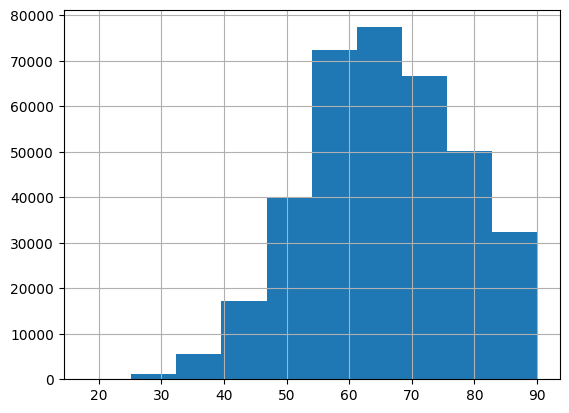

In [ ]:
# historamm for AGE
df.AGE.hist()
print(f"Skewness: {df['AGE'].skew()}")
print(f"Kurtosis: {df['AGE'].kurt()}")

CODES FOR TABLE 1

In [ ]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import (
    GroupShuffleSplit
)

In [ ]:
#Access to Google Disk
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
# import the previous dataframe
df = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/my_data_updated_new.pkl')


In [ ]:
# define an outcome and features
y = df.outcome
X = df.drop('outcome', axis=1)
X.head()


AGE   DISCWT  NIS_STRATUM  charlson_score  AMONTH  AWEEKEND  DQTR  \
0  69.0  5.00001       1233.0             3.0      10         0     4   
1  45.0  5.00000       1232.0             0.0       9         0     4   
2  69.0  5.00001       1233.0             4.0      11         0     4   
3  54.0  5.00001       1233.0             2.0       1         0     1   
4  43.0  5.00001       1233.0             0.0       5         1     2   

   ELECTIVE  FEMALE  RACE  ...  takotsubo  hydronephrosis  ischemia_kidney  \
0         0       0     1  ...          0               0                0   
1         0       0     1  ...          0               0                0   
2         0       1     1  ...          0               0                0   
3         0       0     1  ...          0               0                0   
4         0       0     6  ...          0               0                0   

   psorisis  ankylosing_spond  chronic_resp_failure  barret_esophagus  \
0         0                 0                     0                 0   
1         0                 0                     0                 0   
2         0                 0                     0                 0   
3         0                 0                     0                 0   
4         0                 0                     0                 0   

   acute_intestine_ischemia  B12_anemia  iron_anemia  
0                         0           0            0  
1                         0           0            0  
2                         0           0            1  
3                         0           0            0  
4                         0           0            0  

[5 rows x 366 columns]

In [ ]:
# Train-test split according to NIS strata
gs = GroupShuffleSplit(n_splits=2, test_size=.1, random_state=5)
train_ix, test_ix = next(gs.split(X, y, groups=X.NIS_STRATUM))
X_train = X.iloc[train_ix]
y_train = y.iloc[train_ix]
X_test = X.iloc[test_ix]
y_test = y.iloc[test_ix]


In [ ]:
# codes for Table Baselne characteristics. Create a column for Train/Test identifier
X_train = X_train.assign(dataset = "train")

In [ ]:
X_train.head()

AGE   DISCWT  NIS_STRATUM  charlson_score  AMONTH  AWEEKEND  DQTR  \
0  69.0  5.00001       1233.0             3.0      10         0     4   
1  45.0  5.00000       1232.0             0.0       9         0     4   
2  69.0  5.00001       1233.0             4.0      11         0     4   
3  54.0  5.00001       1233.0             2.0       1         0     1   
4  43.0  5.00001       1233.0             0.0       5         1     2   

   ELECTIVE  FEMALE  RACE  ...  hydronephrosis  ischemia_kidney  psorisis  \
0         0       0     1  ...               0                0         0   
1         0       0     1  ...               0                0         0   
2         0       1     1  ...               0                0         0   
3         0       0     1  ...               0                0         0   
4         0       0     6  ...               0                0         0   

   ankylosing_spond  chronic_resp_failure  barret_esophagus  \
0                 0                     0                 0   
1                 0                     0                 0   
2                 0                     0                 0   
3                 0                     0                 0   
4                 0                     0                 0   

   acute_intestine_ischemia  B12_anemia  iron_anemia  dataset  
0                         0           0            0    train  
1                         0           0            0    train  
2                         0           0            1    train  
3                         0           0            0    train  
4                         0           0            0    train  

[5 rows x 367 columns]

In [ ]:
X_test.head()

AGE    DISCWT  NIS_STRATUM  charlson_score  AMONTH  AWEEKEND  DQTR  \
65   60.0  5.000143       1223.0             2.0       6         0     2   
88   76.0  5.000143       1223.0             0.0       9         0     3   
89   80.0  5.000143       1223.0             0.0      10         0     4   
106  63.0  5.000143       1223.0             2.0       9         0     4   
107  84.0  5.000143       1223.0             0.0      11         0     4   

     ELECTIVE  FEMALE  RACE  ...  takotsubo  hydronephrosis  ischemia_kidney  \
65          0       0     1  ...          0               0                0   
88          0       0     6  ...          0               0                0   
89          0       1     1  ...          0               0                0   
106         0       0     3  ...          0               0                0   
107         0       1     1  ...          0               0                0   

     psorisis  ankylosing_spond  chronic_resp_failure  barret_esophagus  \
65          0                 0                     0                 0   
88          0                 0                     0                 0   
89          0                 0                     0                 0   
106         0                 0                     0                 0   
107         0                 0                     0                 0   

     acute_intestine_ischemia  B12_anemia  iron_anemia  
65                          0           0            0  
88                          0           0            0  
89                          0           0            0  
106                         0           0            0  
107                         0           0            0  

[5 rows x 366 columns]

In [ ]:
# Create a column for Train/Test identifier
X_test = X_test.assign(dataset = "test")

In [ ]:
print(X_train.NIS_STRATUM.unique())

[1233. 1232. 1231. 1331. 1322. 1332. 1222. 1221. 2232. 2231. 2223. 2132.
 2133. 2333. 2213. 2221. 2322. 2332. 2323. 2212. 3223. 3233. 3231. 3232.
 3133. 3213. 3222. 3132. 3322. 3331. 3323. 3221. 3113. 3122. 3131. 3321.
 3121. 4223. 4331. 4322. 4232. 4133. 4213. 4333. 4313. 4323. 4312. 4222.
 4131. 4212. 4221. 5232. 5223. 5222. 5332. 5133. 5213. 5323. 5231. 5122.
 5221. 5331. 5322. 5123. 5313. 5321. 5131. 5113. 5212. 5312. 6233. 6133.
 6213. 6232. 6113. 6223. 6123. 6322. 6331. 6231. 6332. 6122. 6321. 6313.
 6222. 6221. 6131. 6212. 7331. 7213. 7322. 7233. 7122. 7332. 7232. 7222.
 7321. 7231. 7132. 7223. 7212. 7323. 7123. 7121. 7113. 7131. 7221. 7312.
 7112. 8233. 8322. 8232. 8331. 8231. 8222. 8223. 8323. 8213. 8113. 8131.
 8133. 8332. 8313. 8321. 8221. 8312. 9223. 9233. 9232. 9222. 9133. 9132.
 9323. 9221. 9231. 9333. 9322. 9113. 9123. 9213. 9331. 9131. 9332. 9122.
 9321. 9121. 2131. 3212. 4122. 4112. 5121. 6323. 7311. 8132. 8212. 3123.
 4123. 5211. 1213. 1321. 2321. 4332. 8112.]


In [ ]:
print(X_test.NIS_STRATUM.unique())

[1223. 2233. 2331. 2222. 3332. 3313. 4233. 4231. 4121. 4321. 4113. 5233.
 5132. 7333. 7313. 7133. 8333. 5333. 6211.]


In [ ]:
print(y_test.unique())
print(y_test.value_counts())


['bleeding_only' 'No' 'death_only' 'bleeding_stroke' 'death_bleeding'
 'stroke_only' 'three_outcomes' 'death_stroke']
No                 62747
death_only          1446
bleeding_only       1128
stroke_only          649
death_bleeding       241
death_stroke          86
bleeding_stroke       65
three_outcomes        36
Name: outcome, dtype: int64


In [ ]:
print(y_train.value_counts())
print(X_train.DISCWT.value_counts())


No                 280736
death_only           7118
bleeding_only        4452
stroke_only          2829
death_bleeding        915
death_stroke          318
bleeding_stroke       235
three_outcomes        118
Name: outcome, dtype: int64
5.000000    64420
4.999994    10005
5.000006     5169
5.000008     4338
4.999996     4279
            ...  
4.999653        1
4.999747        1
5.000887        1
5.000819        1
5.000166        1
Name: DISCWT, Length: 434, dtype: int64


In [ ]:
# join the train and test dataset for baseline characteristics
df_train = pd.concat([X_train, y_train], axis = 1)

In [ ]:
# join the train and test dataset for baseline characteristics
df_test = pd.concat([X_test, y_test], axis = 1)

In [ ]:
#the shape of the dataframe
df_test.shape

(66398, 368)

In [ ]:
# the head of the dataframe
df_test.head()

AGE    DISCWT  NIS_STRATUM  charlson_score  AMONTH  AWEEKEND  DQTR  \
65   60.0  5.000143       1223.0             2.0       6         0     2   
88   76.0  5.000143       1223.0             0.0       9         0     3   
89   80.0  5.000143       1223.0             0.0      10         0     4   
106  63.0  5.000143       1223.0             2.0       9         0     4   
107  84.0  5.000143       1223.0             0.0      11         0     4   

     ELECTIVE  FEMALE  RACE  ...  ischemia_kidney  psorisis  ankylosing_spond  \
65          0       0     1  ...                0         0                 0   
88          0       0     6  ...                0         0                 0   
89          0       1     1  ...                0         0                 0   
106         0       0     3  ...                0         0                 0   
107         0       1     1  ...                0         0                 0   

     chronic_resp_failure  barret_esophagus  acute_intestine_ischemia  \
65                      0                 0                         0   
88                      0                 0                         0   
89                      0                 0                         0   
106                     0                 0                         0   
107                     0                 0                         0   

     B12_anemia  iron_anemia  dataset        outcome  
65            0            0     test  bleeding_only  
88            0            0     test             No  
89            0            0     test             No  
106           0            0     test             No  
107           0            0     test             No  

[5 rows x 368 columns]

In [ ]:
# join the train and test dataset for baseline characteristics
df_table1 = pd.concat([df_train, df_test], axis = 0)

In [ ]:
df_table1.head()

AGE   DISCWT  NIS_STRATUM  charlson_score  AMONTH  AWEEKEND  DQTR  \
0  69.0  5.00001       1233.0             3.0      10         0     4   
1  45.0  5.00000       1232.0             0.0       9         0     4   
2  69.0  5.00001       1233.0             4.0      11         0     4   
3  54.0  5.00001       1233.0             2.0       1         0     1   
4  43.0  5.00001       1233.0             0.0       5         1     2   

   ELECTIVE  FEMALE  RACE  ...  ischemia_kidney  psorisis  ankylosing_spond  \
0         0       0     1  ...                0         0                 0   
1         0       0     1  ...                0         0                 0   
2         0       1     1  ...                0         0                 0   
3         0       0     1  ...                0         0                 0   
4         0       0     6  ...                0         0                 0   

   chronic_resp_failure  barret_esophagus  acute_intestine_ischemia  \
0                     0                 0                         0   
1                     0                 0                         0   
2                     0                 0                         0   
3                     0                 0                         0   
4                     0                 0                         0   

   B12_anemia  iron_anemia  dataset  outcome  
0           0            0    train       No  
1           0            0    train       No  
2           0            1    train       No  
3           0            0    train       No  
4           0            0    train       No  

[5 rows x 368 columns]

In [ ]:
df_table1.shape

(363119, 368)

In [ ]:
# save as csv
df_table1.to_csv('/content/drive/MyDrive/Colab Notebooks/my_data_table1_140223.csv')

CODES FOR TRAIN-TEST SPLIT

In [ ]:
# import all necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import (
    GroupShuffleSplit,
    GroupKFold,
    StratifiedGroupKFold,
)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [ ]:
#Access to Google Disk
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# import the previous dataframe
df = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/my_data_updated_new.pkl')

In [ ]:
# exclude unnecessary columns
df = df.drop(columns=['END011', 'INF002','FAC009', 'FAC014', 'NVS020', 'SYM003', 'ESA001'])

In [ ]:
df.head()

outcome   AGE   DISCWT  NIS_STRATUM  charlson_score  elixhauser_score  \
0      No  69.0  5.00001       1233.0             3.0               9.0   
1      No  45.0  5.00000       1232.0             0.0               1.0   
2      No  69.0  5.00001       1233.0             4.0              12.0   
3      No  54.0  5.00001       1233.0             2.0               9.0   
4      No  43.0  5.00001       1233.0             0.0               9.0   

   AMONTH  AWEEKEND  DQTR  ELECTIVE  FEMALE  RACE  TRAN_IN  BLD001  BLD002  \
0      10         0     4         0       0     1        0       0       0   
1       9         0     4         0       0     1        0       0       0   
2      11         0     4         0       1     1        0       1       0   
3       1         0     1         0       0     1        1       0       0   
4       5         1     2         0       0     6        2       0       0   

   BLD003  BLD005  BLD006  BLD007  BLD008  BLD010  CIR001  CIR003  CIR004  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       1       0   
3       0       0       1       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   CIR005  CIR006  CIR007  CIR008  CIR009  CIR010  CIR011  CIR012  CIR013  \
0       1       0       0       1       1       0       1       0       0   
1       0       0       1       0       1       0       1       0       0   
2       1       0       0       1       1       0       1       0       0   
3       0       0       1       0       1       0       1       0       0   
4       0       0       0       0       1       0       0       0       0   

   CIR014  CIR015  CIR016  CIR017  CIR019  CIR025  CIR026  CIR027  CIR028  \
0       0       0       0       0       1       0       0       0       0   
1       0       0       0       1       0       0       0       0       0   
2       0       0       1       0       1       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   CIR029  CIR030  CIR031  CIR032  CIR033  CIR034  CIR035  CIR036  CIR037  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   DIG001  DIG002  DIG003  DIG004  DIG008  DIG010  DIG011  DIG012  DIG014  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       1       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       1       0   

   DIG015  DIG016  DIG017  DIG018  DIG019  DIG020  DIG022  DIG023  DIG025  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   EAR001  EAR003  EAR004  EAR006  END001  END002  END003  END004  END005  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       1       0       1       0       1

In [ ]:
# the column name for the outcome
outcome = list([df.columns[0]])

In [ ]:
# define y and X
y = df.outcome
X = df.drop('outcome', axis=1)
# Train-test split according to NIS strata
gs = GroupShuffleSplit(n_splits=2, test_size=.1, random_state=5)
train_ix, test_ix = next(gs.split(X, y, groups=X.NIS_STRATUM))
X_train = X.iloc[train_ix]
y_train = y.iloc[train_ix]
X_test = X.iloc[test_ix]
y_test = y.iloc[test_ix]

In [ ]:
# binarize the Outcome
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
print (y_train)

[0 0 0 ... 0 0 0]


In [ ]:
#to define a validation cohort for calibration
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=5)

In [ ]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(237376, 365)
(59345, 365)
(66398, 365)


In [ ]:
# define the dataset for feature selection
X_train_pruned = X_train.drop(columns = ['DISCWT', 'NIS_STRATUM'])

In [ ]:
pip install FRUFS

In [ ]:
# to define all categorical features
categorical_features = X_train_pruned.columns.drop(['AGE', 'charlson_score', 'elixhauser_score'])

In [ ]:
from FRUFS import FRUFS

In [ ]:
import xgboost as xgb

In [ ]:
# to encode categorical variables
X_train_pruned['AMONTH'] = label_encoder.fit_transform(X_train_pruned['AMONTH'])

In [ ]:
# to encode categorical variables
X_train_pruned['DQTR'] = label_encoder.fit_transform(X_train_pruned['DQTR'])

In [ ]:
# to encode categorical variables
X_train_pruned['RACE'] = label_encoder.fit_transform(X_train_pruned['RACE'])

In [ ]:
# Initialize the FRUFS object
from FRUFS import FRUFS
model_frufs = FRUFS(model_r=xgb.XGBRegressor(random_state=27, tree_method= 'gpu_hist'), model_c=xgb.XGBClassifier(random_state=27, tree_method= 'gpu_hist', class_weight="balanced"), categorical_features=categorical_features, k=100, n_jobs=-1, verbose=3, random_state=27)

In [ ]:
# The fit_transform function is a wrapper for the fit and transform functions, individually.
# The fit function ranks the features and the transform function prunes the dataset to selected set of features
X_train_pruned = model_frufs.fit_transform(X_train_pruned)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 363 out of 363 | elapsed: 44.1min finished


In [ ]:
import joblib
from joblib import dump, load
dump(model_frufs, '/content/drive/MyDrive/Colab Notebooks/model_frufs_060723.pkl' )

['/content/drive/MyDrive/Colab Notebooks/model_frufs_060723.pkl']

In [ ]:
import joblib
from joblib import dump, load
model_frufs = joblib.load('/content/drive/MyDrive/Colab Notebooks/model_frufs_190523.pkl')

In [ ]:
# to visualize the results of feature selection
from matplotlib import pyplot as plt
plt.figure(figsize=(50, 50), dpi=300)
model_frufs.feature_importance()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# to sort column names
X_train_pruned = X_train_pruned.sort_index(axis=1)

In [ ]:
columns = list(X_train_pruned.columns)

In [ ]:
columns

['AGE',
 'AMONTH',
 'AUTOIMMUNE',
 'BLD001',
 'BLD003',
 'BLD006',
 'CANCER_LEUK',
 'CANCER_LYMPH',
 'CANCER_METS',
 'CANCER_SOLID',
 'CAR003',
 'CIR003',
 'CIR005',
 'CIR007',
 'CIR008',
 'CIR009',
 'CIR011',
 'CIR014',
 'CIR015',
 'CIR016',
 'CIR017',
 'CIR019',
 'CIR026',
 'DIG004',
 'DIG019',
 'DIG025',
 'DQTR',
 'DRUG_ABUSE',
 'ELECTIVE',
 'END001',
 'END002',
 'END003',
 'END005',
 'END008',
 'END009',
 'END015',
 'END016',
 'FAC021',
 'FEMALE',
 'GEN002',
 'GEN003',
 'GEN004',
 'GEN006',
 'GEN012',
 'INF003',
 'INF007',
 'INF008',
 'INJ',
 'INJ030',
 'INJ031',
 'LIVER_MLD',
 'MBD002',
 'MBD003',
 'MBD005',
 'MBD017',
 'MBD024',
 'MUS003',
 'MUS006',
 'MUS011',
 'NEO',
 'NEO070',
 'NSTEMI',
 'NVS011',
 'NVS015',
 'NVS016',
 'NVS019',
 'PSYCHOSES',
 'RACE',
 'RENLFL_MOD',
 'RENLFL_SEV',
 'RSP002',
 'RSP008',
 'RSP010',
 'RSP011',
 'SKN002',
 'STEMI',
 'SYM012',
 'SYM016',
 'THYROID_HYPO',
 'WGHTLOSS',
 'allergy',
 'atrialfibrillation',
 'charlson_score',
 'elixhauser_score',
 'fam

In [ ]:
# to define some additional columns that should be present in the final dataset. END010 (dyslipidemia) has been added since this is a traditional cardiovascular risk factor
columns_add = ['DISCWT', 'NIS_STRATUM', 'END010']

In [ ]:
# import the previous dataframe
df = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/my_data_updated_new.pkl')

In [ ]:
# exclude unnecessary columns
df = df.drop(columns=['END011', 'INF002','FAC009', 'FAC014', 'NVS020', 'SYM003', 'ESA001'])

In [ ]:
# to define the final dataset after feature selection
df = df[columns + columns_add + outcome]

In [ ]:
df.head()

AGE  AMONTH  AUTOIMMUNE  BLD001  BLD003  BLD006  CANCER_LEUK  \
0  69.0      10           1       0       0       0            0   
1  45.0       9           0       0       0       0            0   
2  69.0      11           0       1       0       0            0   
3  54.0       1           0       0       0       1            1   
4  43.0       5           0       0       0       0            0   

   CANCER_LYMPH  CANCER_METS  CANCER_SOLID  CAR003  CIR003  CIR005  CIR007  \
0             0            0             0       0       0       1       0   
1             0            0             0       0       0       0       1   
2             0            0             0       0       1       1       0   
3             0            0             0       0       0       0       1   
4             0            0             0       0       0       0       0   

   CIR008  CIR009  CIR011  CIR014  CIR015  CIR016  CIR017  CIR019  CIR026  \
0       1       1       1       0       0       0       0       1       0   
1       0       1       1       0       0       0       1       0       0   
2       1       1       1       0       0       1       0       1       0   
3       0       1       1       0       0       0       0       0       0   
4       0       1       0       0       0       0       0       0       0   

   DIG004  DIG019  DIG025  DQTR  DRUG_ABUSE  ELECTIVE  END001  END002  END003  \
0       0       0       0     4           0         0       0       0       0   
1       1       0       0     4           0         0       0       0       0   
2       0       0       0     4           0         0       1       0       1   
3       0       0       0     1           0         0       0       0       1   
4       0       0       0     2           0         0       0       0       1   

   END005  END008  END009  END015  END016  FAC021  FEMALE  GEN002  GEN003  \
0       0       0       0       0       0       0       0       1       0   
1       0       0       1       0       0       0       0       1       0   
2       1       0       0       0       0       1       1       1       1   
3       1       0       0       0       0       0       0       1       0   
4       1       0       1       0       0       0       0       1       0   

   GEN004  GEN006  GEN012  INF003  INF007  INF008  INJ  INJ030  INJ031  \
0       0       0       0       0       0       0    0       0       0   
1       0       0       0       0       0       0    0       0       0   
2       1       0       0       1       1       1    0       0       0   
3       0       0       0       0       0       0    0       0       0   
4       0       0       0       1       0       0    0       0       0   

   LIVER_MLD  MBD002  MBD003  MBD005  MBD017  MBD024  MUS003  MUS006  MUS011  \
0          0       0       0       0       0       0       1       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       1       0       0       0   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   

   NEO  NEO070  NSTEMI  NVS011  NVS015  NVS016  NVS019  PSYCHOSES  RACE  \
0    0       0       0       0       0       0       0          0     1   
1    0       0       0       0       0       0       0          0     1   
2    1       0       1       0       0       0       0          0     1   
3    1       0       0       0       0       0       0          0     1   
4    0       0       1       0       0       0       0          0     6   

   RENLFL_MOD  RENLFL_SEV  RSP002  RSP008  RSP010  RSP011  SKN002  STEMI  \
0           0           0       0       0       0       0       0      1   
1           0           0       0       0       0       0       0      1   
2           0           1       0       0       0       0       0      0   
3           0           0       

In [ ]:
# to list all column names
list(df.columns)

['AGE',
 'AMONTH',
 'AUTOIMMUNE',
 'BLD001',
 'BLD003',
 'BLD006',
 'CANCER_LEUK',
 'CANCER_LYMPH',
 'CANCER_METS',
 'CANCER_SOLID',
 'CAR003',
 'CIR003',
 'CIR005',
 'CIR007',
 'CIR008',
 'CIR009',
 'CIR011',
 'CIR014',
 'CIR015',
 'CIR016',
 'CIR017',
 'CIR019',
 'CIR026',
 'DIG004',
 'DIG019',
 'DIG025',
 'DQTR',
 'DRUG_ABUSE',
 'ELECTIVE',
 'END001',
 'END002',
 'END003',
 'END005',
 'END008',
 'END009',
 'END015',
 'END016',
 'FAC021',
 'FEMALE',
 'GEN002',
 'GEN003',
 'GEN004',
 'GEN006',
 'GEN012',
 'INF003',
 'INF007',
 'INF008',
 'INJ',
 'INJ030',
 'INJ031',
 'LIVER_MLD',
 'MBD002',
 'MBD003',
 'MBD005',
 'MBD017',
 'MBD024',
 'MUS003',
 'MUS006',
 'MUS011',
 'NEO',
 'NEO070',
 'NSTEMI',
 'NVS011',
 'NVS015',
 'NVS016',
 'NVS019',
 'PSYCHOSES',
 'RACE',
 'RENLFL_MOD',
 'RENLFL_SEV',
 'RSP002',
 'RSP008',
 'RSP010',
 'RSP011',
 'SKN002',
 'STEMI',
 'SYM012',
 'SYM016',
 'THYROID_HYPO',
 'WGHTLOSS',
 'allergy',
 'atrialfibrillation',
 'charlson_score',
 'elixhauser_score',
 'fam

In [ ]:
df.shape

(363119, 104)

In [ ]:
# save dataframe
df.to_pickle("/content/drive/MyDrive/Colab Notebooks/my_data_selected_060723.pkl")

In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/my_data_selected_190523.pkl')

In [ ]:
df.head()

AGE  AMONTH  AUTOIMMUNE  BLD001  BLD003  BLD006  CANCER_LEUK  \
0  69.0      10           1       0       0       0            0   
1  45.0       9           0       0       0       0            0   
2  69.0      11           0       1       0       0            0   
3  54.0       1           0       0       0       1            1   
4  43.0       5           0       0       0       0            0   

   CANCER_LYMPH  CANCER_METS  CANCER_SOLID  CAR003  CIR003  CIR005  CIR007  \
0             0            0             0       0       0       1       0   
1             0            0             0       0       0       0       1   
2             0            0             0       0       1       1       0   
3             0            0             0       0       0       0       1   
4             0            0             0       0       0       0       0   

   CIR008  CIR009  CIR011  CIR014  CIR015  CIR016  CIR017  CIR019  CIR026  \
0       1       1       1       0       0       0       0       1       0   
1       0       1       1       0       0       0       1       0       0   
2       1       1       1       0       0       1       0       1       0   
3       0       1       1       0       0       0       0       0       0   
4       0       1       0       0       0       0       0       0       0   

   DIG004  DIG019  DIG025  DQTR  DRUG_ABUSE  ELECTIVE  END001  END002  END003  \
0       0       0       0     4           0         0       0       0       0   
1       1       0       0     4           0         0       0       0       0   
2       0       0       0     4           0         0       1       0       1   
3       0       0       0     1           0         0       0       0       1   
4       0       0       0     2           0         0       0       0       1   

   END005  END008  END009  END015  END016  FAC021  FEMALE  GEN002  GEN003  \
0       0       0       0       0       0       0       0       1       0   
1       0       0       1       0       0       0       0       1       0   
2       1       0       0       0       0       1       1       1       1   
3       1       0       0       0       0       0       0       1       0   
4       1       0       1       0       0       0       0       1       0   

   GEN004  GEN006  GEN012  INF003  INF007  INF008  INJ  INJ030  INJ031  \
0       0       0       0       0       0       0    0       0       0   
1       0       0       0       0       0       0    0       0       0   
2       1       0       0       1       1       1    0       0       0   
3       0       0       0       0       0       0    0       0       0   
4       0       0       0       1       0       0    0       0       0   

   LIVER_MLD  MBD002  MBD003  MBD005  MBD017  MBD024  MUS003  MUS006  MUS011  \
0          0       0       0       0       0       0       1       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       1       0       0       0   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   

   NEO  NEO070  NSTEMI  NVS011  NVS015  NVS016  NVS019  PSYCHOSES  RACE  \
0    0       0       0       0       0       0       0          0     1   
1    0       0       0       0       0       0       0          0     1   
2    1       0       1       0       0       0       0          0     1   
3    1       0       0       0       0       0       0          0     1   
4    0       0       1       0       0       0       0          0     6   

   RENLFL_MOD  RENLFL_SEV  RSP002  RSP008  RSP010  RSP011  SKN002  STEMI  \
0           0           0       0       0       0       0       0      1   
1           0           0       0       0       0       0       0      1   
2           0           1       0       0       0       0       0      0   
3           0           0       

In [ ]:
# define y and X
y = df.outcome
X = df.drop('outcome', axis=1)
# Train-test split according to NIS strata
gs = GroupShuffleSplit(n_splits=2, test_size=.1, random_state=5)
train_ix, test_ix = next(gs.split(X, y, groups=X.NIS_STRATUM))
X_train = X.iloc[train_ix]
y_train = y.iloc[train_ix]
X_test = X.iloc[test_ix]
y_test = y.iloc[test_ix]

In [ ]:
#to define a validation cohort for calibration
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=5)

In [ ]:
y_train.unique()

array(['No', 'death_only', 'bleeding_only', 'three_outcomes',
       'death_stroke', 'stroke_only', 'bleeding_stroke', 'death_bleeding'],
      dtype=object)

In [ ]:
y_test.unique()

array(['bleeding_only', 'No', 'death_only', 'bleeding_stroke',
       'death_bleeding', 'stroke_only', 'three_outcomes', 'death_stroke'],
      dtype=object)

In [ ]:
y_validation.unique()

array(['No', 'bleeding_only', 'death_only', 'stroke_only',
       'death_bleeding', 'death_stroke', 'three_outcomes',
       'bleeding_stroke'], dtype=object)

In [ ]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(237376, 103)
(59345, 103)
(66398, 103)


In [ ]:
# save dataframe
X_train.to_pickle("/content/drive/MyDrive/Colab Notebooks/X_train_refined_060723.pkl")
y_train.to_pickle("/content/drive/MyDrive/Colab Notebooks/y_train_refined_060723.pkl")

In [ ]:
# save dataframe
X_validation.to_pickle("/content/drive/MyDrive/Colab Notebooks/X_validation_refined_060723.pkl")
y_validation.to_pickle("/content/drive/MyDrive/Colab Notebooks/y_validation_refined_060723.pkl")

In [ ]:
# save dataframe
X_test.to_pickle("/content/drive/MyDrive/Colab Notebooks/X_test_refined_060723.pkl")
y_test.to_pickle("/content/drive/MyDrive/Colab Notebooks/y_test_refined_060723.pkl")

SUPPORT VECTOR MACHINE

In [ ]:
# import all necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import (
    GroupShuffleSplit,
    GroupKFold,
    StratifiedGroupKFold,
)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#Access to Google Disk
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load the data
X_train = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/X_train_refined_060723.pkl')
y_train = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/y_train_refined_060723.pkl")
X_validation = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/X_validation_refined_060723.pkl')
y_validation = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/y_validation_refined_060723.pkl")
X_test = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/X_test_refined_060723.pkl')
y_test = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/y_test_refined_060723.pkl')

In [ ]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)
print(y_train.unique())
print(y_validation.unique())
print(y_test.unique())

(237376, 103)
(59345, 103)
(66398, 103)
['No' 'death_only' 'bleeding_only' 'three_outcomes' 'death_stroke'
 'stroke_only' 'bleeding_stroke' 'death_bleeding']
['No' 'bleeding_only' 'death_only' 'stroke_only' 'death_bleeding'
 'death_stroke' 'three_outcomes' 'bleeding_stroke']
['bleeding_only' 'No' 'death_only' 'bleeding_stroke' 'death_bleeding'
 'stroke_only' 'three_outcomes' 'death_stroke']


In [ ]:
# binarize the Outcome
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
print (y_train)

[0 0 0 ... 0 0 0]


In [ ]:
# Grid search to find the best alpha parameter for SVM classifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop = 'if_binary')
categorical_features = X_train.columns.drop('AGE', 'DISCWT')
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_features),
    ('standard_scaler', StandardScaler(), ['AGE'])])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', CalibratedClassifierCV(base_estimator=SGDClassifier(random_state=1, loss = 'hinge', max_iter=1000, class_weight = 'balanced', n_jobs=-1, penalty='l2'), cv=5))])

param_grid = {'classiffier__base_estimator__alpha' : [0.0001, 0.001, 0.01, 0.1, 1]}
sgkf = StratifiedGroupKFold(n_splits=5)
clf_SGD_hinge = GridSearchCV(pipe, param_grid=param_grid, cv=sgkf, scoring='roc_auc_ovr')
clf_SGD_hinge.fit(X_train, y_train, groups = X_train.NIS_STRATUM, **{'classiffier__sample_weight': X_train.DISCWT})


In [ ]:
# cross-validation results
clf_SGD_hinge.cv_results_

In [ ]:
# the best parameter found during the grid search
clf_SGD_hinge.best_params_

{'classiffier__base_estimator__alpha': 0.01}

In [ ]:
# retraining with the best alpha parameter
#alpha = 0.01
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop = 'if_binary')
categorical_features = X_train.columns.drop(['AGE', 'DISCWT', 'charlson_score', 'elixhauser_score'])
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_features),
    ('standard_scaler', StandardScaler(), ['AGE', 'charlson_score', 'elixhauser_score'])])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', CalibratedClassifierCV(estimator=SGDClassifier(random_state=1, loss = 'hinge', max_iter=1000, class_weight = 'balanced', n_jobs=-1, penalty='l2'), cv=5, method='isotonic'))])

param_grid = {'classiffier__estimator__alpha' : [0.01]}
sgkf = StratifiedGroupKFold(n_splits=5)
clf_SGD_hinge = GridSearchCV(pipe, param_grid=param_grid, cv=sgkf, scoring='roc_auc_ovr')
clf_SGD_hinge.fit(X_train, y_train, groups = X_train.NIS_STRATUM, **{'classiffier__sample_weight': X_train.DISCWT})


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

GridSearchCV(cv=StratifiedGroupKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('one-hot-encoder',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore'),
                                                                         Index(['AMONTH', 'AUTOIMMUNE', 'BLD001', 'BLD003', 'BLD006', 'CANCER_LEUK',
       'CANCER_LYMPH', 'CANCER_METS', 'CANCER_SOLID', 'CAR00...
       'smoking', 'use_antithromb', 'use_aspirin', 'NIS_STRATUM', 'END010'],
      dtype='object')),
                                                                        ('standard_scaler',
                                                                         StandardScaler(),
                                                                         ['AGE',
                                                                          'charlson_score',
                                                                          'elixhauser_score'])])),
                                       ('classiffier',
                                        CalibratedClassifierCV(cv=5,
                                                               estimator=SGDClassifier(class_weight='balanced',
                                                                                       n_jobs=-1,
                                                                                       random_state=1),
                                                               method='isotonic'))]),
             param_grid={'classiffier__estimator__alpha': [0.01]},
             scoring='roc_auc_ovr')

In [ ]:
# save the best SVM model
from joblib import dump, load
dump(clf_SGD_hinge, '/content/drive/MyDrive/Colab Notebooks/clf_hinge_selected_060723.pkl')

['/content/drive/MyDrive/Colab Notebooks/clf_hinge_selected_060723.pkl']

In [ ]:
# load the saved best SVM model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib
from sklearn.model_selection import GridSearchCV
clf_SGD_hinge = joblib.load('/content/drive/MyDrive/Colab Notebooks/clf_hinge_selected_060723.pkl')

In [ ]:
#the results of training
clf_SGD_hinge.cv_results_

{'mean_fit_time': array([17.65967922]),
 'std_fit_time': array([1.19105774]),
 'mean_score_time': array([0.61418767]),
 'std_score_time': array([0.06450607]),
 'param_classiffier__estimator__alpha': masked_array(data=[0.01],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'classiffier__estimator__alpha': 0.01}],
 'split0_test_score': array([0.82620211]),
 'split1_test_score': array([0.843105]),
 'split2_test_score': array([0.84420498]),
 'split3_test_score': array([0.82429967]),
 'split4_test_score': array([0.82483331]),
 'mean_test_score': array([0.83252901]),
 'std_test_score': array([0.00911214]),
 'rank_test_score': array([1], dtype=int32)}

In [ ]:
#performance on the test dataset of calibrated model
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf_SGD_hinge.predict_proba(X_test), multi_class='ovr')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.8449545252906211

In [ ]:
#predicted probabilities for the calibrated model
y_score = clf_SGD_hinge.predict_proba(X_test)
y_score

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[9.85803191e-01, 5.49717361e-03, 8.12963005e-05, ...,
        4.80625351e-05, 6.62631114e-03, 6.67594789e-05],
       [9.71034548e-01, 7.11698042e-03, 3.84883160e-04, ...,
        1.16274521e-04, 1.55308163e-02, 1.17620013e-04],
       [9.78460991e-01, 5.97657572e-03, 2.99496668e-04, ...,
        2.35602486e-04, 9.09349174e-03, 1.18510126e-04],
       ...,
       [9.60081169e-01, 9.00656384e-03, 4.09855424e-04, ...,
        5.62552084e-04, 8.40188016e-03, 8.56406865e-05],
       [8.96820299e-01, 1.18144472e-02, 4.08357075e-04, ...,
        2.35771849e-03, 6.42203197e-03, 1.09297745e-04],
       [9.79481357e-01, 5.95408088e-03, 8.02669792e-05, ...,
        2.56314583e-05, 1.31979965e-02, 1.07508023e-04]])

In [ ]:
# define y_train again to re-label y_test
y_train = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/y_train_refined_060723.pkl")
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape
np.unique(y_onehot_test)

array([0, 1])

In [ ]:
y_test.unique()

array(['bleeding_only', 'No', 'death_only', 'bleeding_stroke',
       'death_bleeding', 'stroke_only', 'three_outcomes', 'death_stroke'],
      dtype=object)

In [ ]:
pip install netcal

In [ ]:
#load ReliabilityDiagram
from netcal.presentation import ReliabilityDiagram

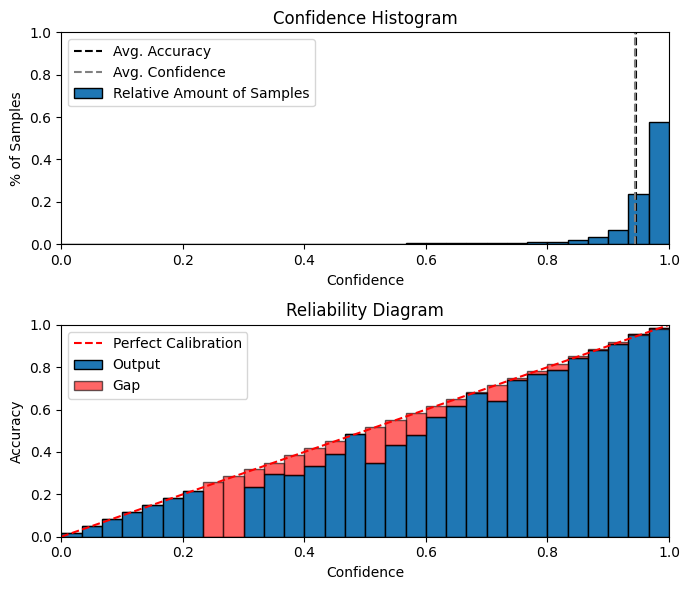

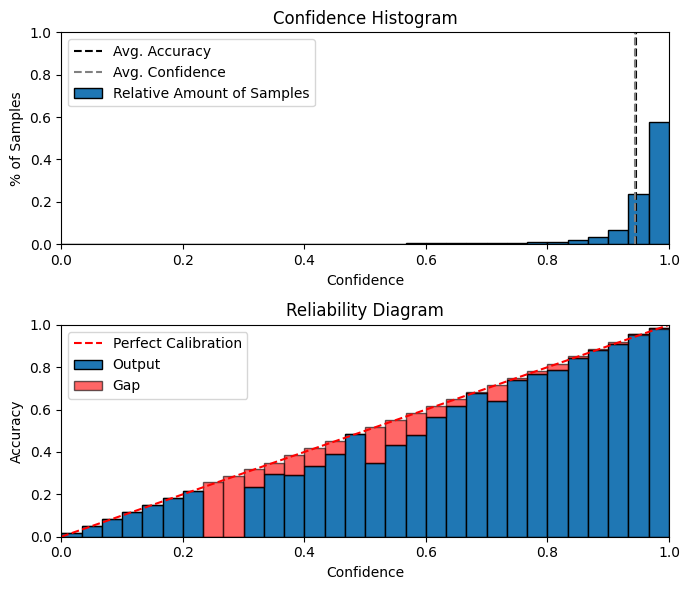

In [ ]:
#reliability diagram (calibration curve) for the uncalibrated model
n_bins = 30
diagram = ReliabilityDiagram(n_bins)
diagram.plot(y_score, y_onehot_test)  # visualize miscalibration of uncalibrated

In [ ]:
#Expected calibration errors for the uncalibrated and calibrated models
n_bins = 10
from netcal.metrics import ECE
ece = ECE(n_bins)
score = ece.measure(y_score, y_onehot_test)

In [ ]:
# calibration metrics
print(score)

0.008042246197452384


In [ ]:
# Codes for 95% CI determination
df_auc = pd.DataFrame(data=np.column_stack((y_onehot_test, y_score)))

In [ ]:
df_auc.shape

(66398, 16)

In [ ]:
df_auc.head()

0    1    2    3    4    5    6    7         8         9         10  \
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.985803  0.005497  0.000081   
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.971035  0.007117  0.000385   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.978461  0.005977  0.000299   
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.863786  0.024846  0.003540   
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.757892  0.023542  0.001074   

         11        12        13        14        15  
0  0.000253  0.001624  0.000048  0.006626  0.000067  
1  0.000775  0.004924  0.000116  0.015531  0.000118  
2  0.000862  0.004954  0.000236  0.009093  0.000119  
3  0.008518  0.078477  0.002695  0.014640  0.003499  
4  0.025194  0.171305  0.010147  0.010138  0.000708

In [ ]:
# Codes for 95% CI determination
df_auc.columns = ['O1_true', 'O2_true', 'O3_true', 'O4_true', 'O5_true', 'O6_true', 'O7_true', 'O8_true', 'O1_pred_model', 'O2_pred_model', 'O3_pred_model', 'O4_pred_model', 'O5_pred_model', 'O6_pred_model', 'O7_pred_model', 'O8_pred_model']


In [ ]:
df_auc.head()

O1_true  O2_true  O3_true  O4_true  O5_true  O6_true  O7_true  O8_true  \
0      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   O1_pred_model  O2_pred_model  O3_pred_model  O4_pred_model  O5_pred_model  \
0       0.985803       0.005497       0.000081       0.000253       0.001624   
1       0.971035       0.007117       0.000385       0.000775       0.004924   
2       0.978461       0.005977       0.000299       0.000862       0.004954   
3       0.863786       0.024846       0.003540       0.008518       0.078477   
4       0.757892       0.023542       0.001074       0.025194       0.171305   

   O6_pred_model  O7_pred_model  O8_pred_model  
0       0.000048       0.006626       0.000067  
1       0.000116       0.015531       0.000118  
2       0.000236       0.009093       0.000119  
3       0.002695       0.014640       0.003499  
4       0.010147       0.010138       0.000708

In [ ]:
# Codes for 95% CI determination
df_auc.to_csv('/content/drive/MyDrive/Colab Notebooks/clf_hinge_auc_060723.csv')

In [ ]:
# Macro-averaged AUC with a multi-class outcome
from sklearn.metrics import roc_auc_score
macro_roc_auc_ovr_hinge = roc_auc_score(
    y_test,
    clf_SGD_hinge.predict_proba(X_test),
    multi_class="ovr",
    average="macro",
)
print(macro_roc_auc_ovr_hinge)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.8449545252906211


In [ ]:
# weighted AUC for an multi-class outcome
weight_roc_auc_ovr = roc_auc_score(
    y_test,
    clf_SGD_hinge.predict_proba(X_test),
    multi_class="ovr",
    average="weighted"
)
print(weight_roc_auc_ovr)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.8304125644315369


In [ ]:
# one-hot coding for the outcome. For the AUC curve
from sklearn.preprocessing import LabelBinarizer

y_test_labeled = label_encoder.transform(y_test)
y_test_labeled.shape


(66398,)

In [ ]:
# AUC curve function
from sklearn import metrics
from sklearn.metrics import roc_curve
import seaborn as sns
import matplotlib.pyplot as plt



def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)
    sns.color_palette("colorblind")
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize = 20)
    ax.set_ylabel('True Positive Rate', fontsize = 20)
    ax.set_title('Receiver operating characteristic for linear SVM', fontsize = 20)
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    image_format = 'tiff' # e.g .png, .svg, etc.
    image_name = 'clf_SGD_hinge.tiff'
    plt.text(x=0.15, y =0.65, fontsize=20, s = 'Macro-averaged AUC = 0.84 (0.83-0.86) \n Weighted AUC = 0.83')
    fig.savefig(image_name, format=image_format, dpi=1200, pil_kwargs={"compression": "tiff_lzw"})
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


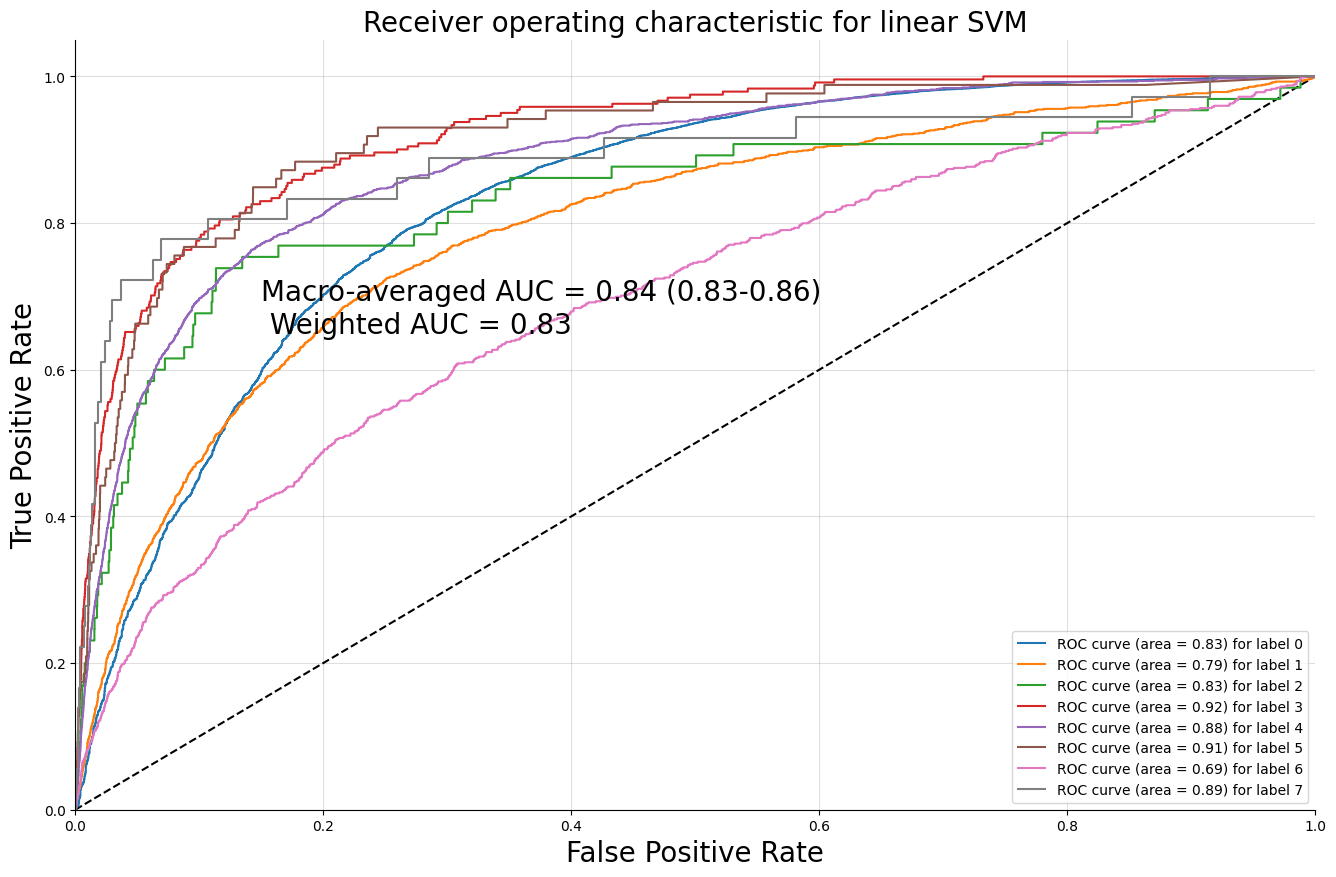

In [ ]:
plot_multiclass_roc(clf_SGD_hinge, X_test, y_test_labeled, n_classes=8, figsize=(16, 10))


LOGISTIC REGRESSION

In [ ]:
# import all necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import (
    GroupShuffleSplit,
    GroupKFold,
    StratifiedGroupKFold,
)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#Access to Google Disk
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load the data
X_train = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/X_train_refined_060723.pkl')
y_train = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/y_train_refined_060723.pkl")
X_validation = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/X_validation_refined_060723.pkl')
y_validation = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/y_validation_refined_060723.pkl")
X_test = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/X_test_refined_060723.pkl')
y_test = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/y_test_refined_060723.pkl')

In [ ]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)
print(y_train.unique())
print(y_validation.unique())
print(y_test.unique())

(237376, 103)
(59345, 103)
(66398, 103)
['No' 'death_only' 'bleeding_only' 'three_outcomes' 'death_stroke'
 'stroke_only' 'bleeding_stroke' 'death_bleeding']
['No' 'bleeding_only' 'death_only' 'stroke_only' 'death_bleeding'
 'death_stroke' 'three_outcomes' 'bleeding_stroke']
['bleeding_only' 'No' 'death_only' 'bleeding_stroke' 'death_bleeding'
 'stroke_only' 'three_outcomes' 'death_stroke']


In [ ]:
# binarize the Outcome
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
print (y_train)

[0 0 0 ... 0 0 0]


In [ ]:
# Grid seacrh for the best parameters of logistic regression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop = 'if_binary')
categorical_features = X_train.columns.drop(['AGE', 'DISCWT', 'charlson_score'])
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_features),
    ('standard_scaler', StandardScaler(), ['AGE', 'charlson_score'])])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', SGDClassifier(random_state=1, loss = 'log_loss', max_iter=1000, class_weight = 'balanced'))])
#kwargs = {pipe.steps[-1][0] + '__sample_weight': X_train.DISCWT}
param_grid = {'classiffier__alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10],
              'classiffier__penalty' : ['l2', 'l1', 'elasticnet']}
sgkf = StratifiedGroupKFold(n_splits=5)
clf_SGD_log = GridSearchCV(pipe, param_grid=param_grid, cv=sgkf, scoring='roc_auc_ovr')
clf_SGD_log.fit(X_train, y_train, groups = X_train.NIS_STRATUM, **{'classiffier__sample_weight': X_train.DISCWT})


In [ ]:
clf_SGD_log.best_params_

{'classiffier__alpha': 0.01, 'classiffier__penalty': 'l2'}

In [ ]:
clf_SGD_log.cv_results_

In [ ]:
#logistic regression with the best parameters
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop = 'if_binary')
categorical_features = X_train.columns.drop(['AGE', 'DISCWT', 'charlson_score', 'elixhauser_score'])
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_features),
    ('standard_scaler', StandardScaler(), ['AGE', 'charlson_score', 'elixhauser_score'])])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', SGDClassifier(random_state=1, loss = 'log_loss', max_iter=1000, class_weight = 'balanced'))])
param_grid = {'classiffier__alpha' : [0.01],
              'classiffier__penalty' : ['l2']}
sgkf = StratifiedGroupKFold(n_splits=5)
clf_SGD_log = GridSearchCV(pipe, param_grid=param_grid, cv=sgkf, scoring='roc_auc_ovr')
clf_SGD_log.fit(X_train, y_train, groups = X_train.NIS_STRATUM, **{'classiffier__sample_weight': X_train.DISCWT})

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

GridSearchCV(cv=StratifiedGroupKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('one-hot-encoder',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore'),
                                                                         Index(['AMONTH', 'AUTOIMMUNE', 'BLD001', 'BLD003', 'BLD006', 'CANCER_LEUK',
       'CANCER_LYMPH', 'CANCER_METS', 'CANCER_SOLID', 'CAR00...
       'pers_hist_stroke', 'prev_CABG', 'prev_PCI', 'prev_pacemaker',
       'smoking', 'use_antithromb', 'use_aspirin', 'NIS_STRATUM', 'END010'],
      dtype='object')),
                                                                        ('standard_scaler',
                                                                         StandardScaler(),
                                                                         ['AGE',
                                                                          'charlson_score',
                                                                          'elixhauser_score'])])),
                                       ('classiffier',
                                        SGDClassifier(class_weight='balanced',
                                                      loss='log_loss',
                                                      random_state=1))]),
             param_grid={'classiffier__alpha': [0.01],
                         'classiffier__penalty': ['l2']},
             scoring='roc_auc_ovr')

In [ ]:
# save the best logistic regression model
from joblib import dump, load
dump(clf_SGD_log,'/content/drive/MyDrive/Colab Notebooks/clf_SGD_log_selected_060723.pkl' )

['/content/drive/MyDrive/Colab Notebooks/clf_SGD_log_selected_060723.pkl']

In [ ]:
# load the best model if you skip training
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib
from sklearn.model_selection import GridSearchCV
clf_SGD_log = joblib.load('/content/drive/MyDrive/Colab Notebooks/clf_SGD_log_selected_060723.pkl')

In [ ]:
# to perform isotonic calibration on the validation cohort
from sklearn.calibration import CalibratedClassifierCV
best_LOG = clf_SGD_log.best_estimator_
clf_log_calibrated_iso = CalibratedClassifierCV(best_LOG, cv=5, method='isotonic')
clf_log_calibrated_iso.fit(X_validation, y_validation)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


CalibratedClassifierCV(cv=5,
                       estimator=Pipeline(steps=[('preprocessor',
                                                  ColumnTransformer(transformers=[('one-hot-encoder',
                                                                                   OneHotEncoder(drop='if_binary',
                                                                                                 handle_unknown='ignore'),
                                                                                   Index(['AMONTH', 'AUTOIMMUNE', 'BLD001', 'BLD003', 'BLD006', 'CANCER_LEUK',
       'CANCER_LYMPH', 'CANCER_METS', 'CANCER_SOLID', 'CAR003', 'CIR003',
       'CIR005', 'CIR007', 'CIR008', 'CIR009', 'CIR0...
       'iron_anemia', 'lowplatelet', 'old_MI', 'pers_hist_neo',
       'pers_hist_stroke', 'prev_CABG', 'prev_PCI', 'prev_pacemaker',
       'smoking', 'use_antithromb', 'use_aspirin', 'NIS_STRATUM', 'END010'],
      dtype='object')),
                                                                                  ('standard_scaler',
                                                                                   StandardScaler(),
                                                                                   ['AGE',
                                                                                    'charlson_score',
                                                                                    'elixhauser_score'])])),
                                                 ('classiffier',
                                                  SGDClassifier(alpha=0.01,
                                                                class_weight='balanced',
                                                                loss='log_loss',
                                                                random_state=1))]),
                       method='isotonic')

In [ ]:
# to perform sigmoid calibration on the validation cohort
from sklearn.calibration import CalibratedClassifierCV
best_LOG = clf_SGD_log.best_estimator_
clf_log_calibrated_sigm = CalibratedClassifierCV(best_LOG, cv=5, method='sigmoid')
clf_log_calibrated_sigm.fit(X_validation, y_validation)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


CalibratedClassifierCV(cv=5,
                       estimator=Pipeline(steps=[('preprocessor',
                                                  ColumnTransformer(transformers=[('one-hot-encoder',
                                                                                   OneHotEncoder(drop='if_binary',
                                                                                                 handle_unknown='ignore'),
                                                                                   Index(['AMONTH', 'AUTOIMMUNE', 'BLD001', 'BLD003', 'BLD006', 'CANCER_LEUK',
       'CANCER_LYMPH', 'CANCER_METS', 'CANCER_SOLID', 'CAR003', 'CIR003',
       'CIR005', 'CIR007', 'CIR008', 'CIR009', 'CIR0...
       'iron_anemia', 'lowplatelet', 'old_MI', 'pers_hist_neo',
       'pers_hist_stroke', 'prev_CABG', 'prev_PCI', 'prev_pacemaker',
       'smoking', 'use_antithromb', 'use_aspirin', 'NIS_STRATUM', 'END010'],
      dtype='object')),
                                                                                  ('standard_scaler',
                                                                                   StandardScaler(),
                                                                                   ['AGE',
                                                                                    'charlson_score',
                                                                                    'elixhauser_score'])])),
                                                 ('classiffier',
                                                  SGDClassifier(alpha=0.01,
                                                                class_weight='balanced',
                                                                loss='log_loss',
                                                                random_state=1))]))

In [ ]:
clf_SGD_log.cv_results_

{'mean_fit_time': array([8.54506507]),
 'std_fit_time': array([0.64191879]),
 'mean_score_time': array([0.69020529]),
 'std_score_time': array([0.36498848]),
 'param_classiffier__alpha': masked_array(data=[0.01],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_classiffier__penalty': masked_array(data=['l2'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'classiffier__alpha': 0.01, 'classiffier__penalty': 'l2'}],
 'split0_test_score': array([0.82440079]),
 'split1_test_score': array([0.82875197]),
 'split2_test_score': array([0.83495076]),
 'split3_test_score': array([0.81867956]),
 'split4_test_score': array([0.81599225]),
 'mean_test_score': array([0.82455506]),
 'std_test_score': array([0.0068345]),
 'rank_test_score': array([1], dtype=int32)}

In [ ]:
#performance on the test dataset of uncalibrated model
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf_SGD_log.predict_proba(X_test), multi_class='ovr')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.8411966731950202

In [ ]:
#performance on the test dataset of calibrated model (isotonic)
roc_auc_score(y_test, clf_log_calibrated_iso.predict_proba(X_test), multi_class='ovr')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

0.8293579947476234

In [ ]:
#performance on the test dataset of calibrated model (sigmoid)
roc_auc_score(y_test, clf_log_calibrated_sigm.predict_proba(X_test), multi_class='ovr')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

0.8275791283728127

In [ ]:
#predicted probabilities for the calibrated model (isotonic)
y_score_calibrated_iso = clf_log_calibrated_iso.predict_proba(X_test)
y_score_calibrated_iso

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

array([[9.87568796e-01, 3.84296534e-03, 2.72332698e-04, ...,
        0.00000000e+00, 5.35893594e-03, 3.44508137e-04],
       [9.71243736e-01, 9.81223622e-03, 6.28311325e-04, ...,
        1.66085516e-04, 8.37518537e-03, 1.08274013e-04],
       [9.85686073e-01, 4.35765697e-03, 2.21824146e-04, ...,
        1.07085011e-04, 4.67662331e-03, 7.30296045e-05],
       ...,
       [9.71314765e-01, 3.72683013e-03, 3.46710408e-04, ...,
        1.33869065e-03, 9.38098026e-03, 0.00000000e+00],
       [8.94197811e-01, 2.08433426e-02, 1.03194378e-03, ...,
        1.72269481e-03, 8.30822920e-03, 8.87118635e-04],
       [9.93968561e-01, 2.54847844e-03, 1.47254116e-04, ...,
        0.00000000e+00, 3.33570651e-03, 0.00000000e+00]])

In [ ]:
#predicted probabilities for the calibrated model (sigmoid)
y_score_calibrated_sigm = clf_log_calibrated_sigm.predict_proba(X_test)
y_score_calibrated_sigm

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

array([[9.82648685e-01, 5.75358733e-03, 4.25920308e-04, ...,
        1.34095834e-04, 5.64501777e-03, 5.38924153e-04],
       [9.68847640e-01, 9.84244569e-03, 7.27605127e-04, ...,
        4.67580091e-04, 8.66302461e-03, 2.18013637e-04],
       [9.79593660e-01, 5.65403342e-03, 3.63008745e-04, ...,
        3.41860483e-04, 5.40156509e-03, 1.58056735e-04],
       ...,
       [9.67668944e-01, 5.57369327e-03, 5.31371778e-04, ...,
        8.93227793e-04, 8.80300636e-03, 1.32205661e-04],
       [9.04949206e-01, 1.78564594e-02, 1.19520696e-03, ...,
        1.13874938e-03, 8.76642765e-03, 9.15039709e-04],
       [9.90078247e-01, 4.03859103e-03, 2.23371162e-04, ...,
        4.67115745e-05, 4.13145830e-03, 6.30787204e-05]])

In [ ]:
#predicted probabilities for the uncalibrated model
y_score_uncalibrated = clf_SGD_log.predict_proba(X_test)
y_score_uncalibrated

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0.8410746 , 0.04426966, 0.01557052, ..., 0.00888899, 0.05411519,
        0.00298913],
       [0.72052998, 0.04912093, 0.05682199, ..., 0.02053109, 0.06457918,
        0.02298756],
       [0.75961777, 0.04637089, 0.03207703, ..., 0.01767609, 0.06235843,
        0.0159668 ],
       ...,
       [0.6643359 , 0.06115361, 0.03426679, ..., 0.04984395, 0.08062534,
        0.00839656],
       [0.33427152, 0.07060116, 0.06463438, ..., 0.14032451, 0.04521885,
        0.02782109],
       [0.8413265 , 0.03939134, 0.01464526, ..., 0.00388063, 0.08279225,
        0.00940247]])

In [ ]:
# define y and X to re-label y_test
y_train = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/y_train_refined_060723.pkl")
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape
np.unique(y_onehot_test)


array([0, 1])

In [ ]:
pip install netcal

In [ ]:
#load ReliabilityDiagram
from netcal.presentation import ReliabilityDiagram


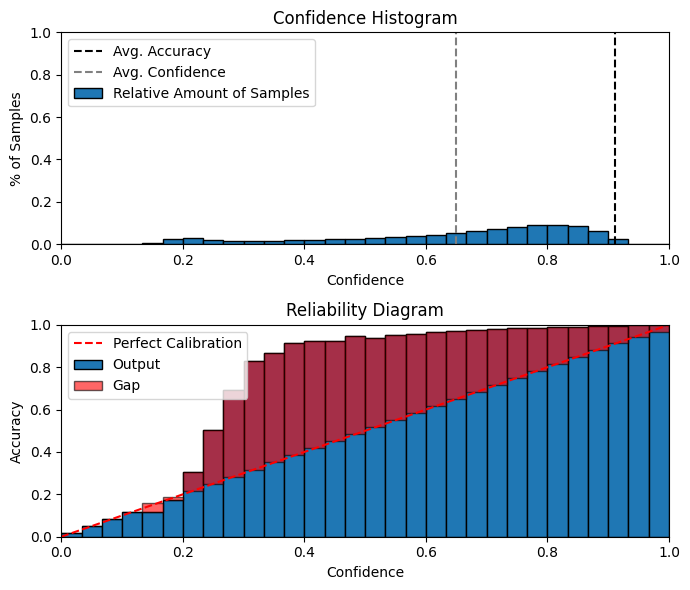

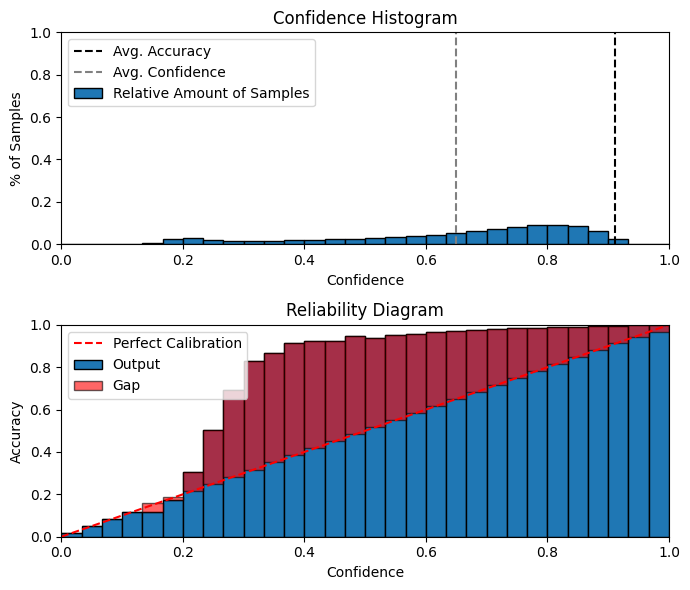

In [ ]:
#reliability diagram (calibration curve) for the uncalibrated model
n_bins = 30
diagram = ReliabilityDiagram(n_bins)
diagram.plot(y_score_uncalibrated, y_onehot_test)  # visualize miscalibration of uncalibrated

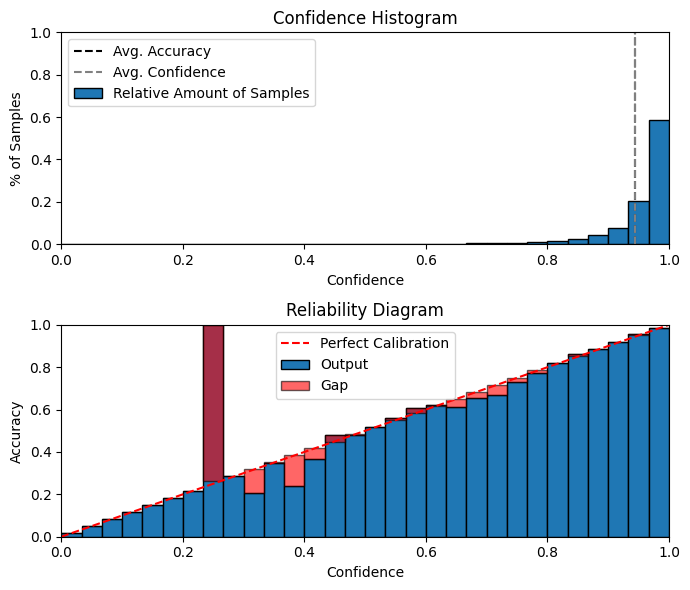

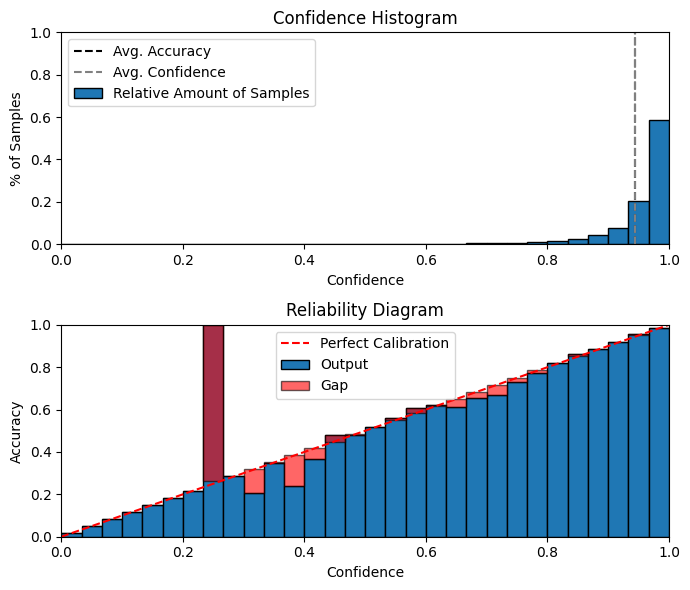

In [ ]:
#reliability diagram (calibration curve) for the calibrated model (isotonic)
diagram.plot(y_score_calibrated_iso, y_onehot_test)  # visualize miscalibration of calibrated

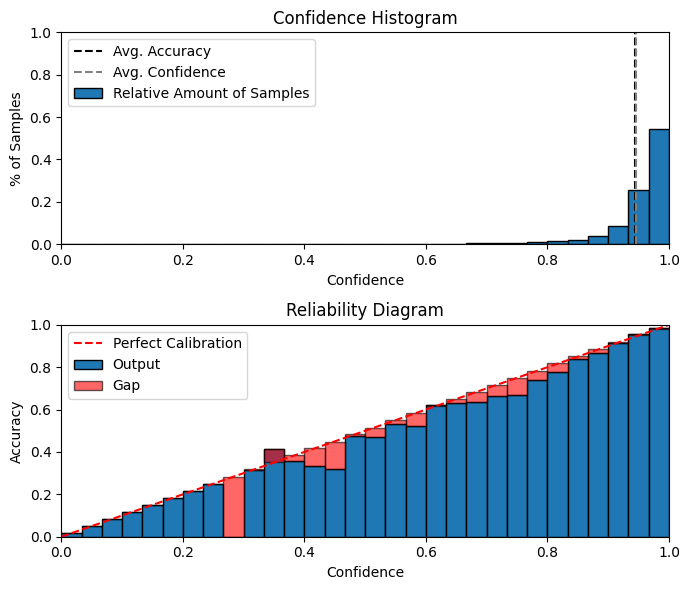

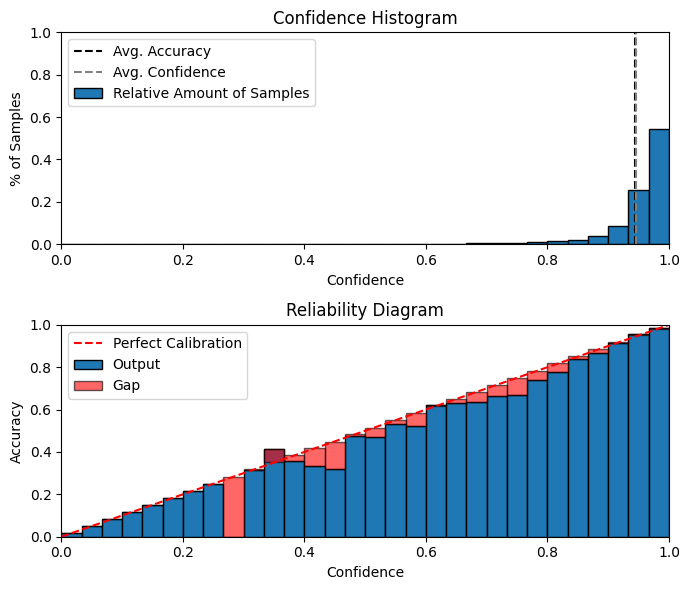

In [ ]:
#reliability diagram (calibration curve) for the calibrated model (sigmoid)
diagram.plot(y_score_calibrated_sigm, y_onehot_test)  # visualize miscalibration of calibrated

In [ ]:
#Expected calibration errors for the uncalibrated and calibrated models
n_bins = 10
from netcal.metrics import ECE
ece = ECE(n_bins)
uncalibrated_score = ece.measure(y_score_uncalibrated, y_onehot_test)
calibrated_score_iso = ece.measure(y_score_calibrated_iso, y_onehot_test)
calibrated_score_sigm = ece.measure(y_score_calibrated_sigm, y_onehot_test)

In [ ]:
# calibration metrics
print(uncalibrated_score)
print(calibrated_score_iso)
print(calibrated_score_sigm)

0.26183261706656147
0.0025246570360863705
0.006522121549427204


In [ ]:
# Codes for 95% CI determination
df_auc = pd.DataFrame(data=np.column_stack((y_onehot_test, y_score_calibrated_iso)))

In [ ]:
df_auc.shape

(66398, 16)

In [ ]:
df_auc.head()

0    1    2    3    4    5    6    7         8         9         10  \
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.987569  0.003843  0.000272   
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.971244  0.009812  0.000628   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.985686  0.004358  0.000222   
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.941360  0.013232  0.001329   
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.835176  0.027827  0.002252   

         11        12        13        14        15  
0  0.000043  0.002569  0.000000  0.005359  0.000345  
1  0.000701  0.008965  0.000166  0.008375  0.000108  
2  0.000490  0.004388  0.000107  0.004677  0.000073  
3  0.003243  0.025541  0.001090  0.013708  0.000497  
4  0.013826  0.100747  0.004920  0.014685  0.000569

In [ ]:
# Codes for 95% CI determination
df_auc.columns = ['O1_true', 'O2_true', 'O3_true', 'O4_true', 'O5_true', 'O6_true', 'O7_true', 'O8_true', 'O1_pred_model', 'O2_pred_model', 'O3_pred_model', 'O4_pred_model', 'O5_pred_model', 'O6_pred_model', 'O7_pred_model', 'O8_pred_model']


In [ ]:
df_auc.head()

O1_true  O2_true  O3_true  O4_true  O5_true  O6_true  O7_true  O8_true  \
0      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   O1_pred_model  O2_pred_model  O3_pred_model  O4_pred_model  O5_pred_model  \
0       0.987569       0.003843       0.000272       0.000043       0.002569   
1       0.971244       0.009812       0.000628       0.000701       0.008965   
2       0.985686       0.004358       0.000222       0.000490       0.004388   
3       0.941360       0.013232       0.001329       0.003243       0.025541   
4       0.835176       0.027827       0.002252       0.013826       0.100747   

   O6_pred_model  O7_pred_model  O8_pred_model  
0       0.000000       0.005359       0.000345  
1       0.000166       0.008375       0.000108  
2       0.000107       0.004677       0.000073  
3       0.001090       0.013708       0.000497  
4       0.004920       0.014685       0.000569

In [ ]:
# Codes for 95% CI determination: save the obtained propabilities with ground-truth values for 95%CI estimation in R
df_auc.to_csv('/content/drive/MyDrive/Colab Notebooks/clf_log_calibrated_auc_060723.csv')

In [ ]:
#Macro-averaged ROC-AUC for the calibrated model
from sklearn.metrics import roc_auc_score
macro_roc_auc_ovr_log = roc_auc_score(
    y_test,
    clf_log_calibrated_iso.predict_proba(X_test),
    multi_class="ovr",
    average="macro",
)
print(macro_roc_auc_ovr_log)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

0.8293579947476234


In [ ]:
#weighted ROC-AUC for the calibrated model
weight_roc_auc_ovr_log = roc_auc_score(
    y_test,
    clf_log_calibrated_iso.predict_proba(X_test),
    multi_class="ovr",
    average="weighted",
)
print(weight_roc_auc_ovr_log)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

0.8158649953297207


In [ ]:
# re-label the outcomes
y_test_labeled = label_encoder.transform(y_test)
print(y_test_labeled.shape)
print(np.unique(y_test_labeled))

(66398,)
[0 1 2 3 4 5 6 7]


In [ ]:
# define AUC curve function
from sklearn import metrics
from sklearn.metrics import roc_curve
import seaborn as sns
import matplotlib.pyplot as plt



def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)
    sns.color_palette("colorblind")
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize = 20)
    ax.set_ylabel('True Positive Rate', fontsize = 20)
    ax.set_title('Receiver operating characteristic for logistic regression', fontsize = 20)
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    image_format = 'tiff' # e.g .png, .svg, etc.
    image_name = 'SGD_log.tiff'
    plt.text(x=0.15, y =0.65, fontsize=20, s = 'Macro-averaged AUC = 0.83 (0.82-0.84) \n Weighted AUC = 0.82')
    fig.savefig(image_name, format=image_format, dpi=1200, pil_kwargs={"compression": "tiff_lzw"})
    plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

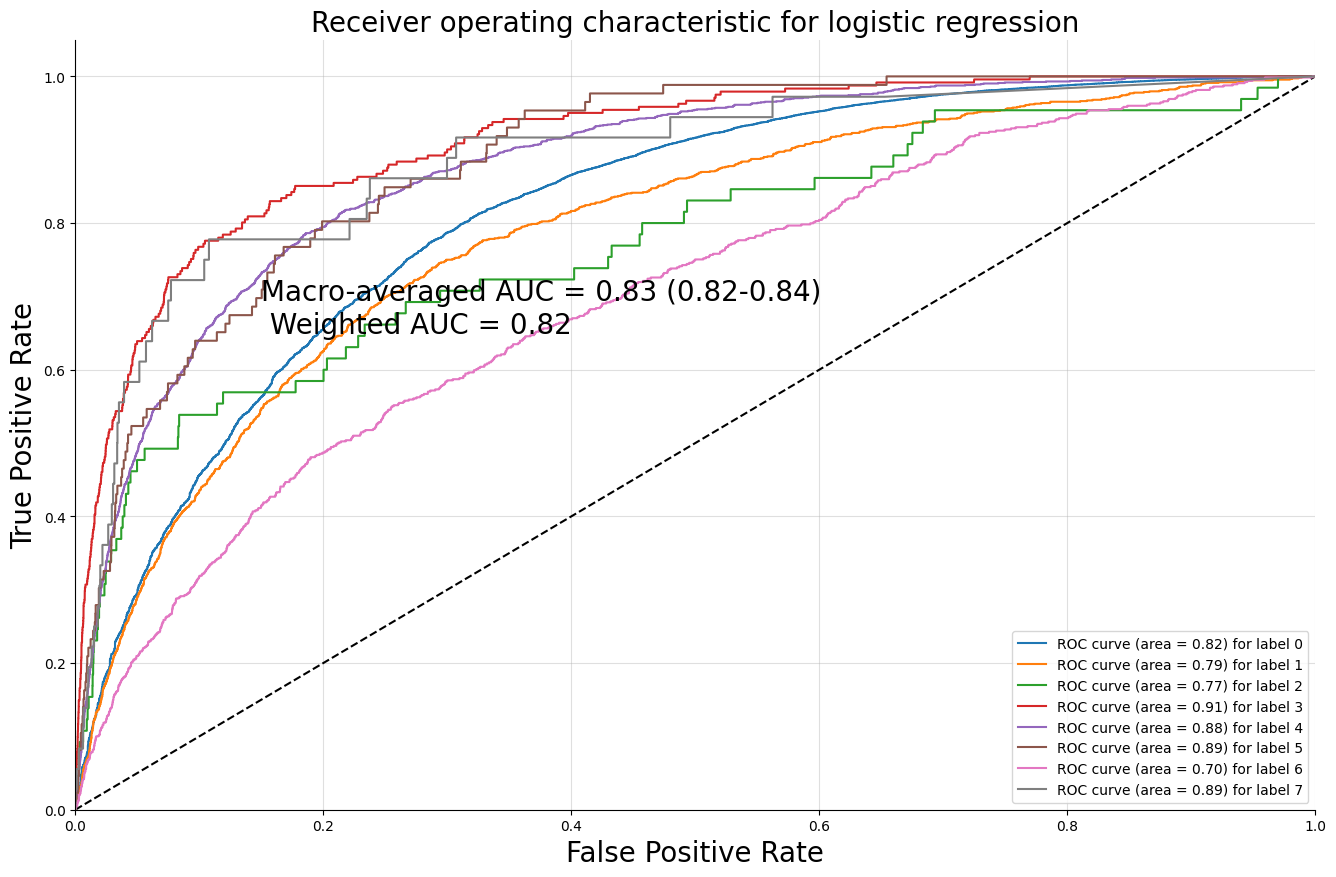

In [ ]:
plot_multiclass_roc(clf_log_calibrated_iso, X_test, y_test_labeled, n_classes=8, figsize=(16, 10))




XGBOOST MODELLING





In [1]:
# import all necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import (
    GroupShuffleSplit,
    GroupKFold,
    StratifiedGroupKFold,
)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# access to Google Disk
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load the data
X_train = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/X_train_refined_060723.pkl')
y_train = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/y_train_refined_060723.pkl")
X_validation = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/X_validation_refined_060723.pkl')
y_validation = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/y_validation_refined_060723.pkl")
X_test = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/X_test_refined_060723.pkl')
y_test = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/y_test_refined_060723.pkl')

In [4]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)
print(y_train.unique())
print(y_validation.unique())
print(y_test.unique())

(237376, 103)
(59345, 103)
(66398, 103)
['No' 'death_only' 'bleeding_only' 'three_outcomes' 'death_stroke'
 'stroke_only' 'bleeding_stroke' 'death_bleeding']
['No' 'bleeding_only' 'death_only' 'stroke_only' 'death_bleeding'
 'death_stroke' 'three_outcomes' 'bleeding_stroke']
['bleeding_only' 'No' 'death_only' 'bleeding_stroke' 'death_bleeding'
 'stroke_only' 'three_outcomes' 'death_stroke']


In [6]:
# binarize the Outcome
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
print (y_train)

[0 0 0 ... 0 0 0]


In [5]:
import xgboost as xgb

In [ ]:
# training the XGBoost model with the best parameters found in the previous grid search (see below). Remember to run this code with GPU
#Eta = 0.05 n_est = 1500
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop = 'if_binary')
categorical_features = X_train.columns.drop(['AGE', 'DISCWT', 'charlson_score', 'elixhauser_score'])
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_features),
    ('standard_scaler', StandardScaler(), ['AGE', 'charlson_score', 'elixhauser_score'])])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', xgb.XGBClassifier(random_state=1, tree_method= 'gpu_hist', objective = 'multi:softprob', learning_rate =0.01, n_estimators=1500, max_depth = 7, min_child_weight = 5, gamma = 0.4, subsample = 0.8, colsample_bytree = 0.7, eta = 0.05, n_jobs = -1))])
param_grid = {'classiffier__reg_alpha': [50]}
sgkf = StratifiedGroupKFold(n_splits=5)
clf_xgboost = GridSearchCV(pipe, param_grid=param_grid, cv=sgkf, scoring='roc_auc_ovr', verbose = 3)
clf_xgboost.fit(X_train, y_train, groups = X_train.NIS_STRATUM , **{'classiffier__sample_weight': X_train.DISCWT})

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 1/5] END .........classiffier__reg_alpha=50;, score=0.868 total time= 1.6min


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 2/5] END .........classiffier__reg_alpha=50;, score=0.865 total time= 1.6min


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 3/5] END .........classiffier__reg_alpha=50;, score=0.867 total time= 1.5min


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 4/5] END .........classiffier__reg_alpha=50;, score=0.861 total time= 1.5min


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 5/5] END .........classiffier__reg_alpha=50;, score=0.861 total time= 1.5min


GridSearchCV(cv=StratifiedGroupKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('one-hot-encoder',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore'),
                                                                         Index(['AMONTH', 'AUTOIMMUNE', 'BLD001', 'BLD003', 'BLD006', 'CANCER_LEUK',
       'CANCER_LYMPH', 'CANCER_METS', 'CANCER_SOLID', 'CAR00...
                                                      interaction_constraints=None,
                                                      learning_rate=0.01,
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=7,
                                                      max_leaves=None,
                                                      min_child_weight=5,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=1500,
                                                      n_jobs=-1,
                                                      num_parallel_tree=None,
                                                      objective='multi:softprob', ...))]),
             param_grid={'classiffier__reg_alpha': [50]}, scoring='roc_auc_ovr',
             verbose=3)

In [ ]:
# save the best XGBoost
from joblib import dump, load
dump(clf_xgboost,'/content/drive/MyDrive/Colab Notebooks/clf_xgboost_best_selected_uncalibrated_060723_refined.pkl' )

['/content/drive/MyDrive/Colab Notebooks/clf_xgboost_best_selected_uncalibrated_060723_refined.pkl']

In [ ]:
# load the best XGBoost. Remember to turn on your GPU
from joblib import dump, load
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib
from sklearn.model_selection import GridSearchCV
clf_xgboost = joblib.load('/content/drive/MyDrive/Colab Notebooks/clf_xgboost_best_selected_uncalibrated_060723_refined.pkl')


In [7]:
y_validation = label_encoder.transform(y_validation)
print (y_validation)

[0 0 0 ... 0 0 0]


In [ ]:
# to perform isotonic calibration on the validation cohort
from sklearn.calibration import CalibratedClassifierCV
best_xgboost = clf_xgboost.best_estimator_
clf_xgboost_calibrated_iso = CalibratedClassifierCV(best_xgboost, cv=10, method='isotonic')
clf_xgboost_calibrated_iso.fit(X_validation, y_validation)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


CalibratedClassifierCV(cv=10,
                       estimator=Pipeline(steps=[('preprocessor',
                                                  ColumnTransformer(transformers=[('one-hot-encoder',
                                                                                   OneHotEncoder(drop='if_binary',
                                                                                                 handle_unknown='ignore'),
                                                                                   Index(['AMONTH', 'AUTOIMMUNE', 'BLD001', 'BLD003', 'BLD006', 'CANCER_LEUK',
       'CANCER_LYMPH', 'CANCER_METS', 'CANCER_SOLID', 'CAR003', 'CIR003',
       'CIR005', 'CIR007', 'CIR008', 'CIR009', 'CIR...
                                                                grow_policy=None,
                                                                importance_type=None,
                                                                interaction_constraints=None,
                                                                learning_rate=0.01,
                                                                max_bin=None,
                                                                max_cat_threshold=None,
                                                                max_cat_to_onehot=None,
                                                                max_delta_step=None,
                                                                max_depth=7,
                                                                max_leaves=None,
                                                                min_child_weight=5,
                                                                missing=nan,
                                                                monotone_constraints=None,
                                                                n_estimators=1500,
                                                                n_jobs=-1,
                                                                num_parallel_tree=None,
                                                                objective='multi:softprob', ...))]),
                       method='isotonic')

In [ ]:
# save the best XGBoost
from joblib import dump, load
dump(clf_xgboost_calibrated_iso,'/content/drive/MyDrive/Colab Notebooks/clf_xgboost_best_selected_calibrated_iso_060723_refined.pkl' )

['/content/drive/MyDrive/Colab Notebooks/clf_xgboost_best_selected_calibrated_iso_060723_refined.pkl']

In [8]:
# load the best XGBoost. Remember to turn on your GPU
from joblib import dump, load
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib
from sklearn.model_selection import GridSearchCV
clf_xgboost_calibrated_iso = joblib.load('/content/drive/MyDrive/Colab Notebooks/clf_xgboost_best_selected_calibrated_iso_060723_refined.pkl')

In [10]:
# save the best XGBoost as a compressed file
from joblib import dump, load
dump(clf_xgboost_calibrated_iso,'/content/drive/MyDrive/Colab Notebooks/clf_xgboost_best_selected_calibrated_iso_060723_compressed.pkl', compress=5 )

['/content/drive/MyDrive/Colab Notebooks/clf_xgboost_best_selected_calibrated_iso_060723_compressed.pkl']

In [ ]:
str(clf_xgboost_calibrated_iso.estimator.named_steps['classiffier'])

"XGBClassifier(base_score=None, booster=None, callbacks=None,\n              colsample_bylevel=None, colsample_bynode=None,\n              colsample_bytree=0.7, early_stopping_rounds=None,\n              enable_categorical=False, eta=0.05, eval_metric=None,\n              feature_types=None, gamma=0.4, gpu_id=None, grow_policy=None,\n              importance_type=None, interaction_constraints=None,\n              learning_rate=0.01, max_bin=None, max_cat_threshold=None,\n              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,\n              max_leaves=None, min_child_weight=5, missing=nan,\n              monotone_constraints=None, n_estimators=1500, n_jobs=-1,\n              num_parallel_tree=None, objective='multi:softprob', ...)"

In [ ]:
for param, value in clf_xgboost_calibrated_iso.estimator.named_steps['classiffier'].get_params(deep=True).items():
     print(f"{param} -> {value}")

objective -> multi:softprob
use_label_encoder -> None
base_score -> None
booster -> None
callbacks -> None
colsample_bylevel -> None
colsample_bynode -> None
colsample_bytree -> 0.7
early_stopping_rounds -> None
enable_categorical -> False
eval_metric -> None
feature_types -> None
gamma -> 0.4
gpu_id -> None
grow_policy -> None
importance_type -> None
interaction_constraints -> None
learning_rate -> 0.01
max_bin -> None
max_cat_threshold -> None
max_cat_to_onehot -> None
max_delta_step -> None
max_depth -> 7
max_leaves -> None
min_child_weight -> 5
missing -> nan
monotone_constraints -> None
n_estimators -> 1500
n_jobs -> -1
num_parallel_tree -> None
predictor -> None
random_state -> 1
reg_alpha -> 50
reg_lambda -> None
sampling_method -> None
scale_pos_weight -> None
subsample -> 0.8
tree_method -> gpu_hist
validate_parameters -> None
verbosity -> None
eta -> 0.05


In [ ]:
# to perform sigmoid calibration on the validation cohort
from sklearn.calibration import CalibratedClassifierCV
best_xgboost = clf_xgboost.best_estimator_
clf_xgboost_calibrated_sigm = CalibratedClassifierCV(best_xgboost, cv=10, method='sigmoid')
clf_xgboost_calibrated_sigm.fit(X_validation, y_validation)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


CalibratedClassifierCV(cv=10,
                       estimator=Pipeline(steps=[('preprocessor',
                                                  ColumnTransformer(transformers=[('one-hot-encoder',
                                                                                   OneHotEncoder(drop='if_binary',
                                                                                                 handle_unknown='ignore'),
                                                                                   Index(['AMONTH', 'AUTOIMMUNE', 'BLD001', 'BLD003', 'BLD006', 'CANCER_LEUK',
       'CANCER_LYMPH', 'CANCER_METS', 'CANCER_SOLID', 'CAR003', 'CIR003',
       'CIR005', 'CIR007', 'CIR008', 'CIR009', 'CIR...
                                                                gamma=0.4,
                                                                gpu_id=None,
                                                                grow_policy=None,
                                                                importance_type=None,
                                                                interaction_constraints=None,
                                                                learning_rate=0.01,
                                                                max_bin=None,
                                                                max_cat_threshold=None,
                                                                max_cat_to_onehot=None,
                                                                max_delta_step=None,
                                                                max_depth=7,
                                                                max_leaves=None,
                                                                min_child_weight=5,
                                                                missing=nan,
                                                                monotone_constraints=None,
                                                                n_estimators=1500,
                                                                n_jobs=-1,
                                                                num_parallel_tree=None,
                                                                objective='multi:softprob', ...))]))

In [ ]:
# save the best XGBoost
from joblib import dump, load
dump(clf_xgboost_calibrated_sigm,'/content/drive/MyDrive/Colab Notebooks/clf_xgboost_best_selected_calibrated_sigm_060723_refined.pkl' )

['/content/drive/MyDrive/Colab Notebooks/clf_xgboost_best_selected_calibrated_sigm_060723_refined.pkl']

In [ ]:
# load the best XGBoost. Remember to turn on your GPU
from joblib import dump, load
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib
from sklearn.model_selection import GridSearchCV
clf_xgboost_calibrated_sigm = joblib.load('/content/drive/MyDrive/Colab Notebooks/clf_xgboost_best_selected_calibrated_sigm_060723_refined.pkl')

In [ ]:
clf_xgboost.cv_results_

{'mean_fit_time': array([47.64085937]),
 'std_fit_time': array([2.57163765]),
 'mean_score_time': array([45.05519786]),
 'std_score_time': array([2.61105372]),
 'param_classiffier__reg_alpha': masked_array(data=[50],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'classiffier__reg_alpha': 50}],
 'split0_test_score': array([0.8681998]),
 'split1_test_score': array([0.86523431]),
 'split2_test_score': array([0.86672258]),
 'split3_test_score': array([0.86083761]),
 'split4_test_score': array([0.86068807]),
 'mean_test_score': array([0.86433647]),
 'std_test_score': array([0.00306522]),
 'rank_test_score': array([1], dtype=int32)}

In [ ]:
#performance on the test dataset of uncalibrated model
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf_xgboost.predict_proba(X_test), multi_class='ovr')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.8721271773109361

In [ ]:
#performance on the test dataset of calibrated model (isotonic)
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, clf_xgboost_calibrated_iso.predict_proba(X_test), multi_class='ovr')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

0.8577227446083122

In [ ]:
#performance on the test dataset of calibrated model (sigmoid)
roc_auc_score(y_test, clf_xgboost_calibrated_sigm.predict_proba(X_test), multi_class='ovr')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

0.8579359836467249

In [ ]:
#predicted probabilities for the uncalibrated model
y_score_uncalibrated = clf_xgboost.predict_proba(X_test)
y_score_uncalibrated

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[9.89648402e-01, 3.37323826e-03, 1.68140425e-04, ...,
        1.37492636e-04, 4.02213447e-03, 7.40712712e-05],
       [9.90155816e-01, 2.46088509e-03, 2.21655471e-04, ...,
        1.19475444e-04, 4.45112493e-03, 7.69955295e-05],
       [9.87197518e-01, 4.29691141e-03, 1.91684449e-04, ...,
        1.42651566e-04, 4.72330023e-03, 8.51436198e-05],
       ...,
       [9.85987484e-01, 2.47219251e-03, 1.90608014e-04, ...,
        2.57548294e-04, 3.33471457e-03, 8.86556736e-05],
       [9.17705059e-01, 1.10662580e-02, 7.76057248e-04, ...,
        2.31974735e-03, 7.99020566e-03, 3.87357723e-04],
       [9.93622959e-01, 1.55949022e-03, 1.27537234e-04, ...,
        6.61118902e-05, 3.65201011e-03, 4.96649154e-05]], dtype=float32)

In [ ]:
#predicted probabilities for the calibrated model (isotonic)
y_score_calibrated_iso = clf_xgboost_calibrated_iso.predict_proba(X_test)
y_score_calibrated_iso

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

array([[9.90570345e-01, 2.82512358e-03, 1.04299006e-04, ...,
        0.00000000e+00, 3.52572805e-03, 0.00000000e+00],
       [9.90922225e-01, 3.58178669e-03, 1.04416094e-04, ...,
        0.00000000e+00, 3.46887803e-03, 0.00000000e+00],
       [9.83721220e-01, 5.60180760e-03, 2.04737752e-04, ...,
        9.01678966e-05, 6.74711363e-03, 0.00000000e+00],
       ...,
       [9.85737069e-01, 3.69648865e-03, 1.39652576e-04, ...,
        4.55624101e-05, 4.69782235e-03, 0.00000000e+00],
       [8.87762701e-01, 2.00404704e-02, 6.17782820e-04, ...,
        5.52015569e-04, 1.26520921e-02, 1.97576224e-04],
       [9.96989417e-01, 4.29505558e-04, 3.37474072e-05, ...,
        0.00000000e+00, 2.28692774e-03, 0.00000000e+00]])

In [ ]:
y_score_calibrated_iso_predictions = clf_xgboost_calibrated_iso.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

In [ ]:
y_score_calibrated_iso_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_score_calibrated_iso_predictions.shape

(66398,)

In [ ]:
indexes = [
    index for index in range(len(y_score_calibrated_iso_predictions))
    if y_score_calibrated_iso_predictions[index] != 0
]

In [ ]:
print(indexes)

[119, 652, 1015, 1176, 2501, 2581, 4423, 5735, 5872, 6977, 6980, 7161, 7202, 7720, 7743, 7978, 8066, 8816, 9041, 9536, 9759, 9962, 9983, 10123, 10381, 10454, 10486, 10812, 11171, 11337, 11594, 11686, 11992, 12379, 13099, 13367, 13916, 14117, 14250, 14449, 14922, 15025, 15081, 15372, 15478, 15578, 15650, 15856, 15861, 15987, 16027, 16051, 16162, 16347, 16555, 16677, 17453, 18006, 18030, 18520, 18680, 18682, 18804, 18957, 19115, 19444, 19486, 19642, 20500, 22022, 22056, 22160, 22227, 22411, 22578, 22781, 22979, 23105, 23393, 23687, 23703, 24417, 24867, 24874, 24918, 25195, 25457, 25989, 26103, 26123, 26266, 26308, 26721, 26803, 26936, 27190, 27241, 27599, 27646, 27775, 27794, 27906, 28577, 28801, 28880, 28926, 29224, 29573, 29580, 29622, 30149, 30166, 30419, 30462, 30547, 30655, 30659, 30878, 31047, 31132, 31277, 31360, 31538, 31578, 31591, 31645, 31943, 32054, 32074, 32190, 32399, 32602, 33235, 33397, 33551, 33567, 33766, 34067, 34069, 34150, 34270, 34939, 35266, 35318, 35381, 35390, 35

In [ ]:
X_test.iloc[652]

AGE                     41.000000
AMONTH                   6.000000
AUTOIMMUNE               0.000000
BLD001                   0.000000
BLD003                   0.000000
BLD006                   1.000000
CANCER_LEUK              0.000000
CANCER_LYMPH             0.000000
CANCER_METS              0.000000
CANCER_SOLID             0.000000
CAR003                   0.000000
CIR003                   0.000000
CIR005                   0.000000
CIR007                   0.000000
CIR008                   0.000000
CIR009                   1.000000
CIR011                   0.000000
CIR014                   0.000000
CIR015                   0.000000
CIR016                   0.000000
CIR017                   1.000000
CIR019                   0.000000
CIR026                   0.000000
DIG004                   1.000000
DIG019                   0.000000
DIG025                   1.000000
DQTR                     3.000000
DRUG_ABUSE               0.000000
ELECTIVE                 0.000000
END001        

In [ ]:
clf_xgboost_calibrated_iso.predict(X_test)[652]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

4

In [ ]:
#predicted probabilities for the calibrated model (sigmoid)
y_score_calibrated_sigm = clf_xgboost_calibrated_sigm.predict_proba(X_test)
y_score_calibrated_sigm

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

array([[9.67015819e-01, 8.57726478e-03, 5.18653208e-04, ...,
        6.88821637e-04, 6.85138566e-03, 3.22311117e-04],
       [9.67074143e-01, 8.76406739e-03, 5.11644814e-04, ...,
        6.82331665e-04, 6.81619198e-03, 3.19413607e-04],
       [9.65432887e-01, 9.28869867e-03, 5.75966594e-04, ...,
        7.44537159e-04, 7.36234285e-03, 3.43481920e-04],
       ...,
       [9.65748479e-01, 8.90743390e-03, 5.44333672e-04, ...,
        7.35254140e-04, 7.17170971e-03, 3.31930397e-04],
       [9.42530604e-01, 1.34060750e-02, 7.85683857e-04, ...,
        9.25989291e-04, 8.95733859e-03, 4.26336538e-04],
       [9.67886829e-01, 8.34190186e-03, 4.93671195e-04, ...,
        6.64522633e-04, 6.67596143e-03, 3.12867372e-04]])

In [ ]:
# define y to re-label y_test
y_train = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/y_train_refined_060723.pkl")
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape
np.unique(y_onehot_test)

array([0, 1])

In [ ]:
pip install netcal

In [ ]:
#load ReliabilityDiagram
from netcal.presentation import ReliabilityDiagram

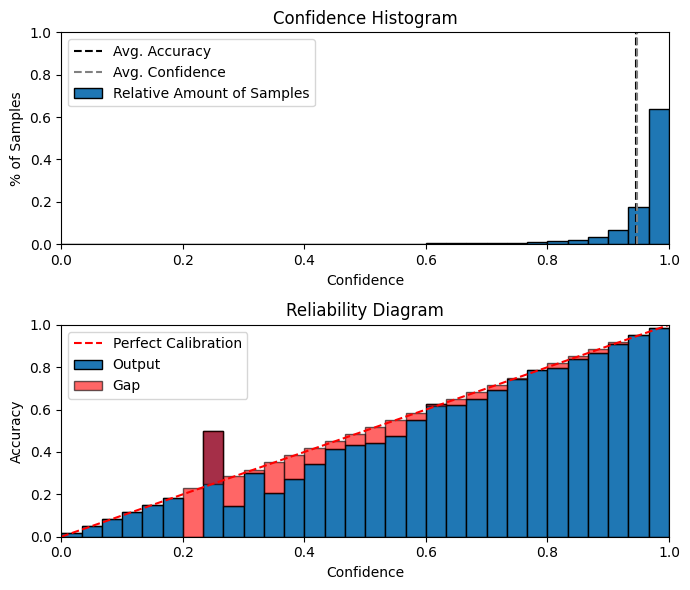

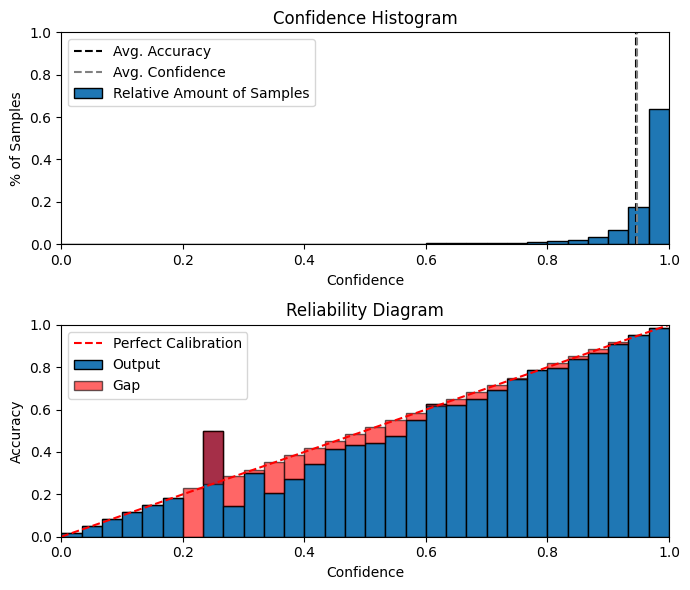

In [ ]:
#reliability diagram (calibration curve) for the uncalibrated model
n_bins = 30
diagram = ReliabilityDiagram(n_bins)
diagram.plot(y_score_uncalibrated, y_onehot_test)  # visualize miscalibration of uncalibrated

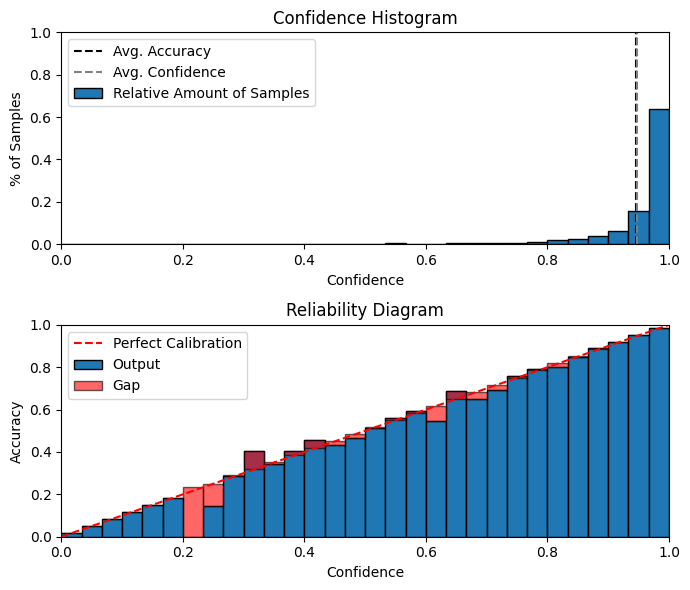

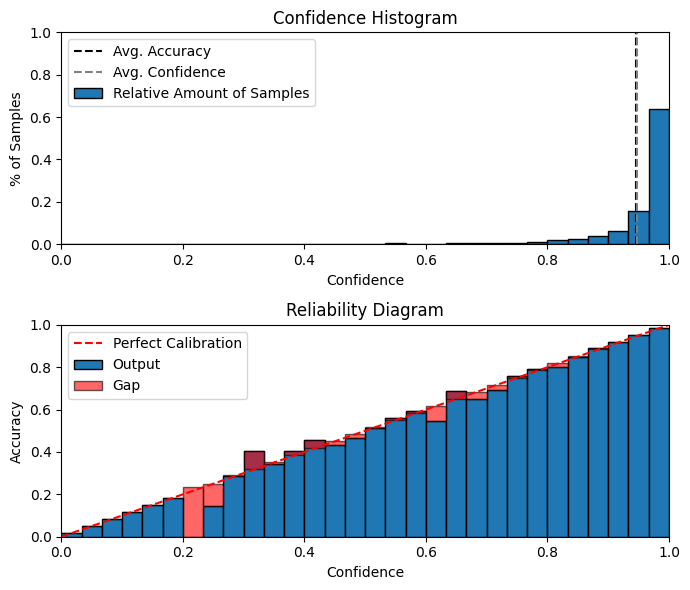

In [ ]:
#reliability diagram (calibration curve) for the calibrated model (isotonic)
n_bins = 30
diagram = ReliabilityDiagram(n_bins)
diagram.plot(y_score_calibrated_iso, y_onehot_test)  # visualize miscalibration of calibrated

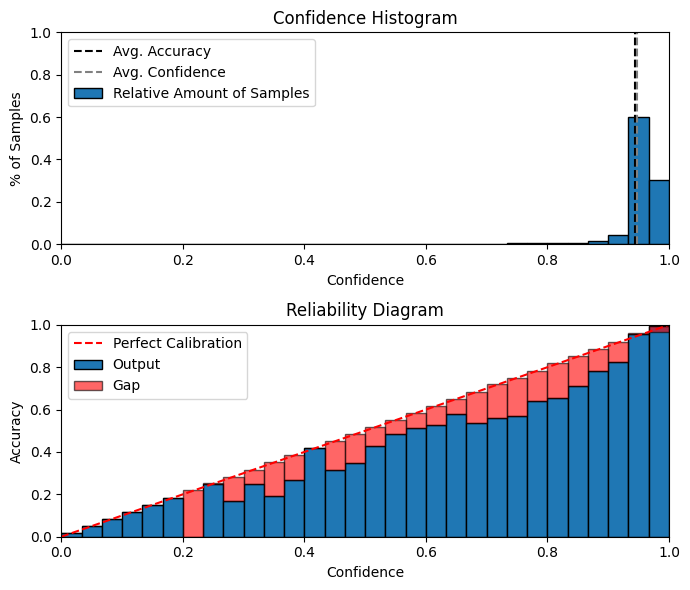

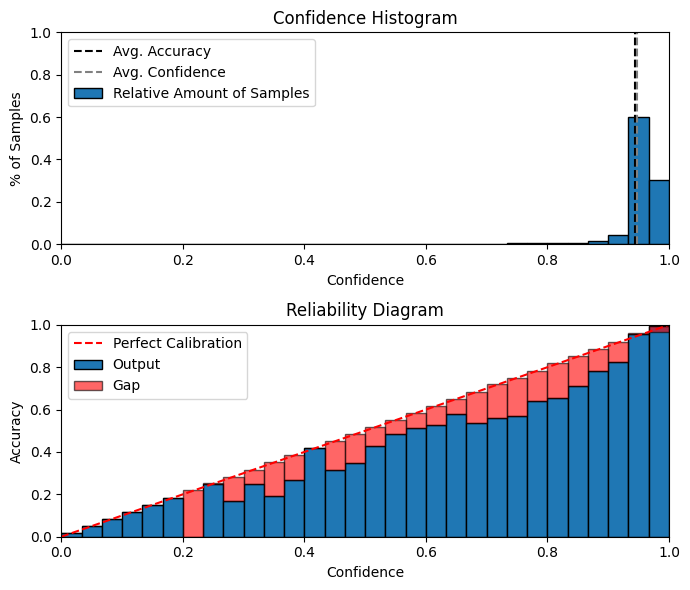

In [ ]:
#reliability diagram (calibration curve) for the calibrated model (sigmoid)
diagram.plot(y_score_calibrated_sigm, y_onehot_test)  # visualize miscalibration of calibrated

In [ ]:
#Expected calibration errors for the uncalibrated and calibrated models
n_bins = 10
from netcal.metrics import ECE
ece = ECE(n_bins)
uncalibrated_score = ece.measure(y_score_uncalibrated, y_onehot_test)
calibrated_score_iso = ece.measure(y_score_calibrated_iso, y_onehot_test)
calibrated_score_sigm = ece.measure(y_score_calibrated_sigm, y_onehot_test)

In [ ]:
#calibration metrics
print(uncalibrated_score)
print(calibrated_score_iso)
print(calibrated_score_sigm)

0.003069230280842342
0.001860363663700643
0.010007593564298554


In [ ]:
df_auc = pd.DataFrame(data=np.column_stack((y_onehot_test, y_score_calibrated_iso)))
df_auc.shape

(66398, 16)

In [ ]:
df_auc.head()

0    1    2    3    4    5    6    7         8         9         10  \
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.990570  0.002825  0.000104   
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.990922  0.003582  0.000104   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.983721  0.005602  0.000205   
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.920053  0.021916  0.001069   
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.845523  0.032537  0.002062   

         11        12        13        14        15  
0  0.000123  0.002851  0.000000  0.003526  0.000000  
1  0.000123  0.001800  0.000000  0.003469  0.000000  
2  0.000288  0.003347  0.000090  0.006747  0.000000  
3  0.001195  0.038783  0.000993  0.015792  0.000198  
4  0.005161  0.093445  0.003244  0.017555  0.000473

In [ ]:
# Codes for 95% CI determination
df_auc.columns = ['O1_true', 'O2_true', 'O3_true', 'O4_true', 'O5_true', 'O6_true', 'O7_true', 'O8_true', 'O1_pred_model', 'O2_pred_model', 'O3_pred_model', 'O4_pred_model', 'O5_pred_model', 'O6_pred_model', 'O7_pred_model', 'O8_pred_model']


In [ ]:
df_auc.head()

O1_true  O2_true  O3_true  O4_true  O5_true  O6_true  O7_true  O8_true  \
0      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   O1_pred_model  O2_pred_model  O3_pred_model  O4_pred_model  O5_pred_model  \
0       0.990570       0.002825       0.000104       0.000123       0.002851   
1       0.990922       0.003582       0.000104       0.000123       0.001800   
2       0.983721       0.005602       0.000205       0.000288       0.003347   
3       0.920053       0.021916       0.001069       0.001195       0.038783   
4       0.845523       0.032537       0.002062       0.005161       0.093445   

   O6_pred_model  O7_pred_model  O8_pred_model  
0       0.000000       0.003526       0.000000  
1       0.000000       0.003469       0.000000  
2       0.000090       0.006747       0.000000  
3       0.000993       0.015792       0.000198  
4       0.003244       0.017555       0.000473

In [ ]:
# Codes for 95% CI determination
df_auc.to_csv('/content/drive/MyDrive/Colab Notebooks/clf_xgboost_selected_calibrated_auc_060723.csv')

In [ ]:
#
from sklearn.metrics import roc_auc_score

macro_roc_auc_ovr_xg1200_50 = roc_auc_score(
    y_test,
    clf_xgboost_calibrated_iso.predict_proba(X_test),
    multi_class="ovr",
    average="macro",
)
print(macro_roc_auc_ovr_xg1200_50)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

0.8577227446083122


In [ ]:
weight_roc_auc_ovr_xg1200_50 = roc_auc_score(
    y_test,
    clf_xgboost_calibrated_iso.predict_proba(X_test),
    multi_class="ovr",
    average="weighted",
)
print(weight_roc_auc_ovr_xg1200_50)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

0.8394870947298705


In [ ]:
# codes for AUC-ROC cirve

from sklearn.preprocessing import LabelBinarizer

y_test_labeled = label_encoder.transform(y_test)
y_test_labeled.shape

(66398,)

In [ ]:
# AUC-ROC function
from sklearn import metrics
from sklearn.metrics import roc_curve
import seaborn as sns
import matplotlib.pyplot as plt



def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)
    sns.color_palette("colorblind")
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize = 20)
    ax.set_ylabel('True Positive Rate', fontsize = 20)
    ax.set_title('Receiver operating characteristic for the XGBoost classifier', fontsize = 20)
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    image_format = 'tiff' # e.g .png, .svg, etc.
    image_name = 'xgboost.tiff'
    plt.text(x=0.15, y =0.65, fontsize=20, s = 'Macro-averaged AUC = 0.86 (0.85-0.87) \n Weighted AUC = 0.84')
    fig.savefig(image_name, format=image_format, dpi=1200, pil_kwargs={"compression": "tiff_lzw"})
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

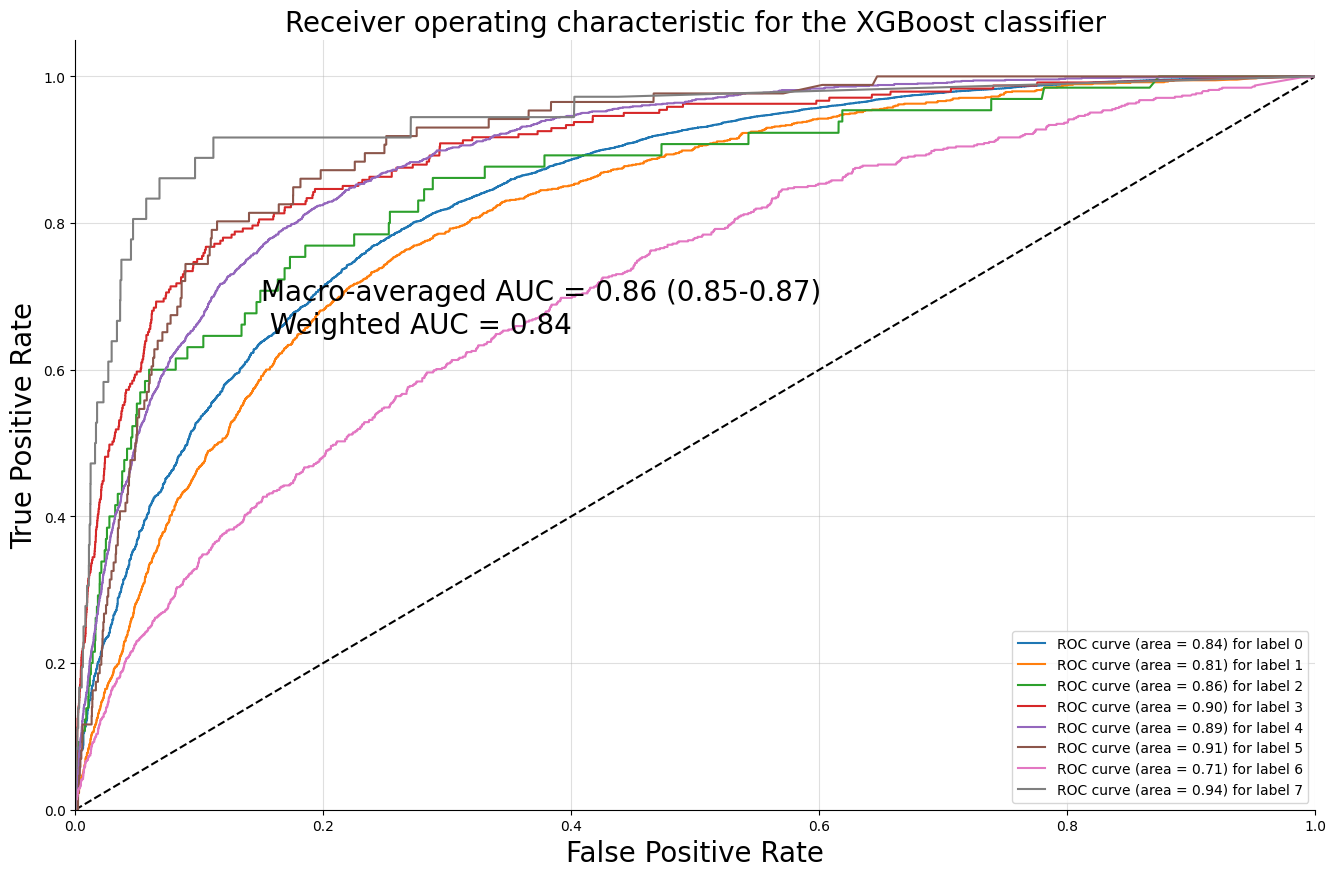

In [ ]:
plot_multiclass_roc(clf_xgboost_calibrated_iso, X_test, y_test_labeled, n_classes=8, figsize=(16, 10))


In [ ]:
pip install shap

In [ ]:
# import SHAP for feature importance
import shap

In [ ]:
explainer = shap.Explainer(clf_xgboost_calibrated_iso.predict, X_test, approximate=True)

In [ ]:
X_sampled = X_test.sample(250, random_state=5)

In [ ]:
shap_values = explainer(X_sampled)

Выходные данные были обрезаны до нескольких последних строк (5000).
Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
Found unknown categories in 

In [ ]:
# save shap   values
from joblib import dump, load
dump(shap_values,'/content/drive/MyDrive/Colab Notebooks/clf_xgboost_shap_values_calibrated_iso_refined_060723.pkl' )

In [ ]:
from joblib import dump, load
shap_values = load('clf_xgboost_shap_values_calibrated_iso_refined_060723.pkl')

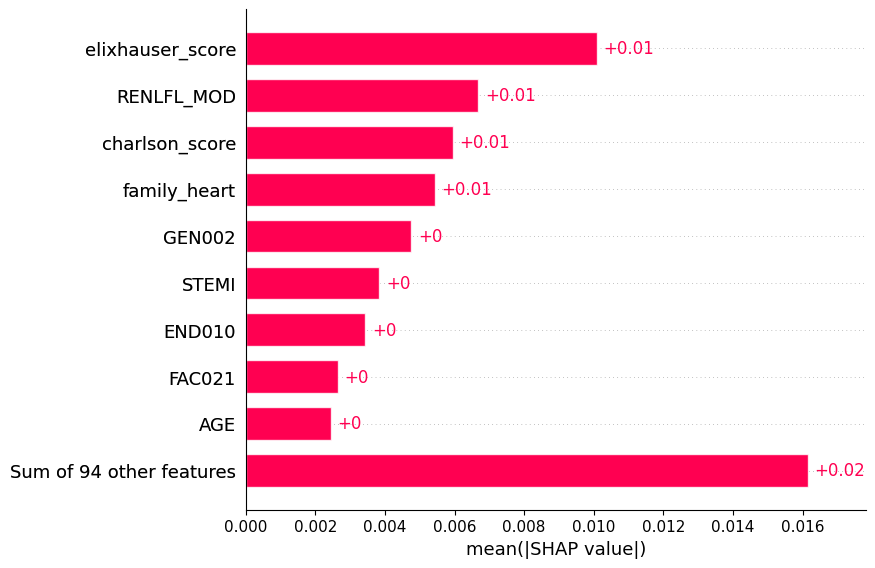

In [ ]:
shap.plots.bar(shap_values)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


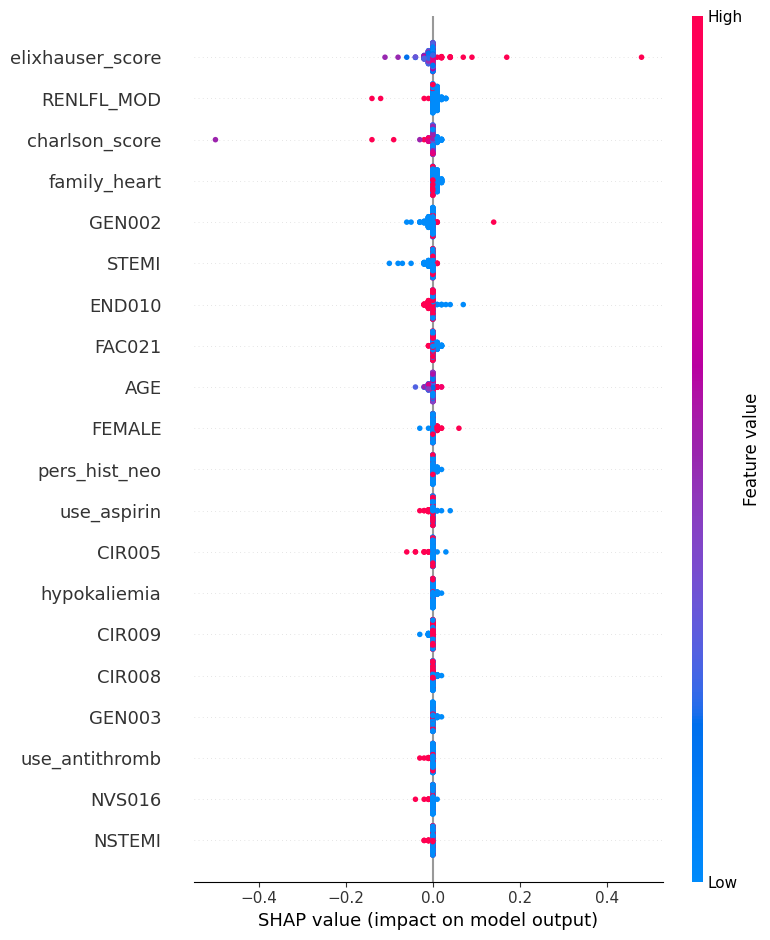

In [ ]:
shap.summary_plot(shap_values, X_sampled)

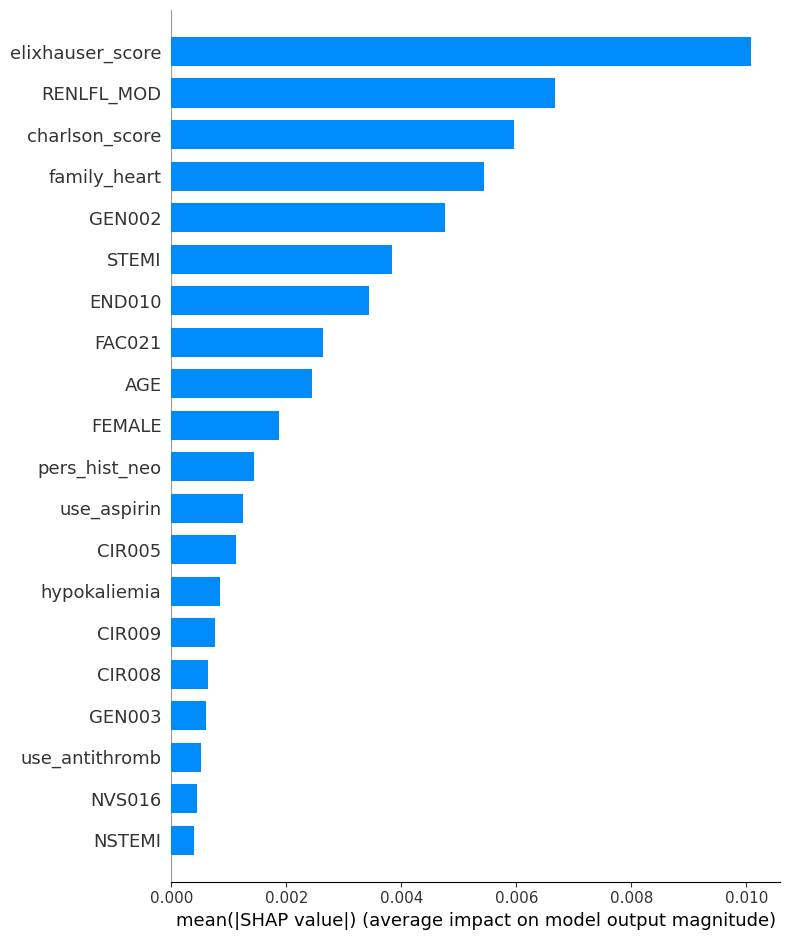

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


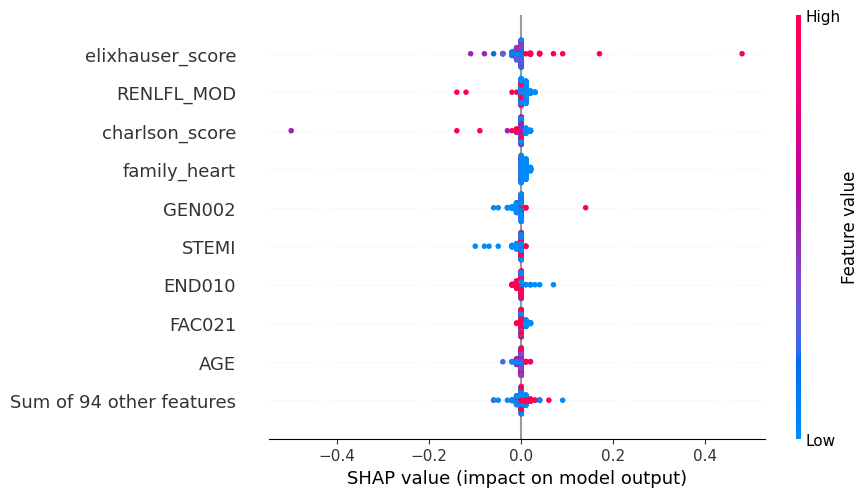

In [ ]:
shap.plots.beeswarm(shap_values)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


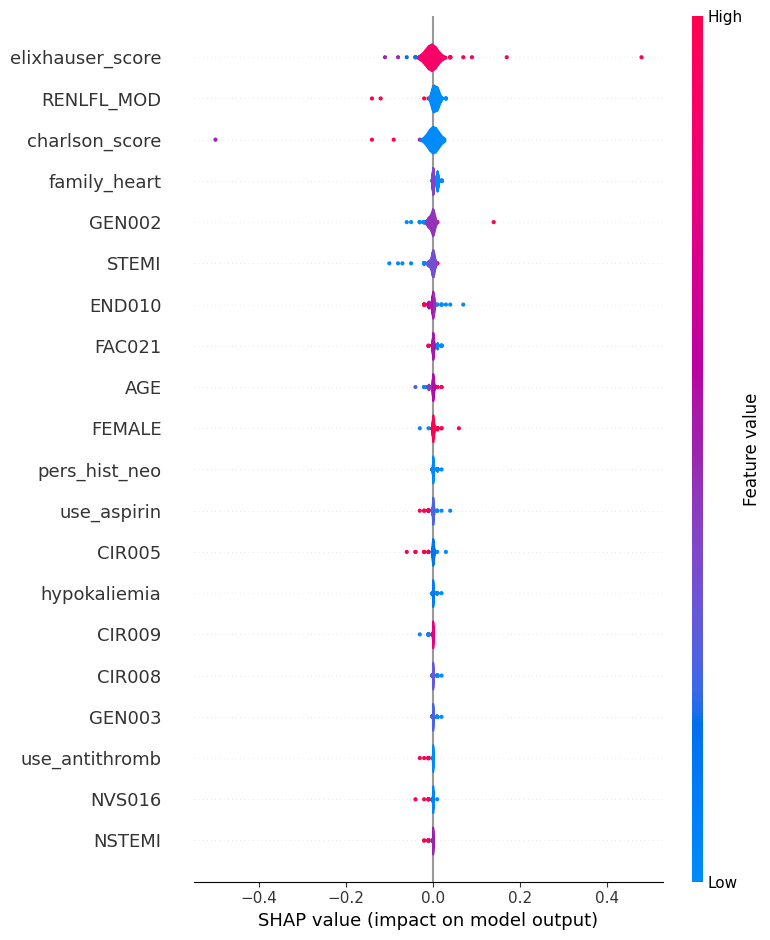

In [ ]:
shap.summary_plot(shap_values, plot_type='violin')


In [ ]:
#### the folowing codes describe the process of hyperparameter tuning via gridsearch

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop = 'if_binary')
categorical_features = X_train.columns.drop(['AGE', 'DISCWT', 'charlson_score', 'elixhauser_score'])
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_features),
    ('standard_scaler', StandardScaler(), ['AGE', 'charlson_score', 'elixhauser_score'])])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', xgb.XGBClassifier(random_state=1, early_stopping_rounds=50, objective = 'multi:softprob', learning_rate =0.1, n_estimators=200, gamma=0, subsample=0.8, colsample_bytree=0.8))])
#kwargs = {pipe.steps[-1][0] + '__sample_weight': X_train.DISCWT}
param_grid = {'classiffier__max_depth': range(3,10,2),
              'classiffier__min_child_weight': range(1,6,2)}
sgkf = StratifiedGroupKFold(n_splits=5)
clf_xgboost_depth_child = GridSearchCV(pipe, param_grid=param_grid, cv=sgkf, scoring='roc_auc_ovr')
clf_xgboost_depth_child.fit(X_train, y_train, groups = X_train.NIS_STRATUM, **{'classiffier__sample_weight': X_train.DISCWT})


In [ ]:
clf_xgboost_depth_child.best_params_

{'classiffier__max_depth': 7, 'classiffier__min_child_weight': 5}

In [ ]:
clf_xgboost_depth_child.cv_results_

In [ ]:
#Select gamma
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop = 'if_binary')
categorical_features = X_train.columns.drop(['AGE', 'DISCWT', 'charlson_score', 'elixhauser_score'])
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_features),
    ('standard_scaler', StandardScaler(), ['AGE', 'charlson_score', 'elixhauser_score'])])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', xgb.XGBClassifier(random_state=1, early_stopping_rounds=50, objective = 'multi:softprob', learning_rate =0.5, n_estimators=150, max_depth = 7, min_child_weight = 5, subsample=0.8, colsample_bytree=0.8))])
#kwargs = {pipe.steps[-1][0] + '__sample_weight': X_train.DISCWT}
param_grid = {'classiffier__gamma': [i/10.0 for i in range(0,5)]}
sgkf = StratifiedGroupKFold(n_splits=5)
clf_xgboost_gamma = GridSearchCV(pipe, param_grid=param_grid, cv=sgkf, scoring='roc_auc_ovr', verbose = 3)
clf_xgboost_gamma.fit(X_train, y_train, groups = X_train.NIS_STRATUM, **{'classiffier__sample_weight': X_train.DISCWT})

In [ ]:
clf_xgboost_gamma.best_params_

In [ ]:
clf_xgboost_gamma.cv_results_

In [ ]:
#Select subsample & colsample_bytree
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop = 'if_binary')
categorical_features = X_train.columns.drop(['AGE', 'DISCWT', 'charlson_score', 'elixhauser_score'])
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_features),
    ('standard_scaler', StandardScaler(), ['AGE', 'charlson_score', 'elixhauser_score'])])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classiffier', xgb.XGBClassifier(random_state=1, early_stopping_rounds=50, objective = 'multi:softprob', learning_rate =0.5, n_estimators=120, max_depth = 7, min_child_weight = 5, gamma = 0.4))])
#kwargs = {pipe.steps[-1][0] + '__sample_weight': X_train.DISCWT}
param_grid = {'classiffier__subsample': [i/10.0 for i in range(7,9)],
            'classiffier__colsample_bytree': [i/10.0 for i in range(7,9)]}
sgkf = StratifiedGroupKFold(n_splits=5)
clf_xgboost_subsample = GridSearchCV(pipe, param_grid=param_grid, cv=sgkf, scoring='roc_auc_ovr', verbose = 3)
clf_xgboost_subsample.fit(X_train, y_train, groups = X_train.NIS_STRATUM, **{'classiffier__sample_weight': X_train.DISCWT})

In [ ]:
clf_xgboost_subsample.best_params_

In [ ]:
clf_xgboost_subsample.cv_results_

In [ ]:
#Select regularization
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop = 'if_binary')
categorical_features = X_train.columns.drop(['AGE', 'DISCWT', 'charlson_score', 'elixhauser_score'])
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_features),
    ('standard_scaler', StandardScaler(), ['AGE', 'charlson_score', 'elixhauser_score'])])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', xgb.XGBClassifier(random_state=1, early_stopping_rounds=50, objective = 'multi:softprob', learning_rate =0.5, n_estimators=100, max_depth = 7, min_child_weight = 5, gamma = 0.4, subsample = 0.8, colsample_bytree = 0.7))])
#kwargs = {pipe.steps[-1][0] + '__sample_weight': X_train.DISCWT}
param_grid = {'classiffier__reg_alpha': [1e-5, 1e-2, 0.1, 1, 100]}
sgkf = StratifiedGroupKFold(n_splits=5)
clf_xgboost_alpha = GridSearchCV(pipe, param_grid=param_grid, cv=sgkf, scoring='roc_auc_ovr', verbose = 3)
clf_xgboost_alpha.fit(X_train, y_train, groups = X_train.NIS_STRATUM, **{'classiffier__sample_weight': X_train.DISCWT})

In [ ]:
clf_xgboost_alpha.best_params_

In [ ]:
clf_xgboost_alpha.cv_results_

In [ ]:
#Select regularization
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop = 'if_binary')
categorical_features = X_train.columns.drop(['AGE', 'DISCWT', 'charlson_score', 'elixhauser_score'])
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_features),
    ('standard_scaler', StandardScaler(), ['AGE', 'charlson_score', 'elixhauser_score'])])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', xgb.XGBClassifier(random_state=1, early_stopping_rounds=50, objective = 'multi:softprob', learning_rate =0.01, n_estimators=500, max_depth = 7, min_child_weight = 5, gamma = 0.4, subsample = 0.8, colsample_bytree = 0.7, n_jobs = -1))])
param_grid = {'classiffier__reg_alpha': [100]}
sgkf = StratifiedGroupKFold(n_splits=5)
clf_xgboost = GridSearchCV(pipe, param_grid=param_grid, cv=sgkf, scoring='roc_auc_ovr', verbose = 3)
clf_xgboost.fit(X_train, y_train, groups = X_train.NIS_STRATUM, **{'classiffier__sample_weight': X_train.DISCWT})

In [ ]:
from joblib import dump, load
dump(clf_xgboost,'/content/drive/MyDrive/Colab Notebooks/clf_xgboost.pkl' )

['/content/drive/MyDrive/Colab Notebooks/clf_xgboost.pkl']

In [ ]:
clf_xgboost.cv_results_

In [ ]:
#Select regularization
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop = 'if_binary')
categorical_features = X_train.columns.drop(['AGE', 'DISCWT', 'charlson_score', 'elixhauser_score'])
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_features),
    ('standard_scaler', StandardScaler(), ['AGE', 'charlson_score', 'elixhauser_score'])])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', xgb.XGBClassifier(random_state=1, early_stopping_rounds=50, objective = 'multi:softprob', learning_rate =0.01, n_estimators=700, max_depth = 7, min_child_weight = 5, gamma = 0.4, subsample = 0.8, colsample_bytree = 0.7, n_jobs = -1))])
param_grid = {'classiffier__reg_alpha': [100]}
sgkf = StratifiedGroupKFold(n_splits=5)
clf_xgboost = GridSearchCV(pipe, param_grid=param_grid, cv=sgkf, scoring='roc_auc_ovr', verbose = 3)
clf_xgboost.fit(X_train, y_train, groups = X_train.NIS_STRATUM , **{'classiffier__sample_weight': X_train.DISCWT})

In [ ]:
clf_xgboost.cv_results_

In [ ]:
clf_xgboost.cv_results_

In [ ]:
#Select regularization
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop = 'if_binary')
categorical_features = X_train.columns.drop(['AGE', 'DISCWT', 'charlson_score', 'elixhauser_score'])
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_features),
    ('standard_scaler', StandardScaler(), ['AGE', 'charlson_score', 'elixhauser_score'])])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', xgb.XGBClassifier(random_state=1, early_stopping_rounds=50, objective = 'multi:softprob', learning_rate =0.01, n_estimators=1000, max_depth = 7, min_child_weight = 5, gamma = 0.4, subsample = 0.8, colsample_bytree = 0.7, n_jobs = -1))])
param_grid = {'classiffier__reg_alpha': [100]}
sgkf = StratifiedGroupKFold(n_splits=5)
clf_xgboost = GridSearchCV(pipe, param_grid=param_grid, cv=sgkf, scoring='roc_auc_ovr', verbose = 3)
clf_xgboost.fit(X_train, y_train, groups = X_train.NIS_STRATUM , **{'classiffier__sample_weight': X_train.DISCWT})

In [ ]:
#new XGBOOST
from sklearn.compose import ColumnTransformer
import xgboost as xgb

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop = 'if_binary')
categorical_features = X_train.columns.drop(['AGE', 'DISCWT', 'charlson_score, 'elixhauser_score'])
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_features),
    ('standard_scaler', StandardScaler(), ['AGE', 'charlson_score', 'elixhauser_score'])])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', xgb.XGBClassifier(random_state=1, early_stopping_rounds=50, objective = 'multi:softprob', learning_rate =0.01, n_estimators=1000, max_depth = 7, min_child_weight = 5, gamma = 0.4, subsample = 0.8, colsample_bytree = 0.7, n_jobs = -1))])
param_grid = {'classiffier__reg_alpha': [100]}
sgkf = StratifiedGroupKFold(n_splits=5)
clf_xgboost = GridSearchCV(pipe, param_grid=param_grid, cv=sgkf, scoring='roc_auc_ovr', verbose = 3)
clf_xgboost.fit(X_train, y_train, groups = X_train.NIS_STRATUM , **{'classiffier__sample_weight': X_train.DISCWT})

In [ ]:
clf_xgboost.cv_results_

In [ ]:
#Eta = 0.05
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop = 'if_binary')
categorical_features = X_train.columns.drop(['AGE', 'DISCWT', 'charlson_score', 'elixhauser_score'])
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_features),
    ('standard_scaler', StandardScaler(), ['AGE', 'charlson_score', 'elixhauser_score'])])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', xgb.XGBClassifier(random_state=1, early_stopping_rounds=50, objective = 'multi:softprob', learning_rate =0.01, n_estimators=1000, max_depth = 7, min_child_weight = 5, gamma = 0.4, subsample = 0.8, colsample_bytree = 0.7, eta = 0.05, n_jobs = -1))])
param_grid = {'classiffier__reg_alpha': [100]}
sgkf = StratifiedGroupKFold(n_splits=5)
clf_xgboost = GridSearchCV(pipe, param_grid=param_grid, cv=sgkf, scoring='roc_auc_ovr', verbose = 3)
clf_xgboost.fit(X_train, y_train, groups = X_train.NIS_STRATUM , **{'classiffier__sample_weight': X_train.DISCWT})

In [ ]:
clf_xgboost.cv_results_

In [ ]:
#Eta = 0.05 n_est = 1200
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop = 'if_binary')
categorical_features = X_train.columns.drop(['AGE', 'DISCWT', 'charlson_score', 'elixhauser_score'])
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_features),
    ('standard_scaler', StandardScaler(), ['AGE', 'charlson_score', 'elixhauser_score'])])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', xgb.XGBClassifier(random_state=1, early_stopping_rounds=50, objective = 'multi:softprob', learning_rate =0.01, n_estimators=1200, max_depth = 7, min_child_weight = 5, gamma = 0.4, subsample = 0.8, colsample_bytree = 0.7, eta = 0.05, n_jobs = -1))])
param_grid = {'classiffier__reg_alpha': [100]}
sgkf = StratifiedGroupKFold(n_splits=5)
clf_xgboost = GridSearchCV(pipe, param_grid=param_grid, cv=sgkf, scoring='roc_auc_ovr', verbose = 3)
clf_xgboost.fit(X_train, y_train, groups = X_train.NIS_STRATUM , **{'classiffier__sample_weight': X_train.DISCWT})

In [ ]:
clf_xgboost.cv_results_

######################## Naive Bayes Classifier ################################################################################################


In [ ]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import (
    GroupShuffleSplit,
    GroupKFold,
    StratifiedGroupKFold,
)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Load the data
X_train = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/X_train_refined_060723.pkl')
y_train = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/y_train_refined_060723.pkl")
X_validation = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/X_validation_refined_060723.pkl')
y_validation = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/y_validation_refined_060723.pkl")
X_test = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/X_test_refined_060723.pkl')
y_test = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/y_test_refined_060723.pkl')

In [ ]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)
print(y_train.unique())
print(y_validation.unique())
print(y_test.unique())

(237376, 103)
(59345, 103)
(66398, 103)
['No' 'death_only' 'bleeding_only' 'three_outcomes' 'death_stroke'
 'stroke_only' 'bleeding_stroke' 'death_bleeding']
['No' 'bleeding_only' 'death_only' 'stroke_only' 'death_bleeding'
 'death_stroke' 'three_outcomes' 'bleeding_stroke']
['bleeding_only' 'No' 'death_only' 'bleeding_stroke' 'death_bleeding'
 'stroke_only' 'three_outcomes' 'death_stroke']


In [ ]:
# binarize the Outcome
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
print (y_train)

[0 0 0 ... 0 0 0]


In [ ]:
#train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB, BernoulliNB

from sklearn.model_selection import GridSearchCV
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop = 'if_binary')
categorical_features = X_train.columns.drop(['AGE', 'DISCWT', 'charlson_score', 'elixhauser_score'])
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_features),
    ('standard_scaler', StandardScaler(), ['AGE', 'charlson_score', 'elixhauser_score'])])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', BernoulliNB())])
param_grid = {'classiffier__binarize': [0]}
sgkf = StratifiedGroupKFold(n_splits=5)
clf_bernouli = GridSearchCV(pipe, param_grid=param_grid, cv=sgkf, scoring='roc_auc_ovr', verbose = 3)
clf_bernouli.fit(X_train, y_train, groups = X_train.NIS_STRATUM , **{'classiffier__sample_weight': X_train.DISCWT})


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 1/5] END ...........classiffier__binarize=0;, score=0.820 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 2/5] END ...........classiffier__binarize=0;, score=0.824 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 3/5] END ...........classiffier__binarize=0;, score=0.826 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 4/5] END ...........classiffier__binarize=0;, score=0.805 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 5/5] END ...........classiffier__binarize=0;, score=0.808 total time=   2.4s


GridSearchCV(cv=StratifiedGroupKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('one-hot-encoder',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore'),
                                                                         Index(['AMONTH', 'AUTOIMMUNE', 'BLD001', 'BLD003', 'BLD006', 'CANCER_LEUK',
       'CANCER_LYMPH', 'CANCER_METS', 'CANCER_SOLID', 'CAR00...
       'iron_anemia', 'lowplatelet', 'old_MI', 'pers_hist_neo',
       'pers_hist_stroke', 'prev_CABG', 'prev_PCI', 'prev_pacemaker',
       'smoking', 'use_antithromb', 'use_aspirin', 'NIS_STRATUM', 'END010'],
      dtype='object')),
                                                                        ('standard_scaler',
                                                                         StandardScaler(),
                                                                         ['AGE',
                                                                          'charlson_score',
                                                                          'elixhauser_score'])])),
                                       ('classiffier', BernoulliNB())]),
             param_grid={'classiffier__binarize': [0]}, scoring='roc_auc_ovr',
             verbose=3)

In [ ]:
from joblib import dump, load
dump(clf_bernouli,'/content/drive/MyDrive/Colab Notebooks/clf_bernouli_selected_uncalibrated_060723.pkl' )

['/content/drive/MyDrive/Colab Notebooks/clf_bernouli_selected_uncalibrated_060723.pkl']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib
from sklearn.model_selection import GridSearchCV
clf_bernouli = joblib.load('/content/drive/MyDrive/Colab Notebooks/clf_bernouli_selected_uncalibrated_060723.pkl')

In [ ]:
clf_bernouli.cv_results_

{'mean_fit_time': array([2.13075504]),
 'std_fit_time': array([0.30131889]),
 'mean_score_time': array([0.51960487]),
 'std_score_time': array([0.0428653]),
 'param_classiffier__binarize': masked_array(data=[0],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'classiffier__binarize': 0}],
 'split0_test_score': array([0.82036573]),
 'split1_test_score': array([0.82390946]),
 'split2_test_score': array([0.82559443]),
 'split3_test_score': array([0.80528928]),
 'split4_test_score': array([0.80787777]),
 'mean_test_score': array([0.81660733]),
 'std_test_score': array([0.00839664]),
 'rank_test_score': array([1], dtype=int32)}

In [ ]:
# to perform isotonic calibration on the validation cohort
from sklearn.calibration import CalibratedClassifierCV
best_bernouli = clf_bernouli.best_estimator_
clf_bernouli_calibrated_iso = CalibratedClassifierCV(best_bernouli, cv=5, method='isotonic')
clf_bernouli_calibrated_iso.fit(X_validation, y_validation)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


CalibratedClassifierCV(cv=5,
                       estimator=Pipeline(steps=[('preprocessor',
                                                  ColumnTransformer(transformers=[('one-hot-encoder',
                                                                                   OneHotEncoder(drop='if_binary',
                                                                                                 handle_unknown='ignore'),
                                                                                   Index(['AMONTH', 'AUTOIMMUNE', 'BLD001', 'BLD003', 'BLD006', 'CANCER_LEUK',
       'CANCER_LYMPH', 'CANCER_METS', 'CANCER_SOLID', 'CAR003', 'CIR003',
       'CIR005', 'CIR007', 'CIR008', 'CIR009', 'CIR0...
       'hemorrhage_cond', 'hypokaliemia', 'hyponatriemia', 'hypovolemia',
       'iron_anemia', 'lowplatelet', 'old_MI', 'pers_hist_neo',
       'pers_hist_stroke', 'prev_CABG', 'prev_PCI', 'prev_pacemaker',
       'smoking', 'use_antithromb', 'use_aspirin', 'NIS_STRATUM', 'END010'],
      dtype='object')),
                                                                                  ('standard_scaler',
                                                                                   StandardScaler(),
                                                                                   ['AGE',
                                                                                    'charlson_score',
                                                                                    'elixhauser_score'])])),
                                                 ('classiffier',
                                                  BernoulliNB(binarize=0))]),
                       method='isotonic')

In [ ]:
# to perform sigmoid calibration on the validation cohort
from sklearn.calibration import CalibratedClassifierCV
best_bernouli = clf_bernouli.best_estimator_
clf_bernouli_calibrated_sigm = CalibratedClassifierCV(best_bernouli, cv=5, method='sigmoid')
clf_bernouli_calibrated_sigm.fit(X_validation, y_validation)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


CalibratedClassifierCV(cv=5,
                       estimator=Pipeline(steps=[('preprocessor',
                                                  ColumnTransformer(transformers=[('one-hot-encoder',
                                                                                   OneHotEncoder(drop='if_binary',
                                                                                                 handle_unknown='ignore'),
                                                                                   Index(['AMONTH', 'AUTOIMMUNE', 'BLD001', 'BLD003', 'BLD006', 'CANCER_LEUK',
       'CANCER_LYMPH', 'CANCER_METS', 'CANCER_SOLID', 'CAR003', 'CIR003',
       'CIR005', 'CIR007', 'CIR008', 'CIR009', 'CIR0...
       'hemorrhage_cond', 'hypokaliemia', 'hyponatriemia', 'hypovolemia',
       'iron_anemia', 'lowplatelet', 'old_MI', 'pers_hist_neo',
       'pers_hist_stroke', 'prev_CABG', 'prev_PCI', 'prev_pacemaker',
       'smoking', 'use_antithromb', 'use_aspirin', 'NIS_STRATUM', 'END010'],
      dtype='object')),
                                                                                  ('standard_scaler',
                                                                                   StandardScaler(),
                                                                                   ['AGE',
                                                                                    'charlson_score',
                                                                                    'elixhauser_score'])])),
                                                 ('classiffier',
                                                  BernoulliNB(binarize=0))]))

In [ ]:
#performance on the test dataset of uncalibrated model
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf_bernouli.predict_proba(X_test), multi_class='ovr')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.8247942623003308

In [ ]:
#performance on the test dataset of calibrated model (isotonic)
roc_auc_score(y_test, clf_bernouli_calibrated_iso.predict_proba(X_test), multi_class='ovr')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

0.8106781625198167

In [ ]:
#performance on the test dataset of calibrated model (sigmoid)
roc_auc_score(y_test, clf_bernouli_calibrated_sigm.predict_proba(X_test), multi_class='ovr')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

0.7239821174864878

In [ ]:
#predicted probabilities for the uncalibrated model
y_score_uncalibrated = clf_bernouli.predict_proba(X_test)
y_score_uncalibrated

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[9.99004050e-01, 1.17136421e-04, 5.07281117e-07, ...,
        2.58443941e-07, 8.03967294e-04, 5.06401723e-09],
       [9.99659276e-01, 1.68296055e-05, 1.11105969e-06, ...,
        2.82364072e-07, 2.55378729e-04, 8.02649544e-08],
       [9.99634434e-01, 2.04815316e-05, 4.36809867e-07, ...,
        1.27956108e-07, 2.88868080e-04, 9.02635015e-09],
       ...,
       [9.99250190e-01, 3.04635678e-05, 7.69514373e-07, ...,
        1.30462544e-06, 3.67208754e-04, 1.58254207e-08],
       [9.10791483e-01, 3.97273404e-03, 1.83531614e-04, ...,
        1.28061906e-03, 6.62655941e-03, 3.02749913e-05],
       [9.99313110e-01, 1.84974763e-05, 1.03901843e-07, ...,
        1.12699317e-08, 6.63231845e-04, 4.57883354e-09]])

In [ ]:
#predicted probabilities for the calibrated model (isotonic)
y_score_calibrated_iso = clf_bernouli_calibrated_iso.predict_proba(X_test)
y_score_calibrated_iso

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

array([[9.82483080e-01, 6.49123054e-03, 1.60276334e-04, ...,
        5.68858430e-05, 7.11420917e-03, 0.00000000e+00],
       [9.89079442e-01, 3.03599930e-03, 1.60757316e-04, ...,
        5.70711950e-05, 3.97243706e-03, 0.00000000e+00],
       [9.91564498e-01, 2.63407457e-03, 0.00000000e+00, ...,
        5.69484684e-05, 2.64101049e-03, 0.00000000e+00],
       ...,
       [9.82257010e-01, 3.07295129e-03, 1.60041817e-04, ...,
        1.29736428e-04, 5.32739208e-03, 0.00000000e+00],
       [9.34680150e-01, 1.50452048e-02, 4.42059436e-04, ...,
        4.71224986e-04, 9.69977158e-03, 1.24513159e-04],
       [9.91318756e-01, 3.08310107e-03, 6.60464581e-05, ...,
        0.00000000e+00, 4.69349979e-03, 0.00000000e+00]])

In [ ]:
#predicted probabilities for the calibrated model (sigmoid)
y_score_calibrated_sigm = clf_bernouli_calibrated_sigm.predict_proba(X_test)
y_score_calibrated_sigm

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

array([[9.62382080e-01, 1.02769397e-02, 7.70255282e-04, ...,
        1.05388028e-03, 8.55051564e-03, 4.07176235e-04],
       [9.62394497e-01, 1.02753098e-02, 7.70247368e-04, ...,
        1.05386925e-03, 8.54093203e-03, 4.07171868e-04],
       [9.62397065e-01, 1.02751167e-02, 7.70246259e-04, ...,
        1.05386769e-03, 8.53906472e-03, 4.07171275e-04],
       ...,
       [9.62373459e-01, 1.02753662e-02, 7.70251823e-04, ...,
        1.05387620e-03, 8.54635135e-03, 4.07174270e-04],
       [9.58514435e-01, 1.03542316e-02, 7.70698091e-04, ...,
        1.05450044e-03, 8.65089285e-03, 4.07406195e-04],
       [9.62393289e-01, 1.02753014e-02, 7.70248664e-04, ...,
        1.05387105e-03, 8.54418968e-03, 4.07172618e-04]])

In [ ]:
# define y_train again to re-label y_test
y_train = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/y_train_refined_060723.pkl")
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape
np.unique(y_onehot_test)


array([0, 1])

In [ ]:
pip install netcal

In [ ]:
#load ReliabilityDiagram
from netcal.presentation import ReliabilityDiagram

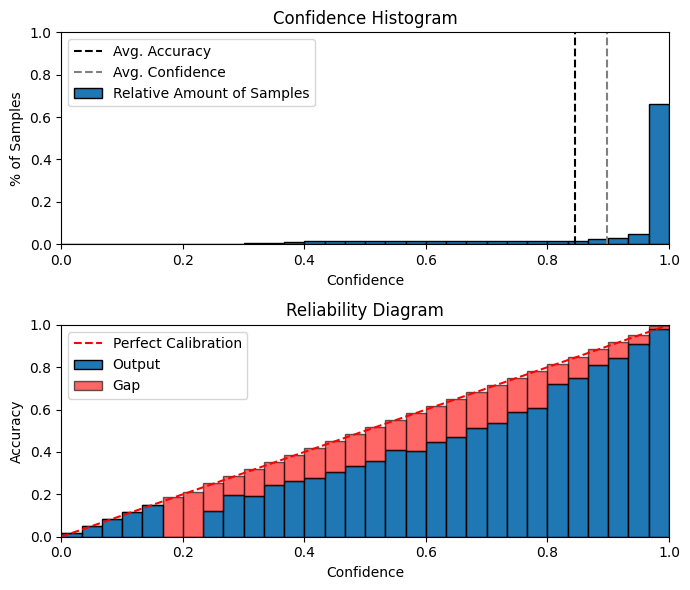

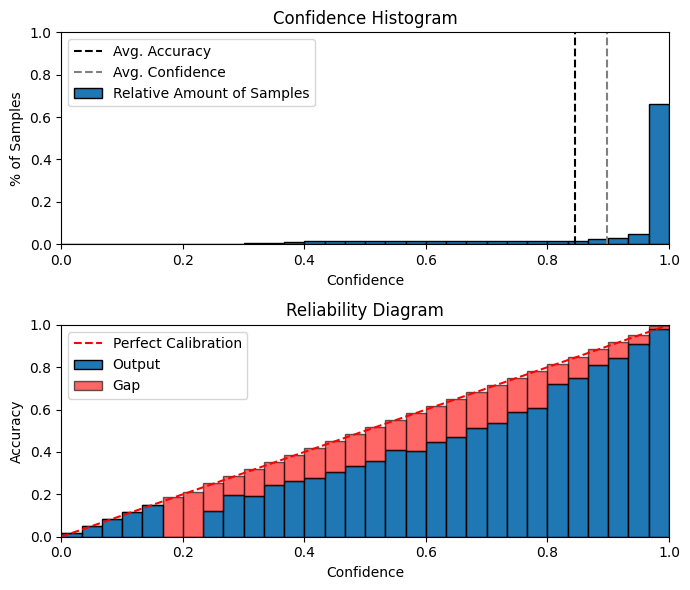

In [ ]:
#reliability diagram (calibration curve) for the uncalibrated model
n_bins = 30
diagram = ReliabilityDiagram(n_bins)
diagram.plot(y_score_uncalibrated, y_onehot_test)  # visualize miscalibration of uncalibrated

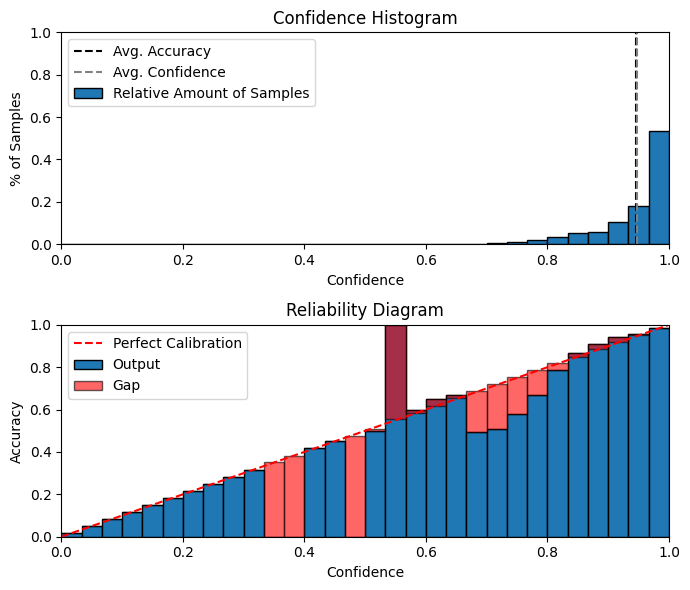

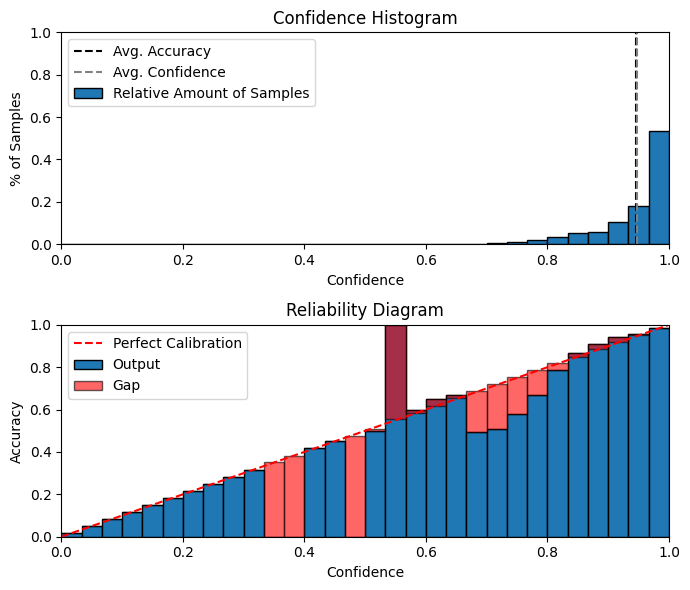

In [ ]:
#reliability diagram (calibration curve) for the calibrated model (isotonic)
diagram.plot(y_score_calibrated_iso, y_onehot_test)  # visualize miscalibration of calibrated

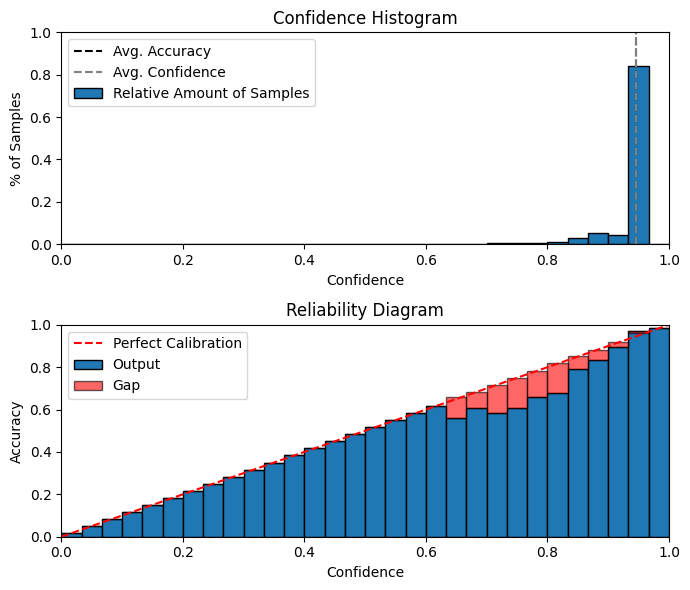

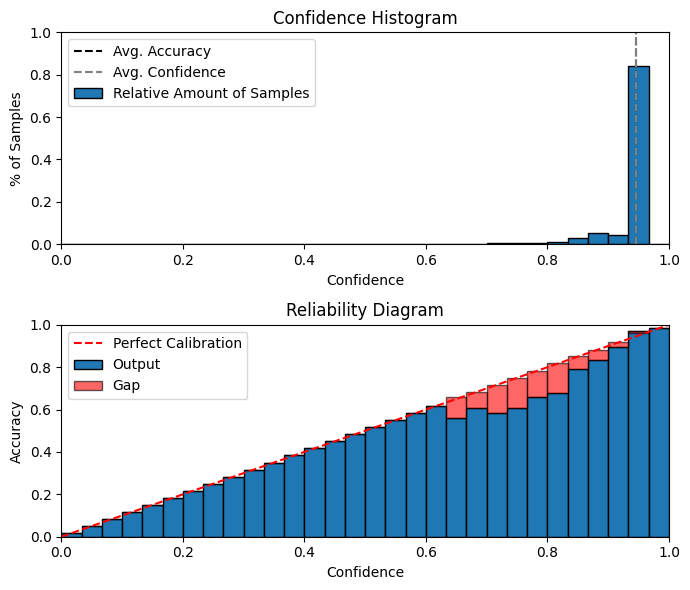

In [ ]:
#reliability diagram (calibration curve) for the calibrated model (sigmoid)
diagram.plot(y_score_calibrated_sigm, y_onehot_test)  # visualize miscalibration of calibrated

In [ ]:
#Expected calibration errors for the uncalibrated and calibrated models
n_bins = 10
from netcal.metrics import ECE
ece = ECE(n_bins)
uncalibrated_score = ece.measure(y_score_uncalibrated, y_onehot_test)
calibrated_score_iso = ece.measure(y_score_calibrated_iso, y_onehot_test)
calibrated_score_sigm = ece.measure(y_score_calibrated_sigm, y_onehot_test)

In [ ]:
# calibration metrics
print(uncalibrated_score)
print(calibrated_score_iso)
print(calibrated_score_sigm)

0.052897240796444214
0.008423167901600198
0.01632505401310507


In [ ]:
# Codes for 95% CI determination
df_auc = pd.DataFrame(data=np.column_stack((y_onehot_test, y_score_calibrated_iso)))

In [ ]:
df_auc.shape

(66398, 16)

In [ ]:
df_auc.head()

0    1    2    3    4    5    6    7         8         9         10  \
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.982483  0.006491  0.000160   
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.989079  0.003036  0.000161   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.991564  0.002634  0.000000   
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.914342  0.019882  0.001542   
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.946784  0.008640  0.000424   

         11        12        13        14        15  
0  0.000193  0.003502  0.000057  0.007114  0.000000  
1  0.000193  0.003501  0.000057  0.003972  0.000000  
2  0.000193  0.002911  0.000057  0.002641  0.000000  
3  0.005815  0.041022  0.000708  0.016071  0.000618  
4  0.002830  0.030557  0.001332  0.009375  0.000057

In [ ]:
# Codes for 95% CI determination
df_auc.columns = ['O1_true', 'O2_true', 'O3_true', 'O4_true', 'O5_true', 'O6_true', 'O7_true', 'O8_true', 'O1_pred_model', 'O2_pred_model', 'O3_pred_model', 'O4_pred_model', 'O5_pred_model', 'O6_pred_model', 'O7_pred_model', 'O8_pred_model']

In [ ]:
df_auc.head()

O1_true  O2_true  O3_true  O4_true  O5_true  O6_true  O7_true  O8_true  \
0      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   O1_pred_model  O2_pred_model  O3_pred_model  O4_pred_model  O5_pred_model  \
0       0.982483       0.006491       0.000160       0.000193       0.003502   
1       0.989079       0.003036       0.000161       0.000193       0.003501   
2       0.991564       0.002634       0.000000       0.000193       0.002911   
3       0.914342       0.019882       0.001542       0.005815       0.041022   
4       0.946784       0.008640       0.000424       0.002830       0.030557   

   O6_pred_model  O7_pred_model  O8_pred_model  
0       0.000057       0.007114       0.000000  
1       0.000057       0.003972       0.000000  
2       0.000057       0.002641       0.000000  
3       0.000708       0.016071       0.000618  
4       0.001332       0.009375       0.000057

In [ ]:
# Codes for 95% CI determination
df_auc.to_csv('/content/drive/MyDrive/Colab Notebooks/clf_bernouli_calibrated_iso_auc_060723.csv')

In [ ]:
from sklearn.metrics import roc_auc_score
macro_roc_auc_ovr_bernouli = roc_auc_score(
    y_test,
    clf_bernouli_calibrated_iso.predict_proba(X_test),
    multi_class="ovr",
    average="macro",
)
print(macro_roc_auc_ovr_bernouli)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

0.8106781625198167


In [ ]:
weight_roc_auc_ovr_bernouli = roc_auc_score(
    y_test,
    clf_bernouli_calibrated_iso.predict_proba(X_test),
    multi_class="ovr",
    average="weighted",
)
print(weight_roc_auc_ovr_bernouli)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

0.8059942028745157


In [ ]:
# binarize the Outcome
from sklearn.preprocessing import LabelBinarizer
y_test_labeled = label_encoder.transform(y_test)
y_test_labeled.shape

(66398,)

In [ ]:
# define AUC curve function
from sklearn import metrics
from sklearn.metrics import roc_curve
import seaborn as sns
import matplotlib.pyplot as plt



def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)
    sns.color_palette("colorblind")
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize = 20)
    ax.set_ylabel('True Positive Rate', fontsize = 20)
    ax.set_title('Receiver operating characteristic for the Naive Bayes classifier', fontsize = 20)
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    image_format = 'tiff' # e.g .png, .svg, etc.
    image_name = 'clf_NB.tiff'
    plt.text(x=0.15, y =0.65, fontsize=20, s = 'Macro-averaged AUC = 0.81 (0.80-0.82) \n Weighted AUC = 0.81')
    fig.savefig(image_name, format=image_format, dpi=1200, pil_kwargs={"compression": "tiff_lzw"})
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

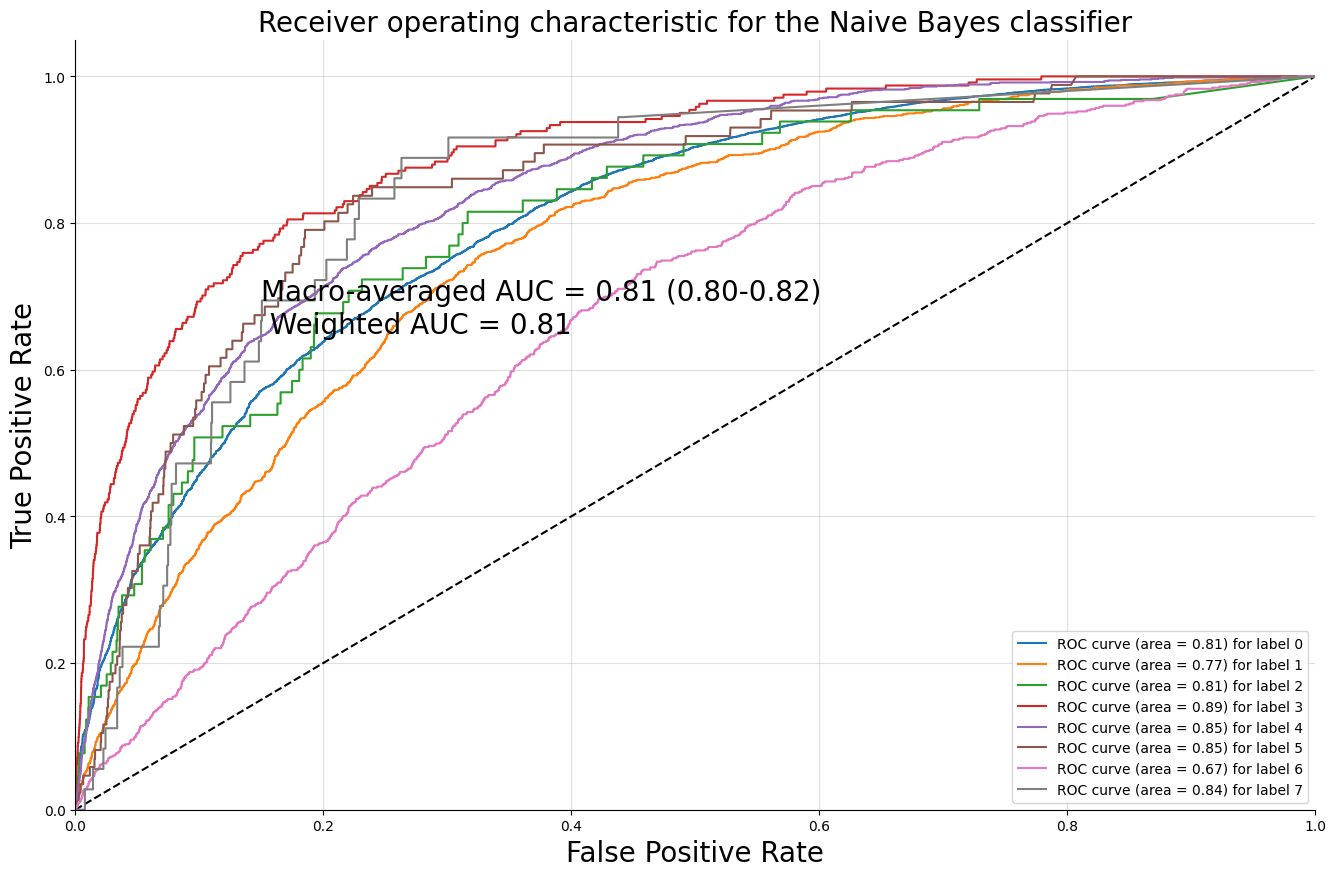

In [ ]:
plot_multiclass_roc(clf_bernouli_calibrated_iso, X_test, y_test_labeled, n_classes=8, figsize=(16, 10))




```
# Выбран кодовый формат
```

# Новый раздел

#########################################################
RANDOM FOREST ANALYSES



In [ ]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import (
    GroupShuffleSplit,
    GroupKFold,
    StratifiedGroupKFold,
)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Load the data
X_train = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/X_train_refined_060723.pkl')
y_train = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/y_train_refined_060723.pkl")
X_validation = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/X_validation_refined_060723.pkl')
y_validation = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/y_validation_refined_060723.pkl")
X_test = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/X_test_refined_060723.pkl')
y_test = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/y_test_refined_060723.pkl')

In [ ]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)
print(y_train.unique())
print(y_validation.unique())
print(y_test.unique())

(237376, 103)
(59345, 103)
(66398, 103)
['No' 'death_only' 'bleeding_only' 'three_outcomes' 'death_stroke'
 'stroke_only' 'bleeding_stroke' 'death_bleeding']
['No' 'bleeding_only' 'death_only' 'stroke_only' 'death_bleeding'
 'death_stroke' 'three_outcomes' 'bleeding_stroke']
['bleeding_only' 'No' 'death_only' 'bleeding_stroke' 'death_bleeding'
 'stroke_only' 'three_outcomes' 'death_stroke']


In [ ]:
# binarize the Outcome
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
print (y_train)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop = 'if_binary')
categorical_features = X_train.columns.drop(['AGE', 'DISCWT', 'charlson_score', 'elixhauser_score'])
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_features),
    ('standard_scaler', StandardScaler(), ['AGE', 'charlson_score', 'elixhauser_score'])])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', RandomForestClassifier(max_features = 'auto', bootstrap=True, random_state=1, class_weight = 'balanced', n_estimators=100, min_samples_leaf = 50))])
param_grid = {'classiffier__max_depth': [10, 30, 50, 70, 90, 110]}
sgkf = StratifiedGroupKFold(n_splits=5)
clf_rf_maxdepth_10_110 = GridSearchCV(pipe, param_grid=param_grid, cv=sgkf, scoring='roc_auc_ovr', verbose = 3)
clf_rf_maxdepth_10_110.fit(X_train, y_train, groups = X_train.NIS_STRATUM, **{'classiffier__sample_weight': X_train.DISCWT})

In [ ]:
clf_rf_maxdepth_10_110.best_params_

{'classiffier__max_depth': 50}

In [ ]:
clf_rf_maxdepth_10_110.cv_results_

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop = 'if_binary')
categorical_features = X_train.columns.drop('AGE', 'DISCWT', 'charlson_score', 'elixhauser_score')
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_features),
    ('standard_scaler', StandardScaler(), ['AGE', 'charlson_score', 'elixhauser_score'])])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', RandomForestClassifier(max_features = 'auto', bootstrap=True, random_state=1, class_weight = 'balanced', n_estimators=100, min_samples_leaf = 50))])
param_grid = {'classiffier__max_depth': [40, 45, 50, 55, 60]}
sgkf = StratifiedGroupKFold(n_splits=5)
clf_rf_maxdepth_40_60 = GridSearchCV(pipe, param_grid=param_grid, cv=sgkf, scoring='roc_auc_ovr', verbose = 3)
clf_rf_maxdepth_40_60.fit(X_train, y_train, groups = X_train.NIS_STRATUM, **{'classiffier__sample_weight': X_train.DISCWT})

In [ ]:
clf_rf_maxdepth_40_60.best_params_

{'classiffier__max_depth': 50}

In [ ]:
clf_rf_maxdepth_40_60.cv_results_

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop = 'if_binary')
categorical_features = X_train.columns.drop(['AGE', 'DISCWT', 'charlson_score', 'elixhauser_score'])
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_features),
    ('standard_scaler', StandardScaler(), ['AGE', 'charlson_score', 'elixhauser_score'])])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', RandomForestClassifier(max_features = 'auto', bootstrap=True, random_state=1, class_weight = 'balanced', n_estimators=100, max_depth = 50, min_samples_leaf = 50))])
param_grid = {'classiffier__min_samples_split': [50, 60, 70, 80, 90, 100]}
sgkf = StratifiedGroupKFold(n_splits=5)
clf_rf_minsamplesplit = GridSearchCV(pipe, param_grid=param_grid, cv=sgkf, scoring='roc_auc_ovr', verbose = 3)
clf_rf_minsamplesplit.fit(X_train, y_train, groups = X_train.NIS_STRATUM, **{'classiffier__sample_weight': X_train.DISCWT})

In [ ]:
clf_rf_minsamplesplit.best_params_

{'classiffier__min_samples_split': 50}

In [ ]:
clf_rf_minsamplesplit.cv_results_

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop = 'if_binary')
categorical_features = X_train.columns.drop(['AGE', 'DISCWT', 'charlson_score', 'elixhauser_score'])
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_features),
    ('standard_scaler', StandardScaler(), ['AGE', 'charlson_score', 'elixhauser_score'])])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', RandomForestClassifier(max_features = 'auto', bootstrap=True, random_state=1, class_weight = 'balanced', n_estimators=100, min_samples_leaf = 10, n_jobs = -1))])
param_grid = {'classiffier__min_samples_split': [10, 30, 50, 70]}
sgkf = StratifiedGroupKFold(n_splits=5)
clf_rf_minsample_10_70 = GridSearchCV(pipe, param_grid=param_grid, cv=sgkf, scoring='roc_auc_ovr', verbose = 3)
clf_rf_minsample_10_70.fit(X_train, y_train, groups = X_train.NIS_STRATUM, **{'classiffier__sample_weight': X_train.DISCWT})

In [ ]:
clf_rf_minsample_10_70.best_params_

{'classiffier__min_samples_split': 10}

In [ ]:
clf_rf_minsample_10_70.cv_results_

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop = 'if_binary')
categorical_features = X_train.columns.drop('AGE', 'DISCWT', 'charlson_score', 'elixhauser_score')
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_features),
    ('standard_scaler', StandardScaler(), ['AGE', 'charlson_score', 'elixhauser_score'])])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', RandomForestClassifier(max_features = 'auto', bootstrap=True, random_state=1, class_weight = 'balanced', n_estimators=100, min_samples_split = 10, n_jobs = -1))])
param_grid = {'classiffier__min_samples_leaf': [6, 8, 10, 12]}
sgkf = StratifiedGroupKFold(n_splits=5)
clf_minleaf = GridSearchCV(pipe, param_grid=param_grid, cv=sgkf, scoring='roc_auc_ovr', verbose = 3)
clf_minleaf.fit(X_train, y_train, groups = X_train.NIS_STRATUM, **{'classiffier__sample_weight': X_train.DISCWT})

In [ ]:
clf_minleaf.best_params_


{'classiffier__min_samples_leaf': 6}

In [ ]:
clf_minleaf.cv_results_


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop = 'if_binary')
categorical_features = X_train.columns.drop('AGE', 'DISCWT', 'charlson_score', 'elixhauser_score')
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_features),
    ('standard_scaler', StandardScaler(), ['AGE', 'charlson_score', 'elixhauser_score'])])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', RandomForestClassifier(max_features = 'auto', bootstrap=True, random_state=1, class_weight = 'balanced', min_samples_split = 10, min_samples_leaf = 6, max_depth = 50, n_jobs = -1))])
param_grid = {'classiffier__n_estimators': [100, 300, 500, 700]}
sgkf = StratifiedGroupKFold(n_splits=5)
clf_rf_nest = GridSearchCV(pipe, param_grid=param_grid, cv=sgkf, scoring='roc_auc_ovr', verbose = 3)
clf_rf_nest.fit(X_train, y_train, groups = X_train.NIS_STRATUM, **{'classiffier__sample_weight': X_train.DISCWT})

In [ ]:
clf_rf_nest.best_params_

In [ ]:
clf_rf_nest.cv_results_

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop = 'if_binary')
categorical_features = X_train.columns.drop('AGE', 'DISCWT', 'charlson_score', 'elixhauser_score')
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_features),
    ('standard_scaler', StandardScaler(), ['AGE', 'charlson_score', 'elixhauser_score'])])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', RandomForestClassifier(max_features = 'auto', bootstrap=True, random_state=1, n_estimators = 100, class_weight = 'balanced', min_samples_split = 10, min_samples_leaf = 6, max_depth = 50, n_jobs = -1))])
param_grid = {'classiffier__ccp_alpha': [1e-5, 1e-2, 0.1, 1, 100]}
sgkf = StratifiedGroupKFold(n_splits=5)
clf_ccp_alpha = GridSearchCV(pipe, param_grid=param_grid, cv=sgkf, scoring='roc_auc_ovr', verbose = 3)
clf_ccp_alpha.fit(X_train, y_train, groups = X_train.NIS_STRATUM, **{'classiffier__sample_weight': X_train.DISCWT})

In [ ]:
clf_ccp_alpha.best_params_

In [ ]:
clf_ccp_alpha.cv_results_

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", drop = 'if_binary')
categorical_features = X_train.columns.drop(['AGE', 'DISCWT', 'charlson_score', 'elixhauser_score'])
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_features),
    ('standard_scaler', StandardScaler(), ['AGE', 'charlson_score', 'elixhauser_score'])])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', RandomForestClassifier(max_features = 'sqrt', bootstrap=True, random_state=1, n_estimators = 500, class_weight = 'balanced', min_samples_split = 10, min_samples_leaf = 6, max_depth = 50, n_jobs = -1))])
param_grid = {'classiffier__ccp_alpha': [1e-5]}
sgkf = StratifiedGroupKFold(n_splits=5)
clf_rf = GridSearchCV(pipe, param_grid=param_grid, cv=sgkf, scoring='roc_auc_ovr', verbose = 3)
clf_rf.fit(X_train, y_train, groups = X_train.NIS_STRATUM, **{'classiffier__sample_weight': X_train.DISCWT})

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 1/5] END ......classiffier__ccp_alpha=1e-05;, score=0.836 total time=20.1min


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 2/5] END ......classiffier__ccp_alpha=1e-05;, score=0.835 total time=18.6min


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 3/5] END ......classiffier__ccp_alpha=1e-05;, score=0.834 total time=17.8min


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 4/5] END ......classiffier__ccp_alpha=1e-05;, score=0.827 total time=18.1min


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 5/5] END ......classiffier__ccp_alpha=1e-05;, score=0.830 total time=17.4min


GridSearchCV(cv=StratifiedGroupKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('one-hot-encoder',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore'),
                                                                         Index(['AMONTH', 'AUTOIMMUNE', 'BLD001', 'BLD003', 'BLD006', 'CANCER_LEUK',
       'CANCER_LYMPH', 'CANCER_METS', 'CANCER_SOLID', 'CAR00...
       'smoking', 'use_antithromb', 'use_aspirin', 'NIS_STRATUM', 'END010'],
      dtype='object')),
                                                                        ('standard_scaler',
                                                                         StandardScaler(),
                                                                         ['AGE',
                                                                          'charlson_score',
                                                                          'elixhauser_score'])])),
                                       ('classiffier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               max_depth=50,
                                                               min_samples_leaf=6,
                                                               min_samples_split=10,
                                                               n_estimators=500,
                                                               n_jobs=-1,
                                                               random_state=1))]),
             param_grid={'classiffier__ccp_alpha': [1e-05]},
             scoring='roc_auc_ovr', verbose=3)

In [ ]:
from joblib import dump, load
dump(clf_rf, '/content/drive/MyDrive/Colab Notebooks/clf_rf_refined_uncalibrated_060723.pkl' )

['/content/drive/MyDrive/Colab Notebooks/clf_rf_refined_uncalibrated_060723.pkl']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib
from sklearn.model_selection import GridSearchCV
clf_rf = joblib.load('/content/drive/MyDrive/Colab Notebooks/clf_rf_refined_uncalibrated_060723.pkl')


In [ ]:
clf_rf.cv_results_

{'mean_fit_time': array([1097.44178395]),
 'std_fit_time': array([56.98321951]),
 'mean_score_time': array([6.18410506]),
 'std_score_time': array([0.70576126]),
 'param_classiffier__ccp_alpha': masked_array(data=[1e-05],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'classiffier__ccp_alpha': 1e-05}],
 'split0_test_score': array([0.83637004]),
 'split1_test_score': array([0.83543864]),
 'split2_test_score': array([0.83375397]),
 'split3_test_score': array([0.82663769]),
 'split4_test_score': array([0.83008264]),
 'mean_test_score': array([0.8324566]),
 'std_test_score': array([0.00361625]),
 'rank_test_score': array([1], dtype=int32)}

In [ ]:
#isotonic calibration
from sklearn.calibration import CalibratedClassifierCV
best_rf = clf_rf.best_estimator_
clf_rf_calibrated_iso = CalibratedClassifierCV(best_rf, cv=5, method='isotonic')
clf_rf_calibrated_iso.fit(X_validation, y_validation)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


CalibratedClassifierCV(cv=5,
                       estimator=Pipeline(steps=[('preprocessor',
                                                  ColumnTransformer(transformers=[('one-hot-encoder',
                                                                                   OneHotEncoder(drop='if_binary',
                                                                                                 handle_unknown='ignore'),
                                                                                   Index(['AMONTH', 'AUTOIMMUNE', 'BLD001', 'BLD003', 'BLD006', 'CANCER_LEUK',
       'CANCER_LYMPH', 'CANCER_METS', 'CANCER_SOLID', 'CAR003', 'CIR003',
       'CIR005', 'CIR007', 'CIR008', 'CIR009', 'CIR0...
       'smoking', 'use_antithromb', 'use_aspirin', 'NIS_STRATUM', 'END010'],
      dtype='object')),
                                                                                  ('standard_scaler',
                                                                                   StandardScaler(),
                                                                                   ['AGE',
                                                                                    'charlson_score',
                                                                                    'elixhauser_score'])])),
                                                 ('classiffier',
                                                  RandomForestClassifier(ccp_alpha=1e-05,
                                                                         class_weight='balanced',
                                                                         max_depth=50,
                                                                         min_samples_leaf=6,
                                                                         min_samples_split=10,
                                                                         n_estimators=500,
                                                                         n_jobs=-1,
                                                                         random_state=1))]),
                       method='isotonic')

In [ ]:
from joblib import dump, load
dump(clf_rf_calibrated_iso, '/content/drive/MyDrive/Colab Notebooks/clf_rf_selected_calibrated_iso_060723.pkl' )

['/content/drive/MyDrive/Colab Notebooks/clf_rf_selected_calibrated_iso_060723.pkl']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib
from sklearn.model_selection import GridSearchCV
clf_rf_calibrated_iso = joblib.load('/content/drive/MyDrive/Colab Notebooks/clf_rf_selected_calibrated_iso_060723.pkl')


In [ ]:
#sigmoid calibration
from sklearn.calibration import CalibratedClassifierCV
best_rf = clf_rf.best_estimator_
clf_rf_calibrated_sigm = CalibratedClassifierCV(best_rf, cv=5, method='sigmoid')
clf_rf_calibrated_sigm.fit(X_validation, y_validation)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


CalibratedClassifierCV(cv=5,
                       estimator=Pipeline(steps=[('preprocessor',
                                                  ColumnTransformer(transformers=[('one-hot-encoder',
                                                                                   OneHotEncoder(drop='if_binary',
                                                                                                 handle_unknown='ignore'),
                                                                                   Index(['AMONTH', 'AUTOIMMUNE', 'BLD001', 'BLD003', 'BLD006', 'CANCER_LEUK',
       'CANCER_LYMPH', 'CANCER_METS', 'CANCER_SOLID', 'CAR003', 'CIR003',
       'CIR005', 'CIR007', 'CIR008', 'CIR009', 'CIR0...
       'pers_hist_stroke', 'prev_CABG', 'prev_PCI', 'prev_pacemaker',
       'smoking', 'use_antithromb', 'use_aspirin', 'NIS_STRATUM', 'END010'],
      dtype='object')),
                                                                                  ('standard_scaler',
                                                                                   StandardScaler(),
                                                                                   ['AGE',
                                                                                    'charlson_score',
                                                                                    'elixhauser_score'])])),
                                                 ('classiffier',
                                                  RandomForestClassifier(ccp_alpha=1e-05,
                                                                         class_weight='balanced',
                                                                         max_depth=50,
                                                                         min_samples_leaf=6,
                                                                         min_samples_split=10,
                                                                         n_estimators=500,
                                                                         n_jobs=-1,
                                                                         random_state=1))]))

In [ ]:
from joblib import dump, load
dump(clf_rf_calibrated_sigm, '/content/drive/MyDrive/Colab Notebooks/clf_rf_selected_calibrated_sigm_060723.pkl' )

['/content/drive/MyDrive/Colab Notebooks/clf_rf_selected_calibrated_sigm_060723.pkl']

In [ ]:
#performance on the test dataset of uncalibrated model
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf_rf.predict_proba(X_test), multi_class='ovr')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.8382200966661456

In [ ]:
#performance on the test dataset of calibrated model (isotonic)
roc_auc_score(y_test, clf_rf_calibrated_iso.predict_proba(X_test), multi_class='ovr')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

0.8250529930901094

In [ ]:
#performance on the test dataset of calibrated model (sigmoid)
roc_auc_score(y_test, clf_rf_calibrated_sigm.predict_proba(X_test), multi_class='ovr')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

0.8260894036020467

In [ ]:
#predicted probabilities for the uncalibrated model
y_score_uncalibrated = clf_rf.predict_proba(X_test)
y_score_uncalibrated

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0.75965968, 0.10323623, 0.        , ..., 0.        , 0.07143155,
        0.00199074],
       [0.82242178, 0.06362266, 0.        , ..., 0.00116379, 0.08427002,
        0.        ],
       [0.83736744, 0.02322581, 0.        , ..., 0.        , 0.06768045,
        0.        ],
       ...,
       [0.7373193 , 0.05101399, 0.00196707, ..., 0.00513642, 0.07278332,
        0.0019899 ],
       [0.30472813, 0.12284699, 0.00298412, ..., 0.03272481, 0.08123668,
        0.00332845],
       [0.83048082, 0.07358127, 0.00323436, ..., 0.        , 0.06442192,
        0.        ]])

In [ ]:
#predicted probabilities for the calibrated model (isotonic)
y_score_calibrated_iso = clf_rf_calibrated_iso.predict_proba(X_test)
y_score_calibrated_iso

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

array([[9.80533645e-01, 7.05312831e-03, 2.15060008e-04, ...,
        1.28493930e-04, 6.26272958e-03, 4.77646187e-04],
       [9.93774891e-01, 3.37557130e-03, 1.30328986e-04, ...,
        2.40018266e-05, 1.45364632e-03, 2.52535111e-05],
       [9.95606095e-01, 1.21296223e-03, 1.64238237e-04, ...,
        2.38590100e-05, 1.45495992e-03, 2.53782155e-05],
       ...,
       [9.80566977e-01, 3.13079230e-03, 6.15723860e-04, ...,
        3.50640536e-04, 5.42567387e-03, 2.51749838e-05],
       [8.67538937e-01, 1.20829399e-02, 2.79180587e-04, ...,
        2.39312009e-04, 1.09000641e-02, 6.40366717e-04],
       [9.90116453e-01, 1.89033202e-03, 3.45951903e-04, ...,
        2.39428467e-05, 6.70826660e-03, 2.54068153e-05]])

In [ ]:
#predicted probabilities for the calibrated model (sigmoid)
y_score_calibrated_sigm = clf_rf_calibrated_sigm.predict_proba(X_test)
y_score_calibrated_sigm

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

array([[9.76288107e-01, 7.33387417e-03, 5.26055697e-04, ...,
        6.41433113e-04, 7.19686201e-03, 3.96446545e-04],
       [9.84813655e-01, 5.03913305e-03, 4.66836862e-04, ...,
        5.78243024e-04, 4.78999806e-03, 2.72514408e-04],
       [9.85380138e-01, 4.14621380e-03, 4.85634662e-04, ...,
        5.62682566e-04, 4.51090118e-03, 2.76134102e-04],
       ...,
       [9.75140263e-01, 4.34893875e-03, 6.51481822e-04, ...,
        7.98083549e-04, 6.69514070e-03, 2.76935798e-04],
       [8.73993408e-01, 1.13758392e-02, 5.22102339e-04, ...,
        6.96859950e-04, 1.03277701e-02, 4.23348065e-04],
       [9.82908909e-01, 4.25350246e-03, 5.55226135e-04, ...,
        5.86310002e-04, 7.13391476e-03, 2.78208690e-04]])

In [ ]:
# define y and X to re-label y_test
y_train = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/y_train_refined_060723.pkl")

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape
np.unique(y_onehot_test)

array([0, 1])

In [ ]:
pip install netcal

In [ ]:
#load ReliabilityDiagram
from netcal.presentation import ReliabilityDiagram

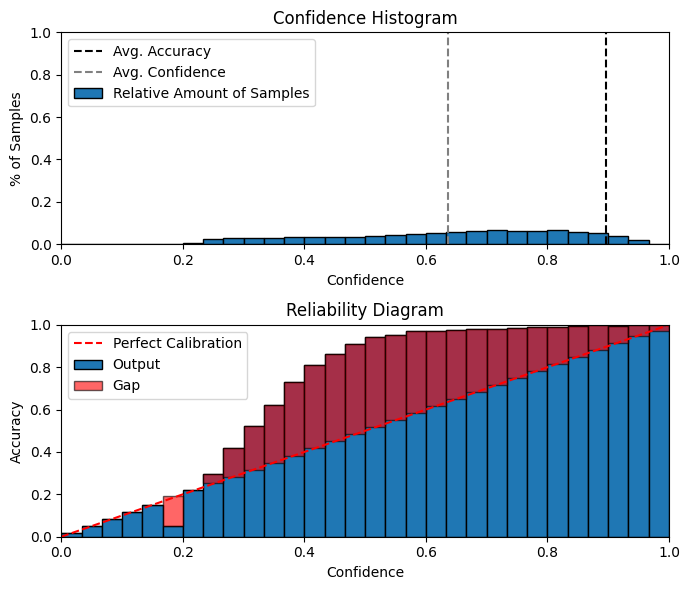

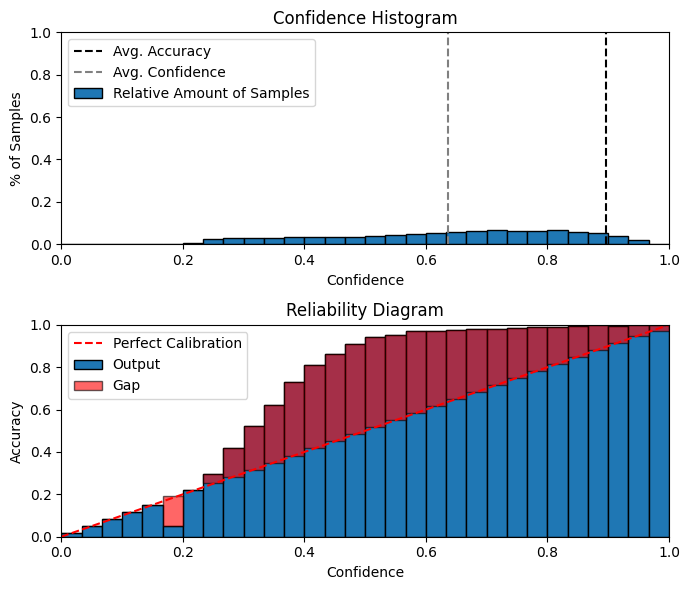

In [ ]:
#reliability diagram (calibration curve) for the uncalibrated model
n_bins = 30
diagram = ReliabilityDiagram(n_bins)
diagram.plot(y_score_uncalibrated, y_onehot_test)  # visualize miscalibration of uncalibrated

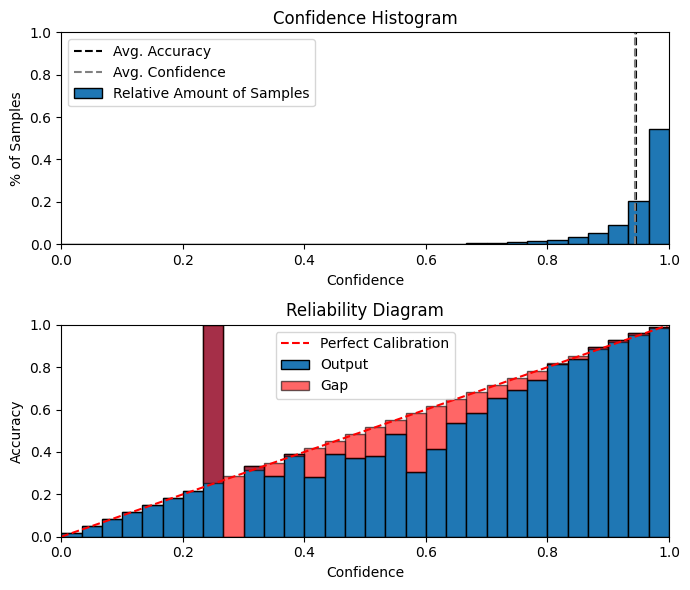

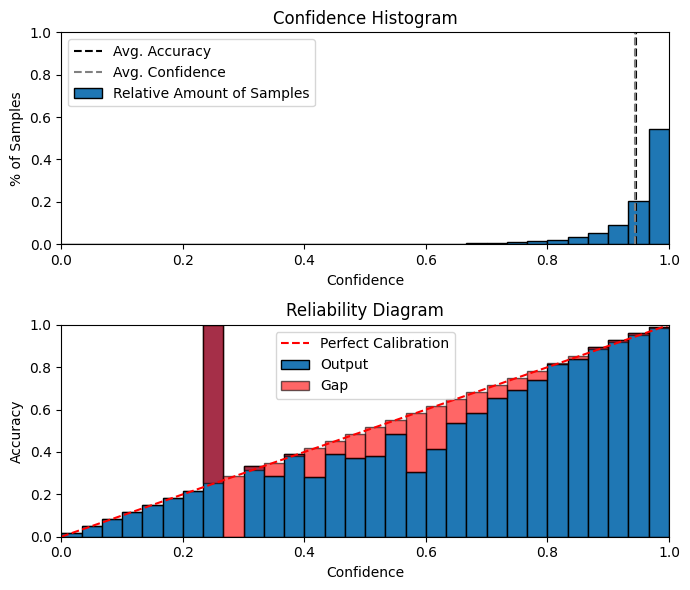

In [ ]:
#reliability diagram (calibration curve) for the calibrated model (isotonic)
diagram.plot(y_score_calibrated_iso, y_onehot_test)  # visualize miscalibration of calibrated

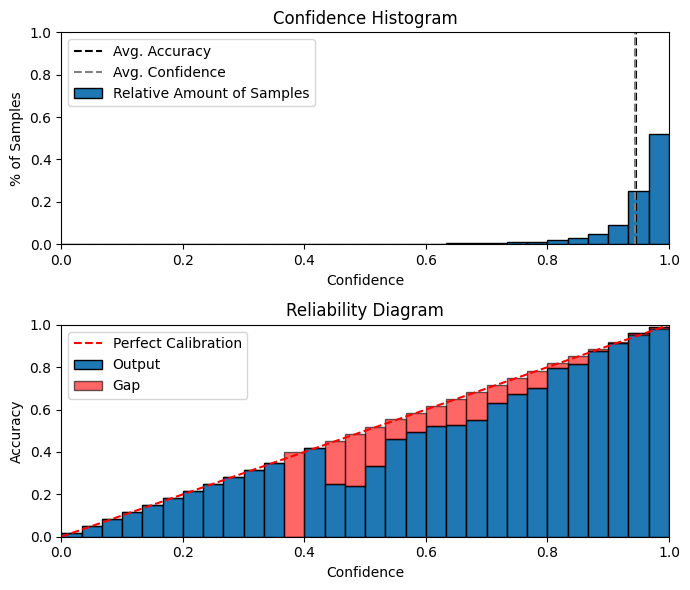

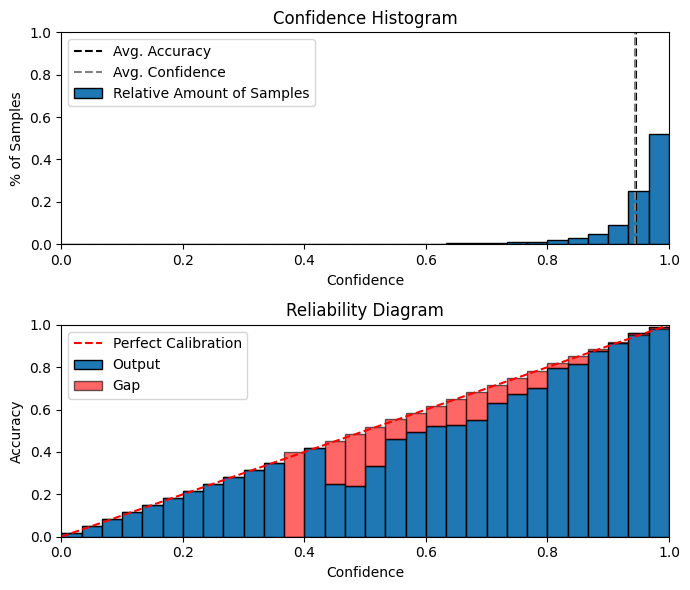

In [ ]:
#reliability diagram (calibration curve) for the calibrated model (sigmoid)
diagram.plot(y_score_calibrated_sigm, y_onehot_test)  # visualize miscalibration of calibrated

In [ ]:
#Expected calibration errors for the uncalibrated and calibrated models
n_bins = 10
from netcal.metrics import ECE
ece = ECE(n_bins)
uncalibrated_score = ece.measure(y_score_uncalibrated, y_onehot_test)
calibrated_score_iso = ece.measure(y_score_calibrated_iso, y_onehot_test)
calibrated_score_sigm = ece.measure(y_score_calibrated_sigm, y_onehot_test)

In [ ]:
# calibration metrics
print(uncalibrated_score)
print(calibrated_score_iso)
print(calibrated_score_sigm)

0.26150971819939073
0.008874305198858167
0.01240276311247231


In [ ]:
# Codes for 95% CI determination
df_auc = pd.DataFrame(data=np.column_stack((y_onehot_test, y_score_calibrated_iso)))

In [ ]:
df_auc.shape

(66398, 16)

In [ ]:
df_auc.head()

0    1    2    3    4    5    6    7         8         9         10  \
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.980534  0.007053  0.000215   
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.993775  0.003376  0.000130   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.995606  0.001213  0.000164   
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.914341  0.028977  0.002699   
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.852422  0.016796  0.001823   

         11        12        13        14        15  
0  0.000471  0.004858  0.000128  0.006263  0.000478  
1  0.000087  0.001129  0.000024  0.001454  0.000025  
2  0.000114  0.001398  0.000024  0.001455  0.000025  
3  0.005574  0.033417  0.000821  0.013735  0.000436  
4  0.005685  0.107927  0.002458  0.012060  0.000828

In [ ]:
# Codes for 95% CI determination
df_auc.columns = ['O1_true', 'O2_true', 'O3_true', 'O4_true', 'O5_true', 'O6_true', 'O7_true', 'O8_true', 'O1_pred_model', 'O2_pred_model', 'O3_pred_model', 'O4_pred_model', 'O5_pred_model', 'O6_pred_model', 'O7_pred_model', 'O8_pred_model']

In [ ]:
df_auc.head()

O1_true  O2_true  O3_true  O4_true  O5_true  O6_true  O7_true  O8_true  \
0      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   O1_pred_model  O2_pred_model  O3_pred_model  O4_pred_model  O5_pred_model  \
0       0.980534       0.007053       0.000215       0.000471       0.004858   
1       0.993775       0.003376       0.000130       0.000087       0.001129   
2       0.995606       0.001213       0.000164       0.000114       0.001398   
3       0.914341       0.028977       0.002699       0.005574       0.033417   
4       0.852422       0.016796       0.001823       0.005685       0.107927   

   O6_pred_model  O7_pred_model  O8_pred_model  
0       0.000128       0.006263       0.000478  
1       0.000024       0.001454       0.000025  
2       0.000024       0.001455       0.000025  
3       0.000821       0.013735       0.000436  
4       0.002458       0.012060       0.000828

In [ ]:
# Codes for 95% CI determination
df_auc.to_csv('/content/drive/MyDrive/Colab Notebooks/clf_rf_selected_calibrated_auc_060723.csv')

In [ ]:
from sklearn.metrics import roc_auc_score
macro_roc_auc_ovr_rf = roc_auc_score(
    y_test,
    clf_rf_calibrated_iso.predict_proba(X_test),
    multi_class="ovr",
    average="macro",
)
print(macro_roc_auc_ovr_rf)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

0.8250529930901094


In [ ]:
weight_roc_auc_ovr_rf = roc_auc_score(
    y_test,
    clf_rf_calibrated_iso.predict_proba(X_test),
    multi_class="ovr",
    average="weighted",
)
print(weight_roc_auc_ovr_rf)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

0.8314656861314278


In [ ]:
from sklearn.preprocessing import LabelBinarizer

y_test_labeled = label_encoder.transform(y_test)
y_test_labeled.shape

(66398,)

In [ ]:
# to define AUC curve function
from sklearn import metrics
from sklearn.metrics import roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)
    sns.color_palette("colorblind")
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize = 20)
    ax.set_ylabel('True Positive Rate', fontsize = 20)
    ax.set_title('Receiver operating characteristic for the Random Forest model', fontsize = 20)
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    image_format = 'tiff' # e.g .png, .svg, etc.
    image_name = 'rf.tiff'
    plt.text(x=0.15, y =0.65, fontsize=20, s = 'Macro-averaged AUC = 0.83 (0.81-0.84) \n Weighted AUC = 0.83')
    fig.savefig(image_name, format=image_format, dpi=1200, pil_kwargs={"compression": "tiff_lzw"})
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [97] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown c

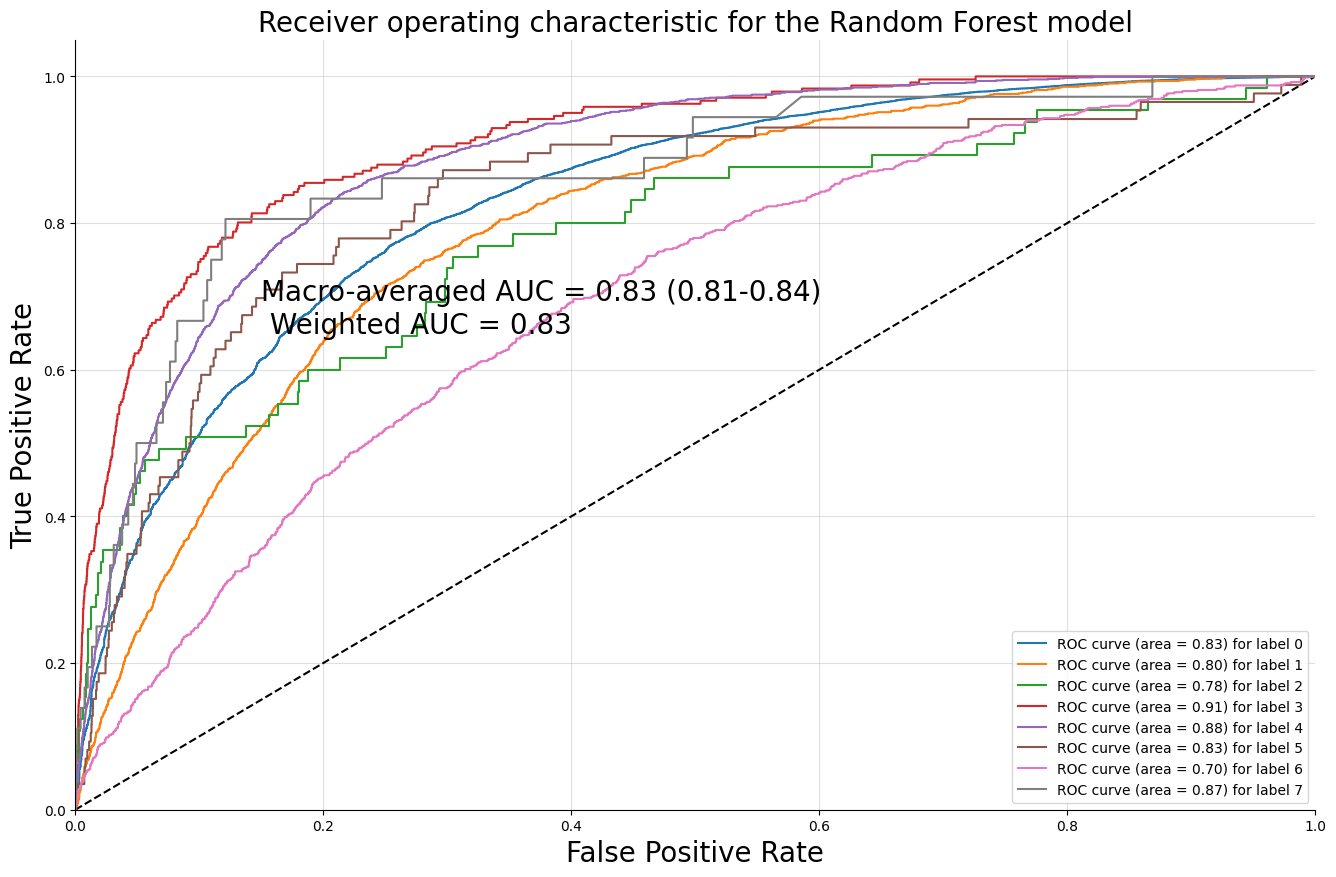

In [ ]:
plot_multiclass_roc(clf_rf_calibrated_iso, X_test, y_test_labeled, n_classes=8, figsize=(16, 10))
